In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content
#!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_5min.csv')
#df = pd.read_csv('CHF_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(153572, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(153571, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645,0.96645,17,2,1,0.00000,0.96645,0.00000,0.966450
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645,0.96831,17,2,1,-0.00019,0.96621,0.00048,0.966283
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831,0.96775,17,2,1,-0.00233,0.96714,0.00234,0.967143
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831,0.96595,17,2,1,0.00045,0.96801,0.00060,0.967993
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827,0.96512,17,2,1,0.00180,0.96679,0.00296,0.966820


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96645,0.96645,0.96645,0.96645,17,2,1,0.00000,0.96645,0.00000,0.966450,-25.086422
2020-01-01 17:05:00,0.96626,0.96645,0.96597,0.96645,0.96831,17,2,1,-0.00019,0.96621,0.00048,0.966283,-25.086155
2020-01-01 17:10:00,0.96598,0.96831,0.96597,0.96831,0.96775,17,2,1,-0.00233,0.96714,0.00234,0.967143,-25.086149
2020-01-01 17:15:00,0.96820,0.96775,0.96771,0.96831,0.96595,17,2,1,0.00045,0.96801,0.00060,0.967993,-25.085993
2020-01-01 17:20:00,0.96775,0.96595,0.96531,0.96827,0.96512,17,2,1,0.00180,0.96679,0.00296,0.966820,-25.086153


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96645  0.96645         0.96645    17    2   
2020-01-01 17:05:00  0.96626  0.96597  0.96645         0.96831    17    2   
2020-01-01 17:10:00  0.96598  0.96597  0.96831         0.96775    17    2   
2020-01-01 17:15:00  0.96820  0.96771  0.96831         0.96595    17    2   
2020-01-01 17:20:00  0.96775  0.96531  0.96827         0.96512    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00000    0.96645  0.00000    0.966450 -25.086422  
2020-01-01 17:05:00     1  -0.00019    0.96621  0.00048    0.966283 -25.086155  
2020-01-01 17:10:00     1  -0.00233    0.96714  0.00234    0.967143 -25.086149  
2020-01-01 17:15:00     1   0.00045    0.96801  0.00060

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

122856
122856
22000
22000
8715
8715


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(122856, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(122831, 24, 12)
(21975, 24, 12)
(8690, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(122831, 1)
(21975, 1)
(8690, 1)


array([[0.80684996],
       [0.80860186],
       [0.80860186],
       ...,
       [0.3369832 ],
       [0.33794641],
       [0.33768415]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.80684996, 0.80860186, 0.80860186, ..., 0.3369832 , 0.33794641,
       0.33768415], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

#checkpoint = ModelCheckpoint( "/content/drive/MyDrive/modelweights/CHF_USD_5min_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')
checkpoint = ModelCheckpoint( "CHF_USD_5min_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')
# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
319/320 [============================>.] - ETA: 0s - loss: 678.1241 - mae: 6.4699 - mse: 678.1241 - root_mean_squared_error: 26.0408 - mape: 8271.4561
Epoch 1: val_mse improved from inf to 0.05105, saving model to CHF_USD_5min_BiLSTM.hdf5
320/320 [==============================] - 25s 26ms/step - loss: 678.0358 - mae: 6.4691 - mse: 678.0358 - root_mean_squared_error: 26.0391 - mape: 8270.3857 - val_loss: 0.0511 - val_mae: 0.1884 - val_mse: 0.0511 - val_root_mean_squared_error: 0.2259 - val_mape: 24160.8047
Epoch 2/60
318/320 [============================>.] - ETA: 0s - loss: 0.0683 - mae: 0.2278 - mse: 0.0683 - root_mean_squared_error: 0.2614 - mape: 4164.3413
Epoch 2: val_mse improved from 0.05105 to 0.05079, saving model to CHF_USD_5min_BiLSTM.hdf5
320/320 [==============================] - 6s 19ms/step - loss: 0.0683 - mae: 0.2278 - mse: 0.0683 - root_mean_squared_error: 0.2614 - mape: 4151.1211 - val_loss: 0.0508 - val_mae: 0.1874 - val_mse: 0.0508 - val_root_mean_square

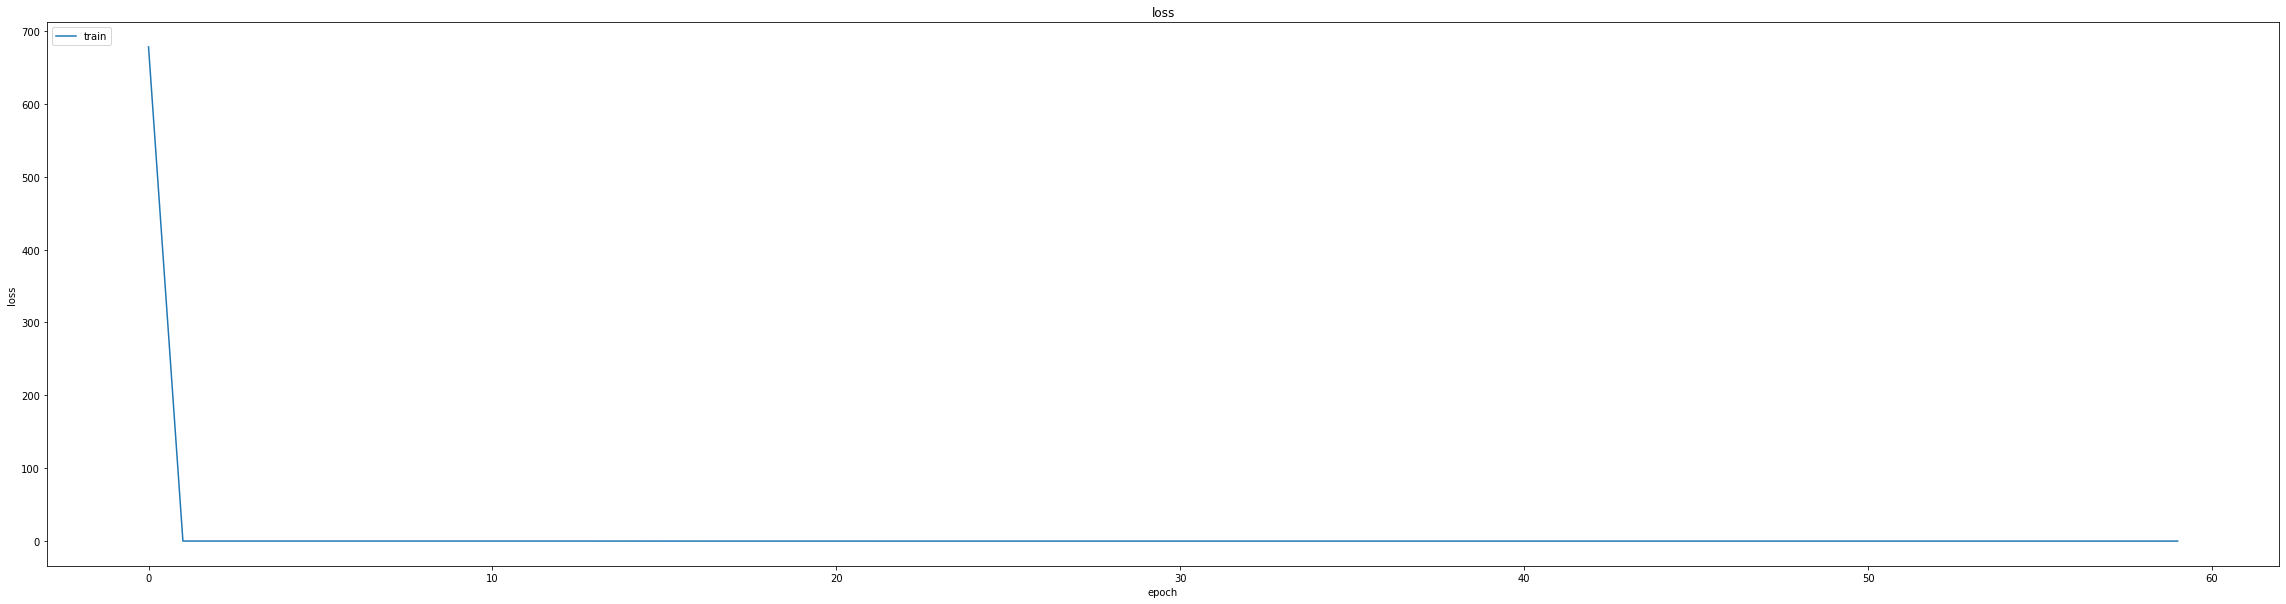

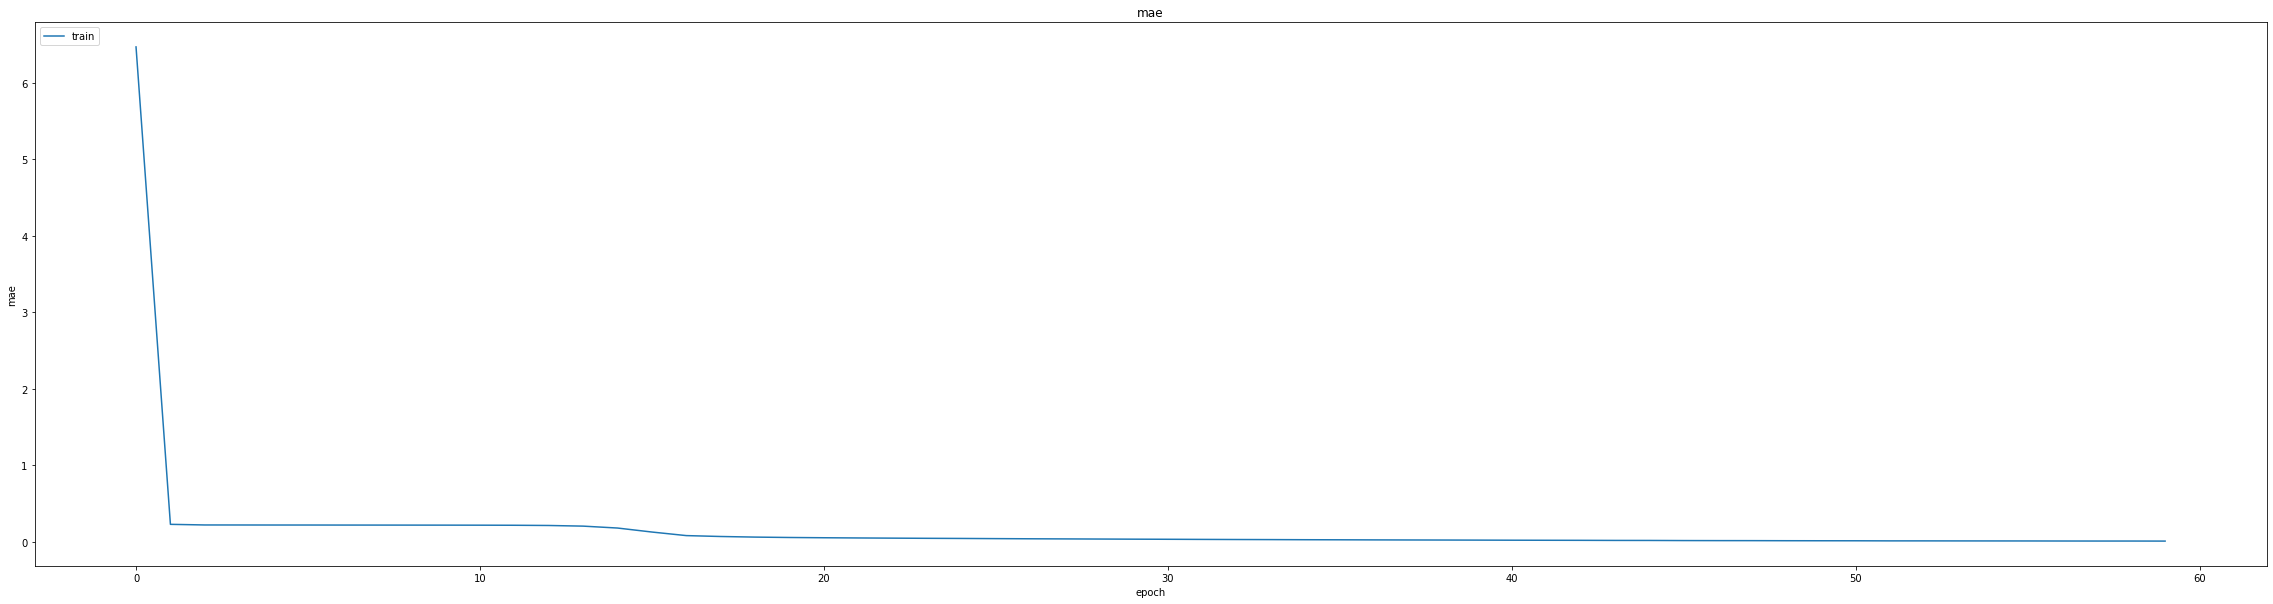

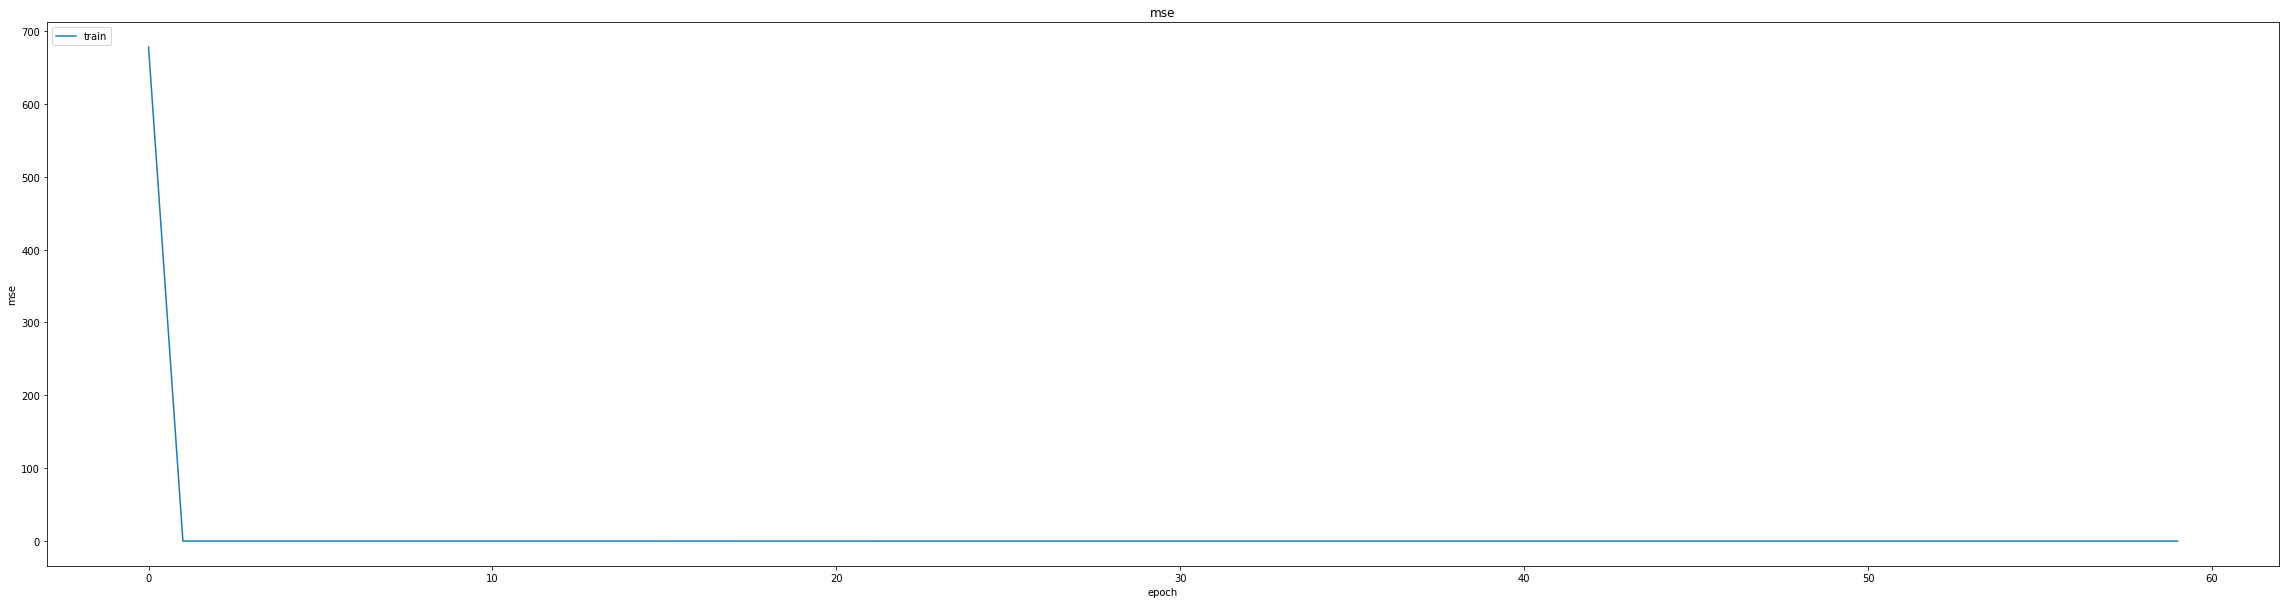

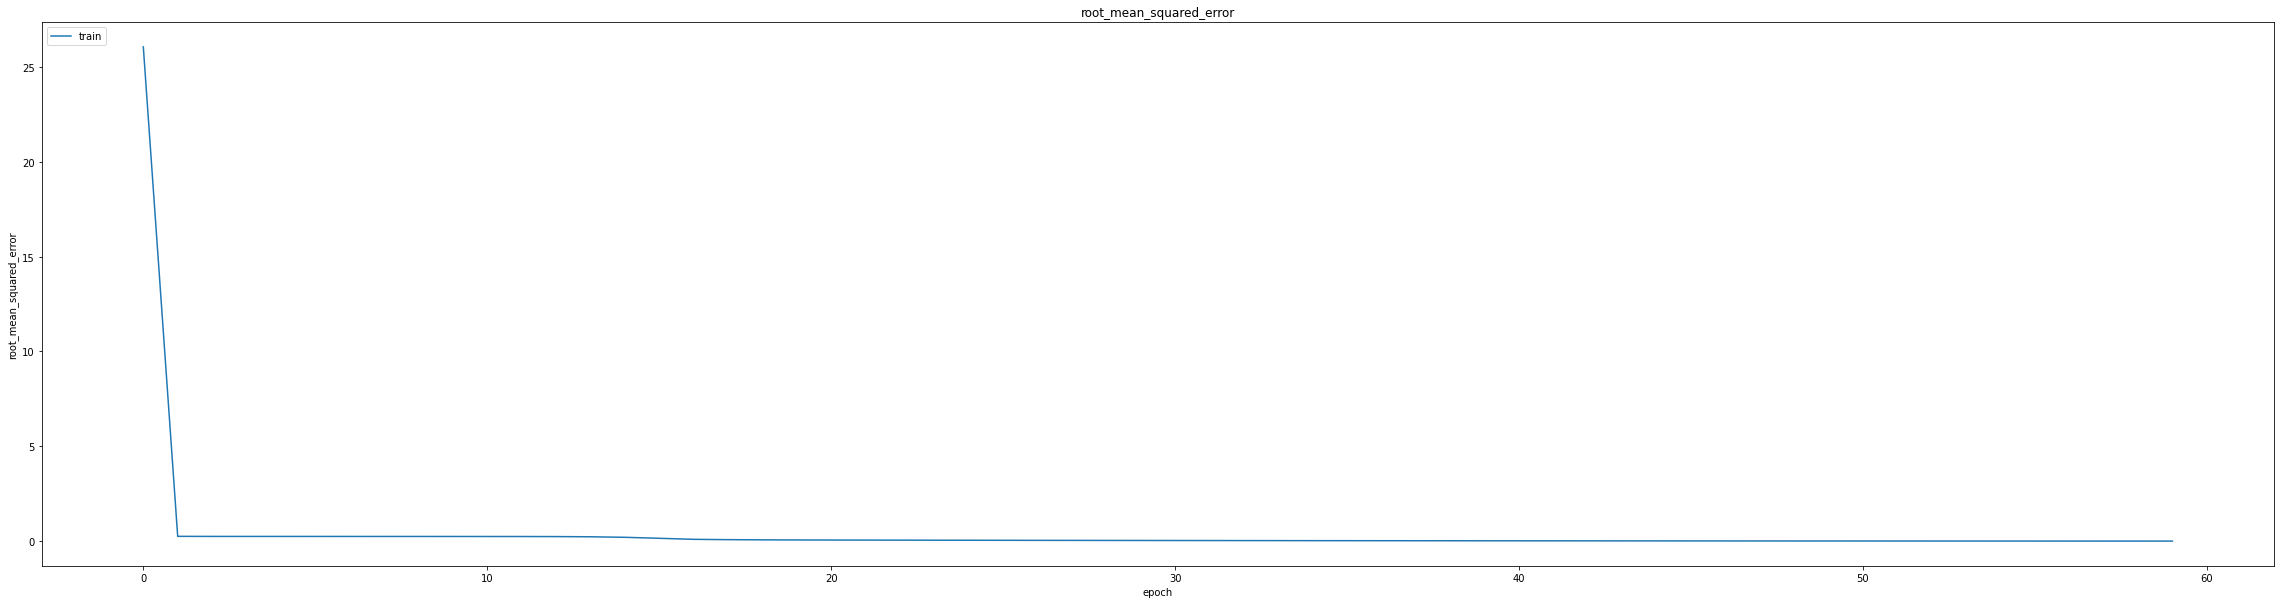

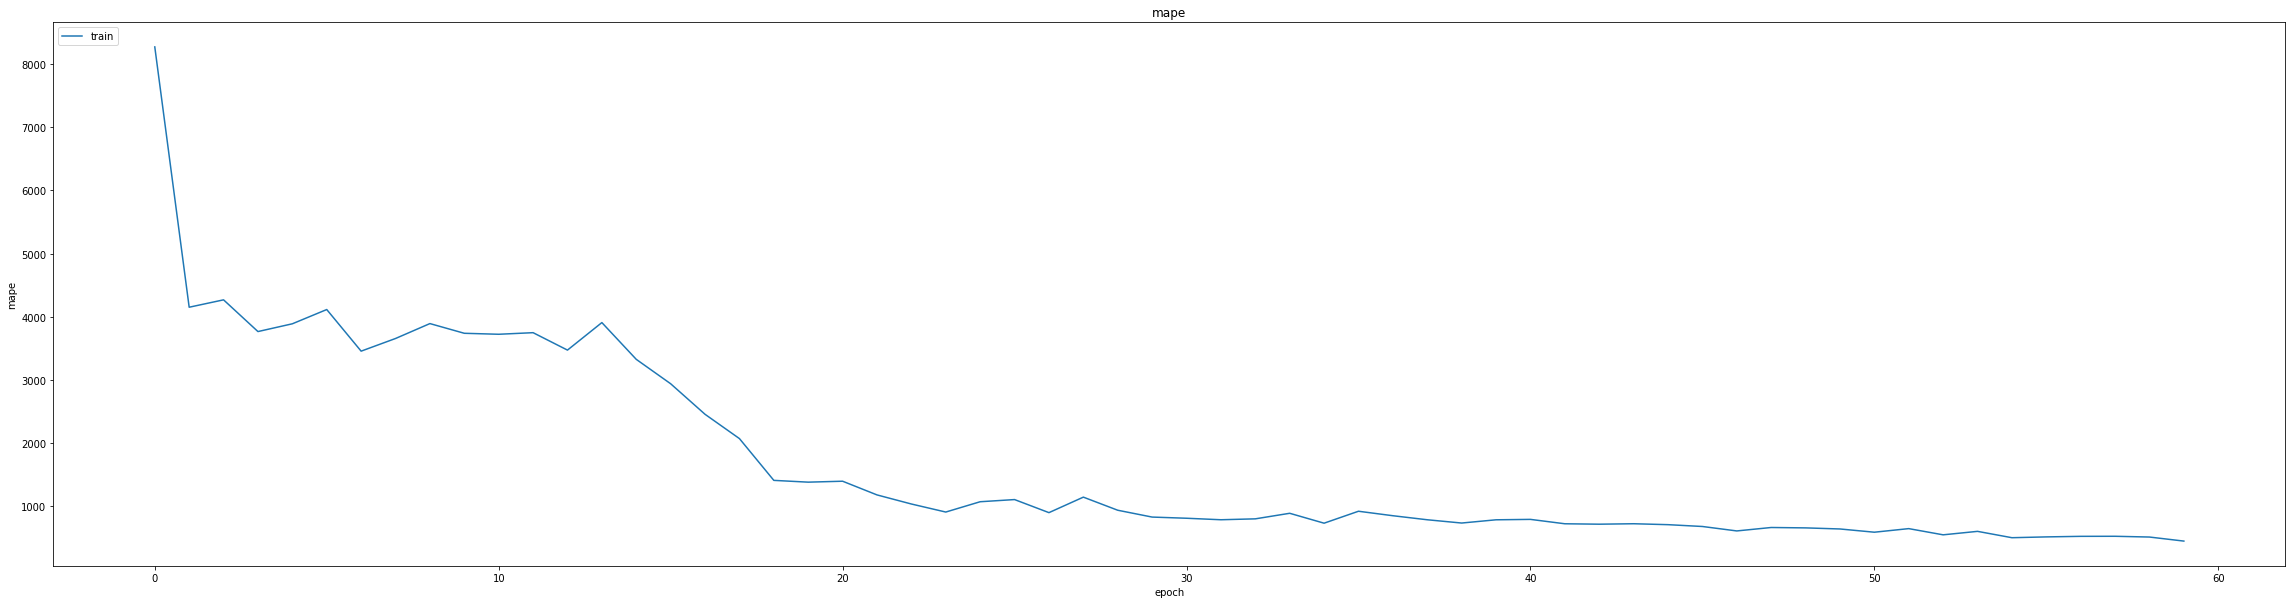

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013022331520915031
0.017943494021892548
687/687 [==============================] - 6s 6ms/step
-1.113492724080412


In [ ]:
model.load_weights("CHF_USD_5min_BiLSTM.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/6
959/960 [============================>.] - ETA: 0s - loss: 5.4307e-04 - mae: 0.0124 - mse: 5.4307e-04 - root_mean_squared_error: 0.0233 - mape: 468.0531
Epoch 1: val_mse did not improve from 0.00032
960/960 [==============================] - 28s 21ms/step - loss: 5.4288e-04 - mae: 0.0124 - mse: 5.4288e-04 - root_mean_squared_error: 0.0233 - mape: 467.7545 - val_loss: 4.2753e-04 - val_mae: 0.0156 - val_mse: 4.2753e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 2494.1489 - lr: 0.0010
Epoch 2/6
960/960 [==============================] - ETA: 0s - loss: 1.2595e-04 - mae: 0.0086 - mse: 1.2595e-04 - root_mean_squared_error: 0.0112 - mape: 375.4718
Epoch 2: val_mse did not improve from 0.00032
960/960 [==============================] - 18s 19ms/step - loss: 1.2595e-04 - mae: 0.0086 - mse: 1.2595e-04 - root_mean_squared_error: 0.0112 - mape: 375.4718 - val_loss: 0.0014 - val_mae: 0.0322 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 2091.3809 - lr: 0.0010


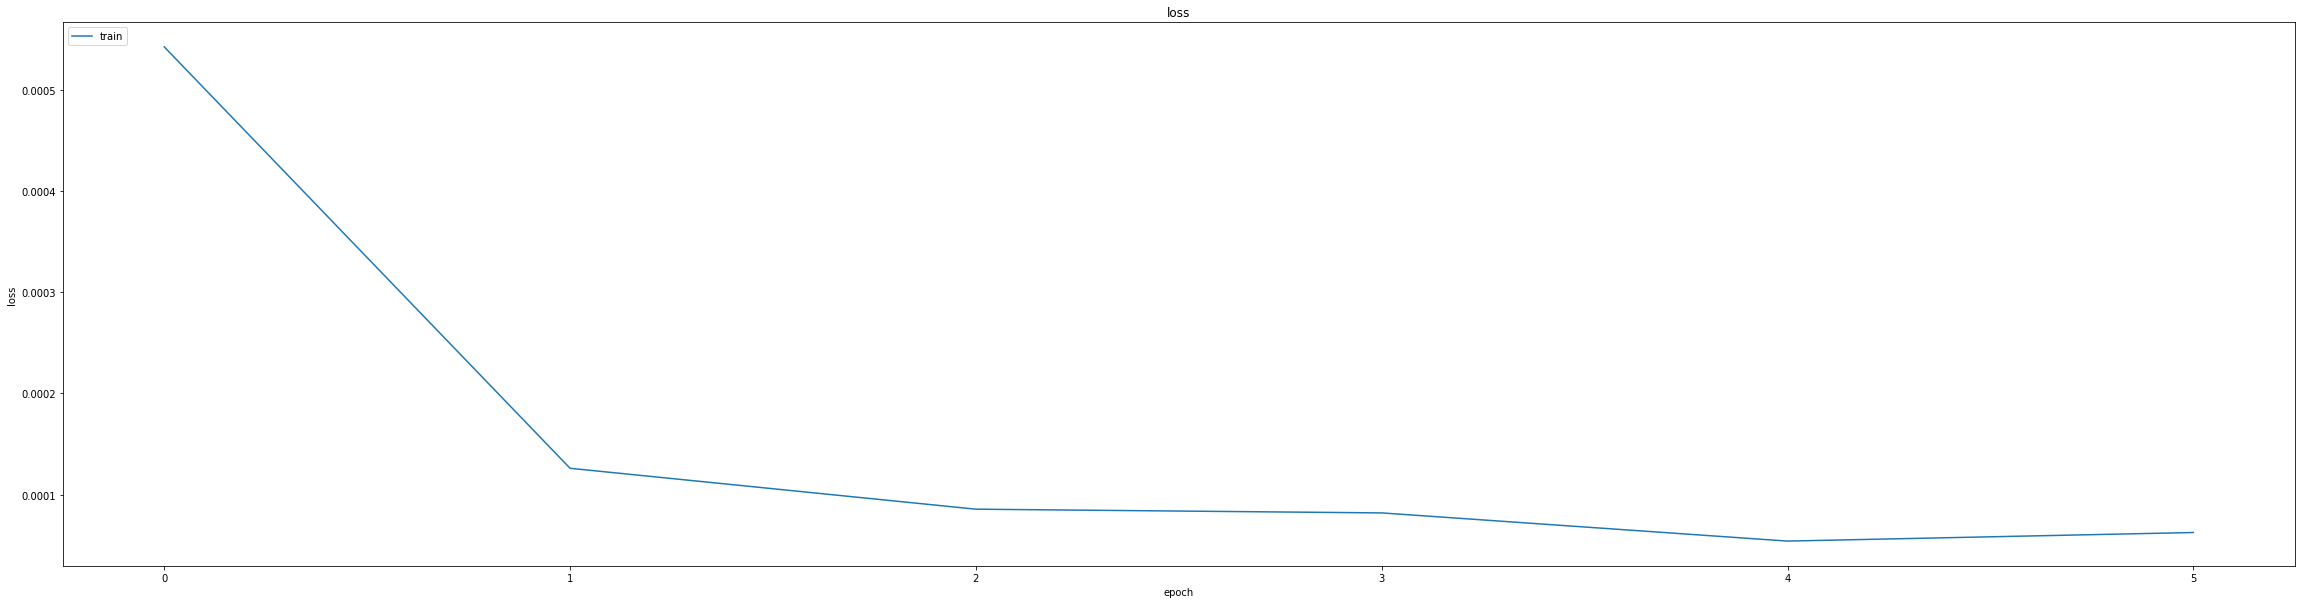

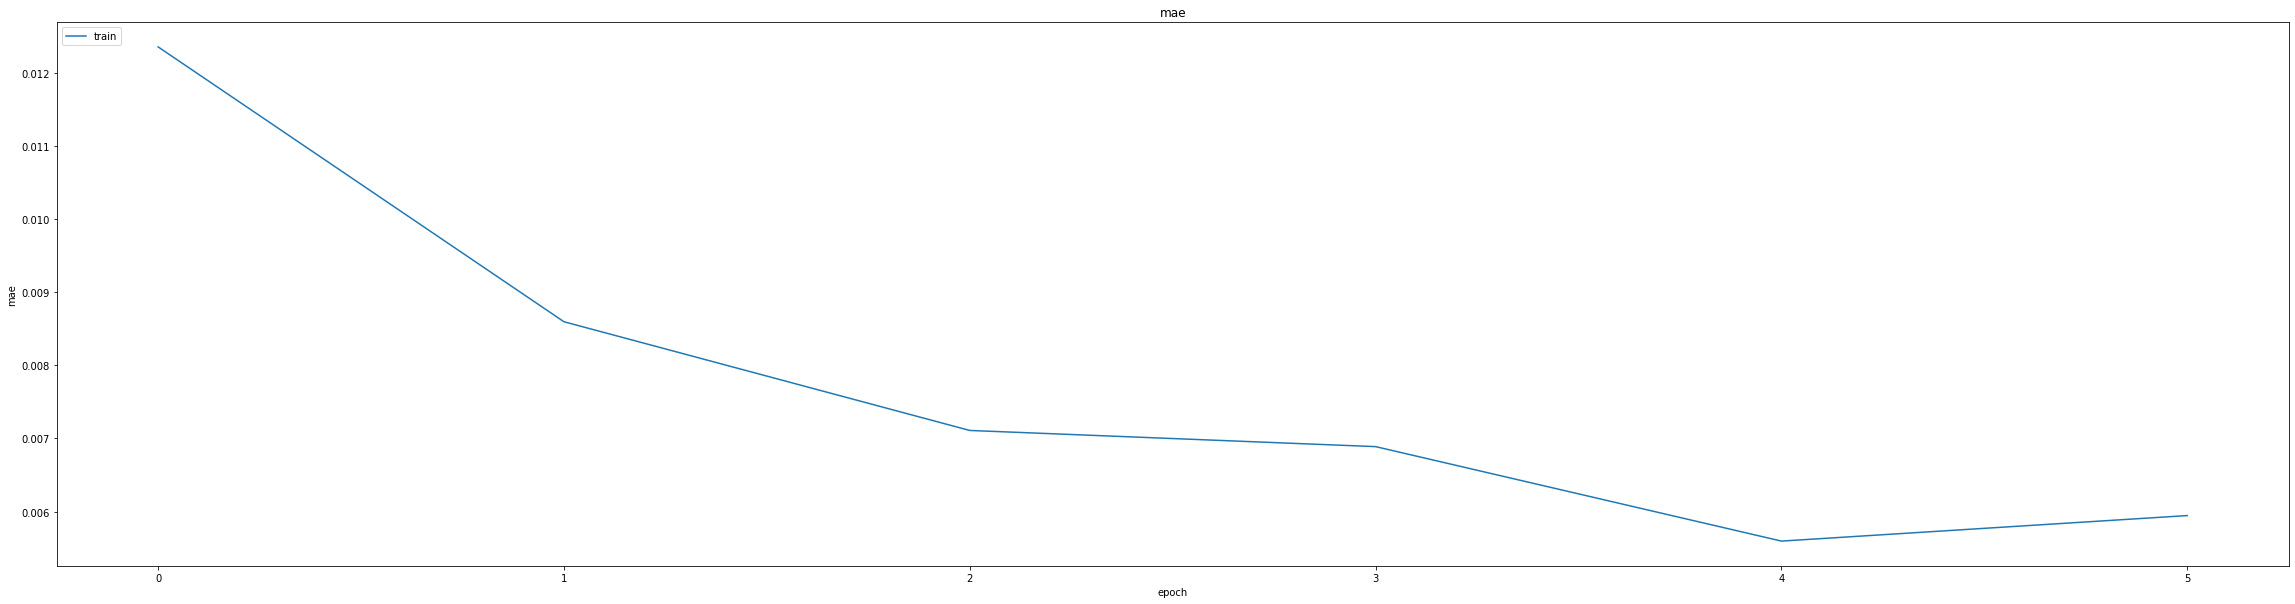

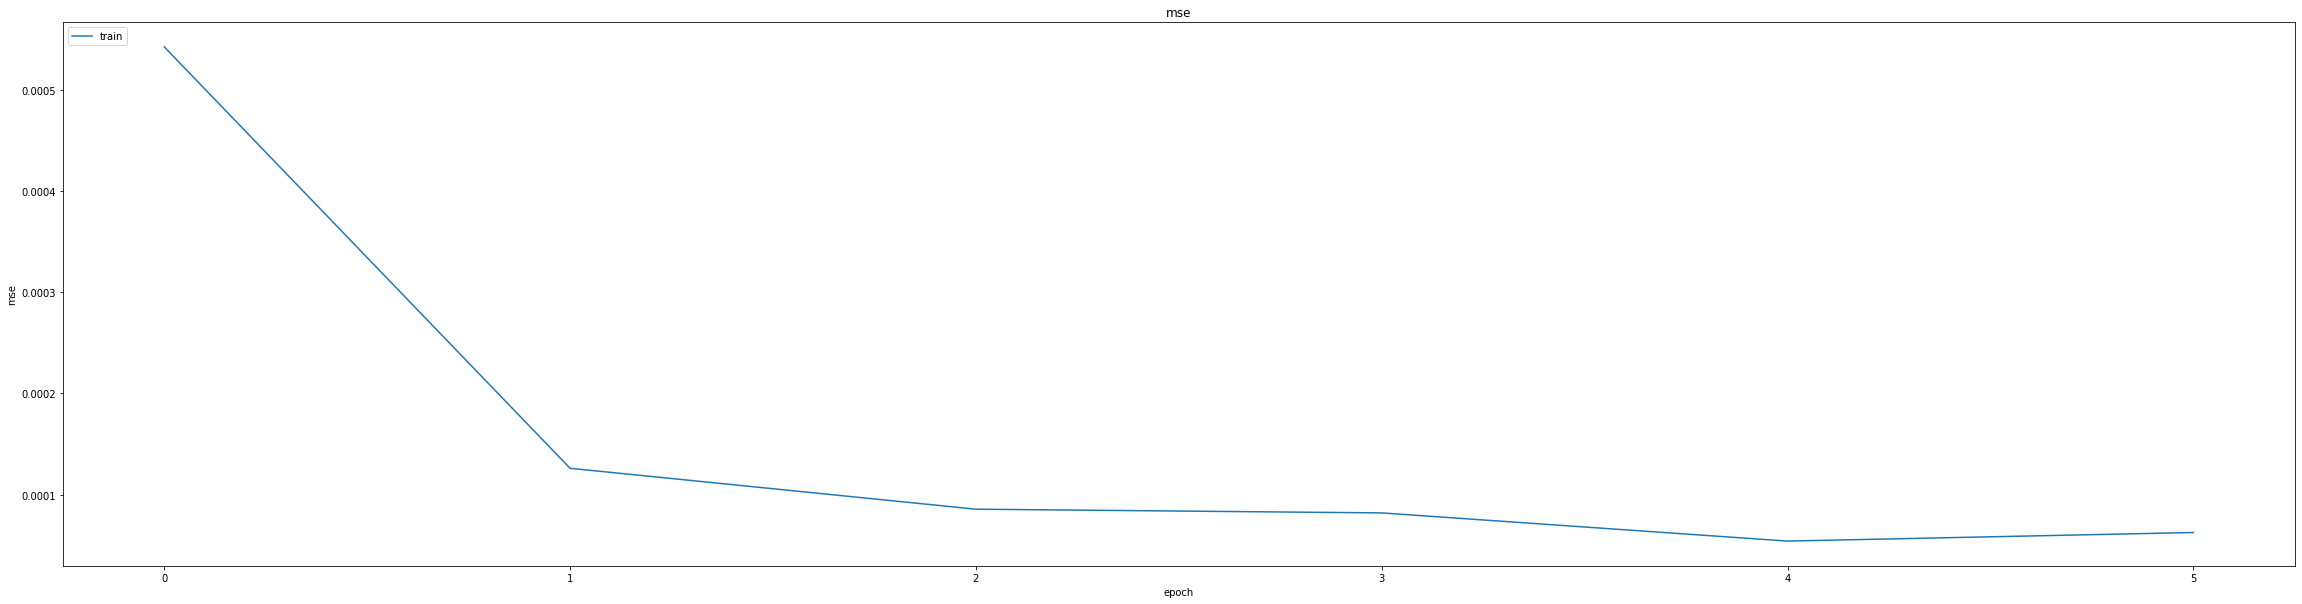

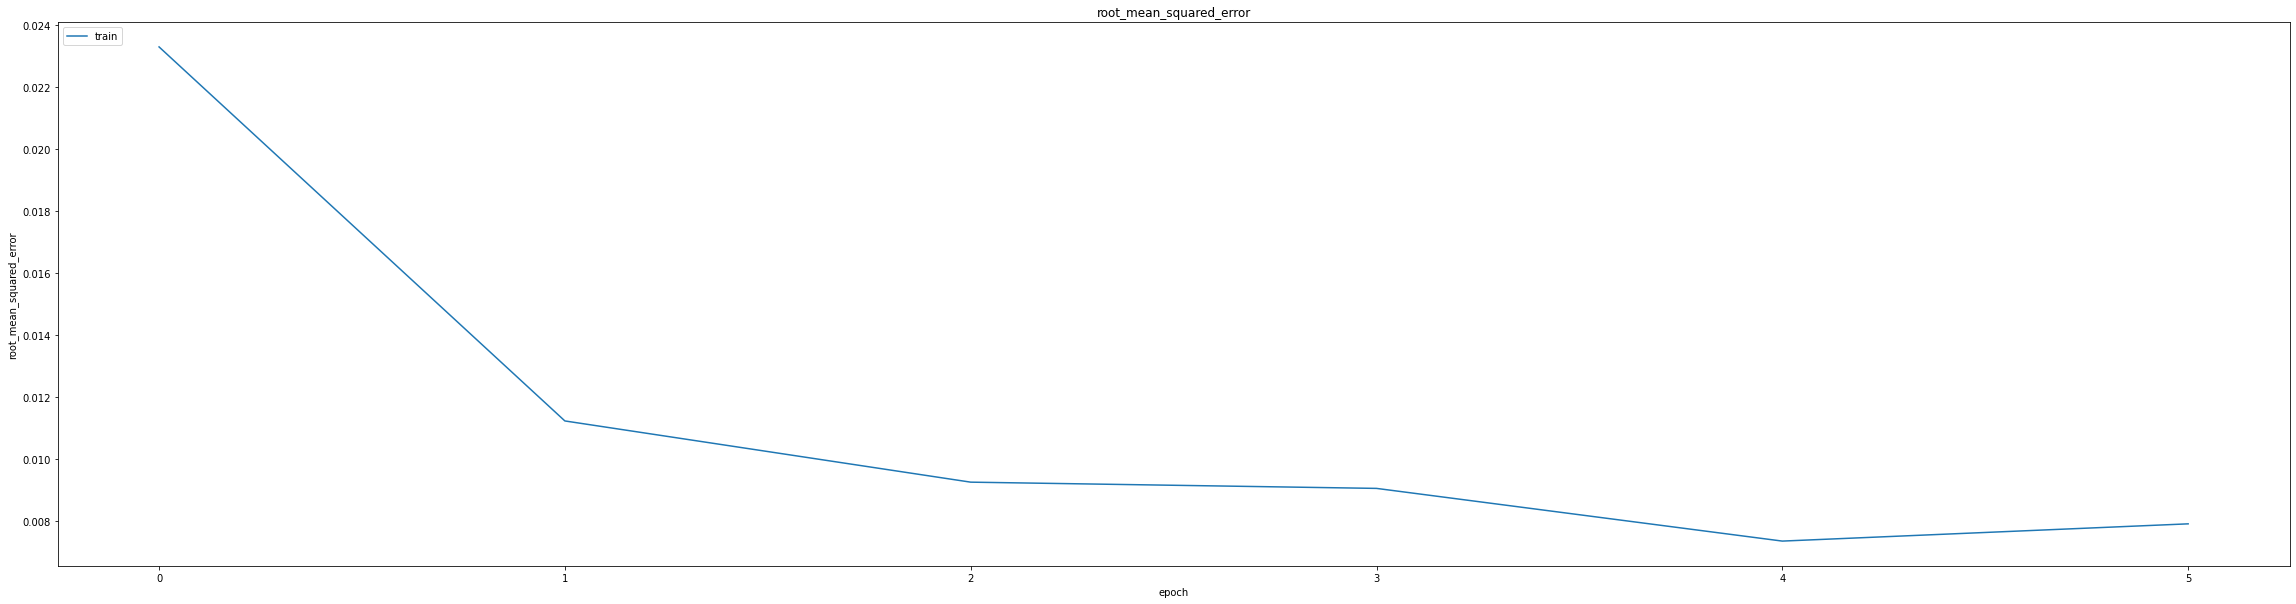

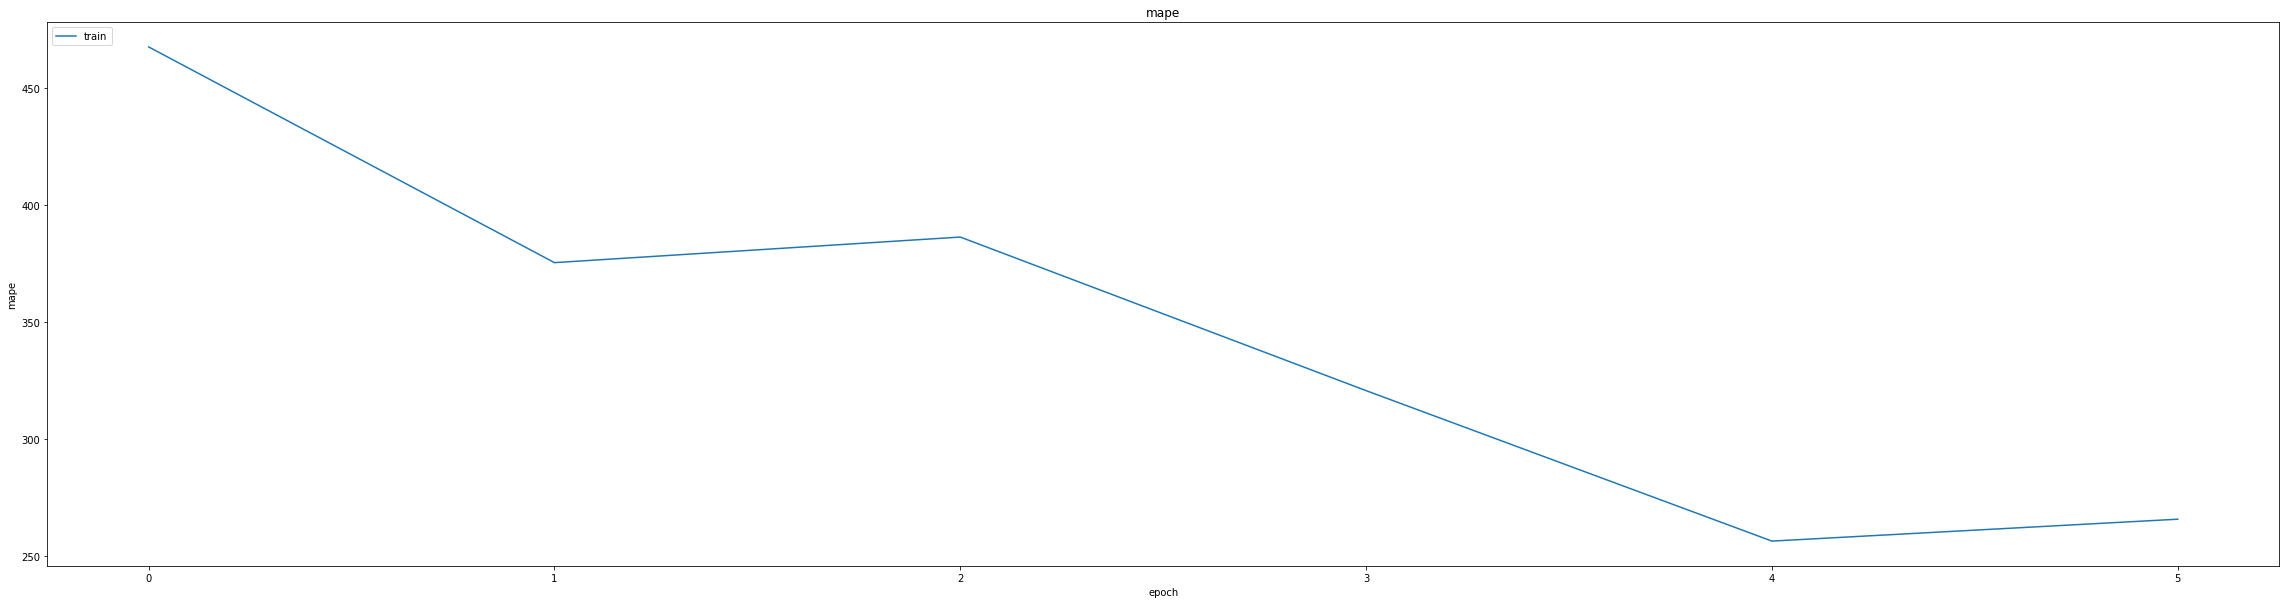

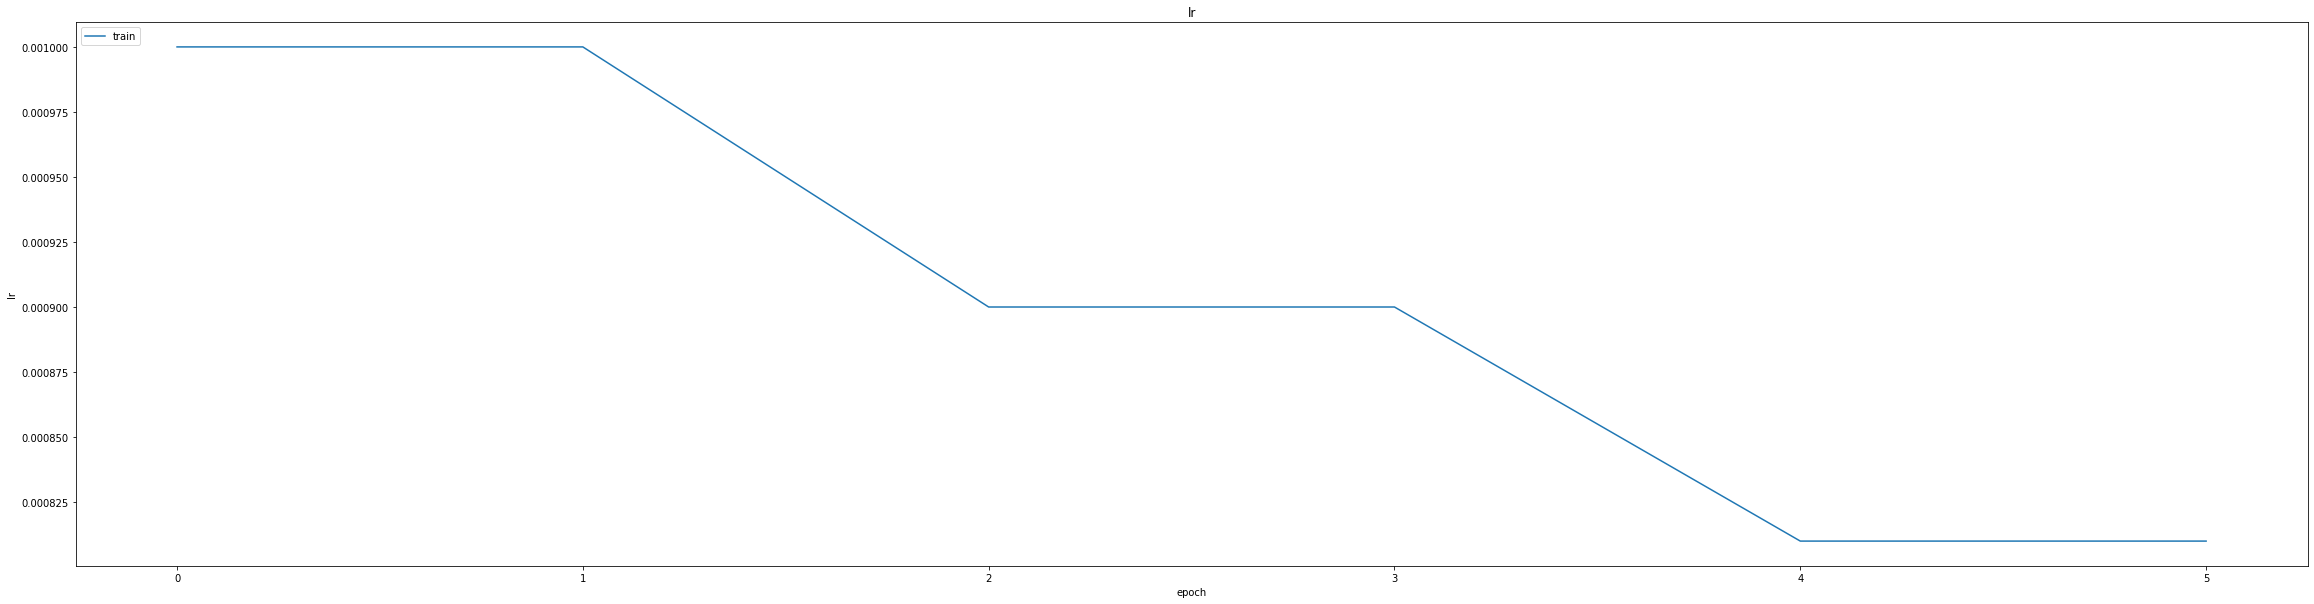

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014398815110325813
0.017823345959186554
687/687 [==============================] - 6s 6ms/step
0.989742435120434


687/687 [==============================] - 4s 6ms/step


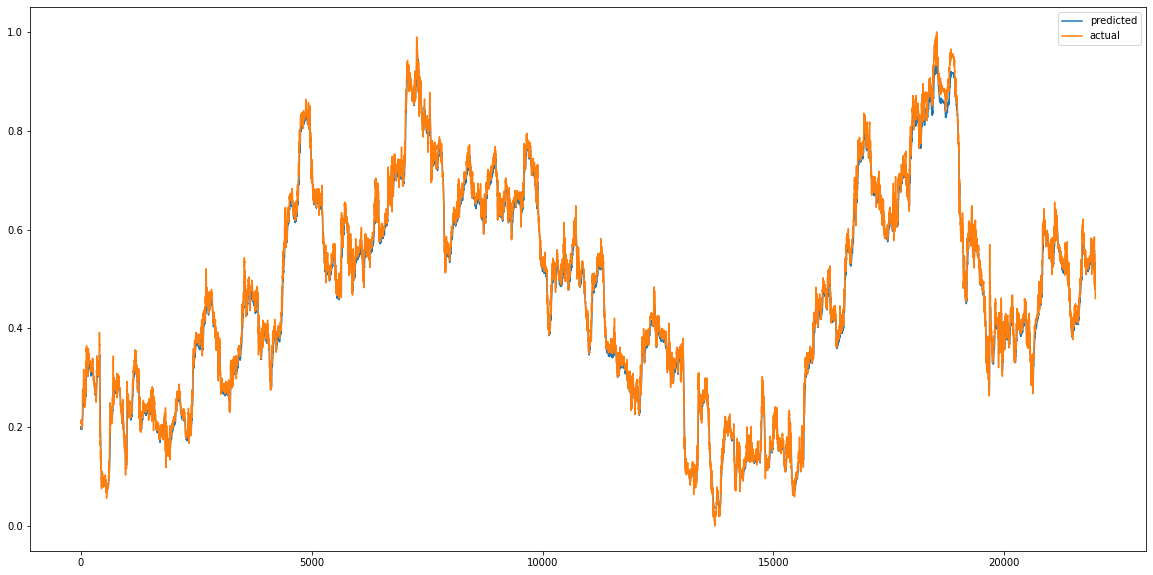

In [ ]:
model.load_weights("/content/CHF_USD_5min_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


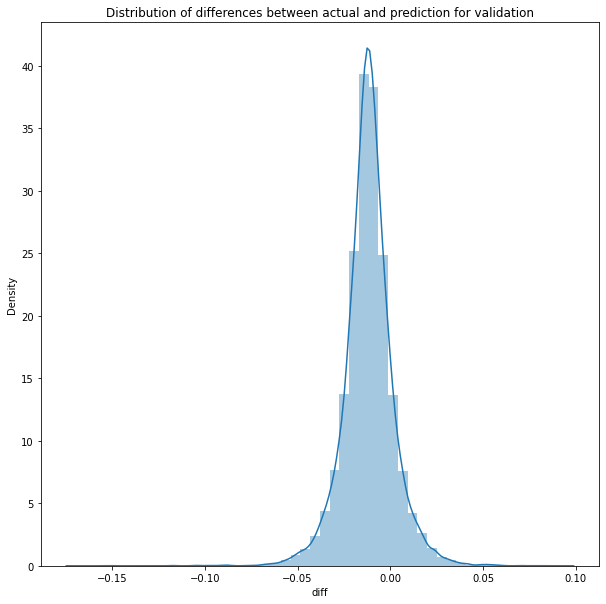

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

272/272 [==============================] - 2s 6ms/step


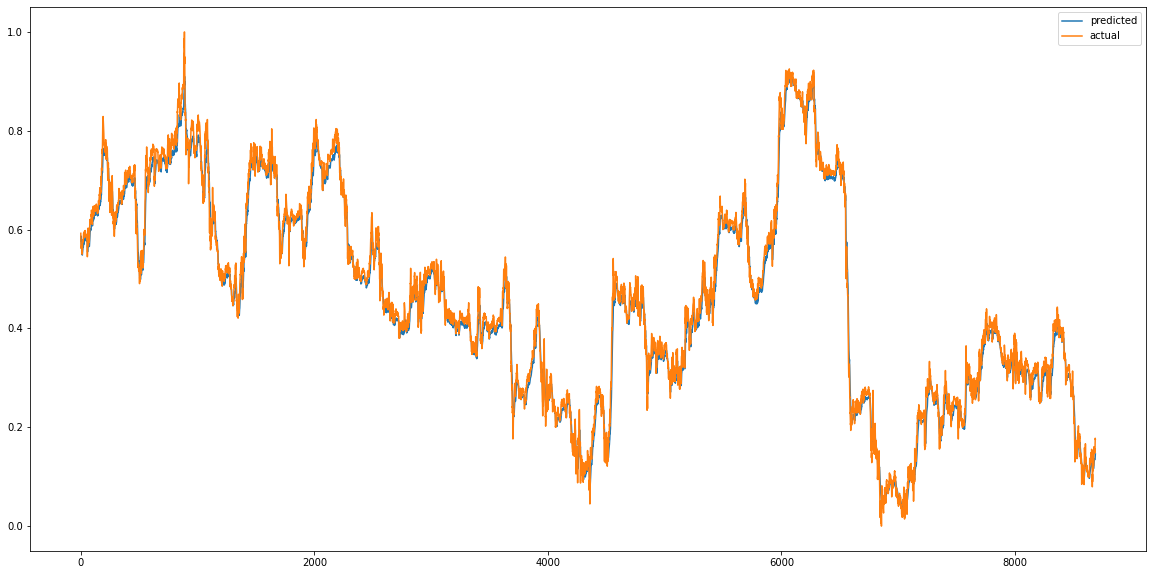

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


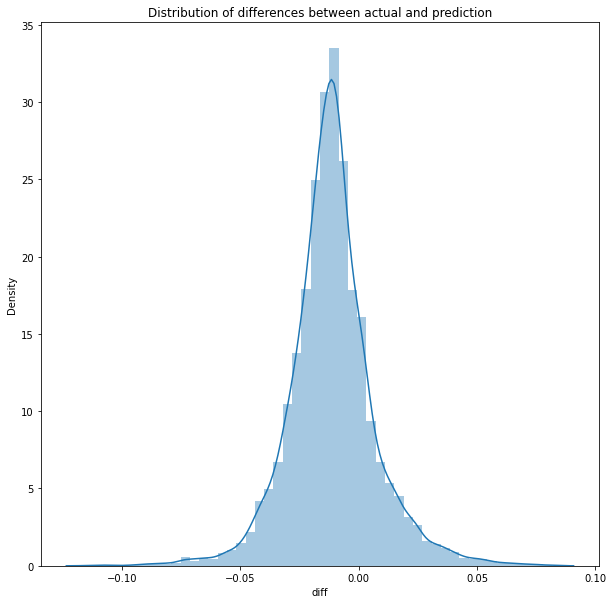

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0004640891453205337
MAE :  0.016939749859350598
RMSE  : 0.02154272836296586
272/272 [==============================] - 2s 6ms/step
R2_Score  : 0.9896520931396363


count    8690.000000
mean       -0.011318
std         0.018331
min        -0.114456
25%        -0.020760
50%        -0.011733
75%        -0.002483
max         0.081823
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 277.9824 - mae: 2.2118 - mse: 277.9824 - root_mean_squared_error: 16.6728 - mape: 1530.9150
Epoch 1: val_mse improved from inf to 0.09618, saving model to weights.best.hdf5
463/463 [==============================] - 311s 656ms/step - loss: 277.9824 - mae: 2.2118 - mse: 277.9824 - root_mean_squared_error: 16.6728 - mape: 1530.9150 - val_loss: 0.0962 - val_mae: 0.2599 - val_mse: 0.0962 - val_root_mean_squared_error: 0.3101 - val_mape: 8067.8882
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0540 - mae: 0.1769 - mse: 0.0540 - root_mean_squared_error: 0.2323 - mape: 1679.0303
Epoch 2: val_mse improved from 0.09618 to 0.02971, saving model to weights.best.hdf5
463/463 [==============================] - 306s 661ms/step - loss: 0.0540 - mae: 0.1769 - mse: 0.0540 - root_mean_squared_error: 0.2323 - mape: 1679.0303 - val_loss: 0.0297 - val_mae: 0.1329 - val_mse: 0.0297 - val_root_mean_squared_error: 0

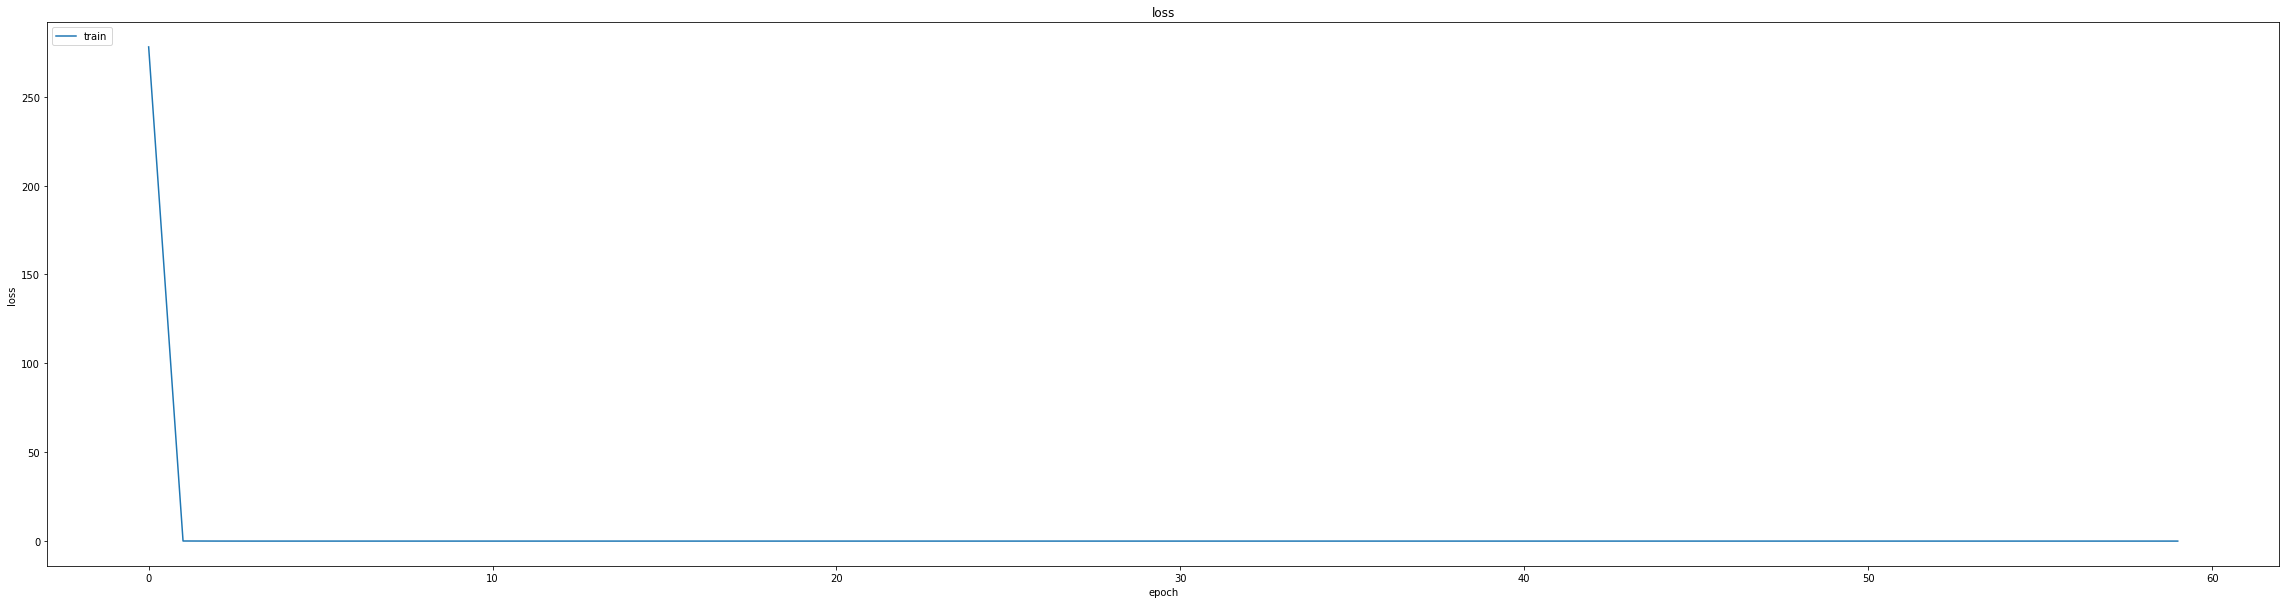

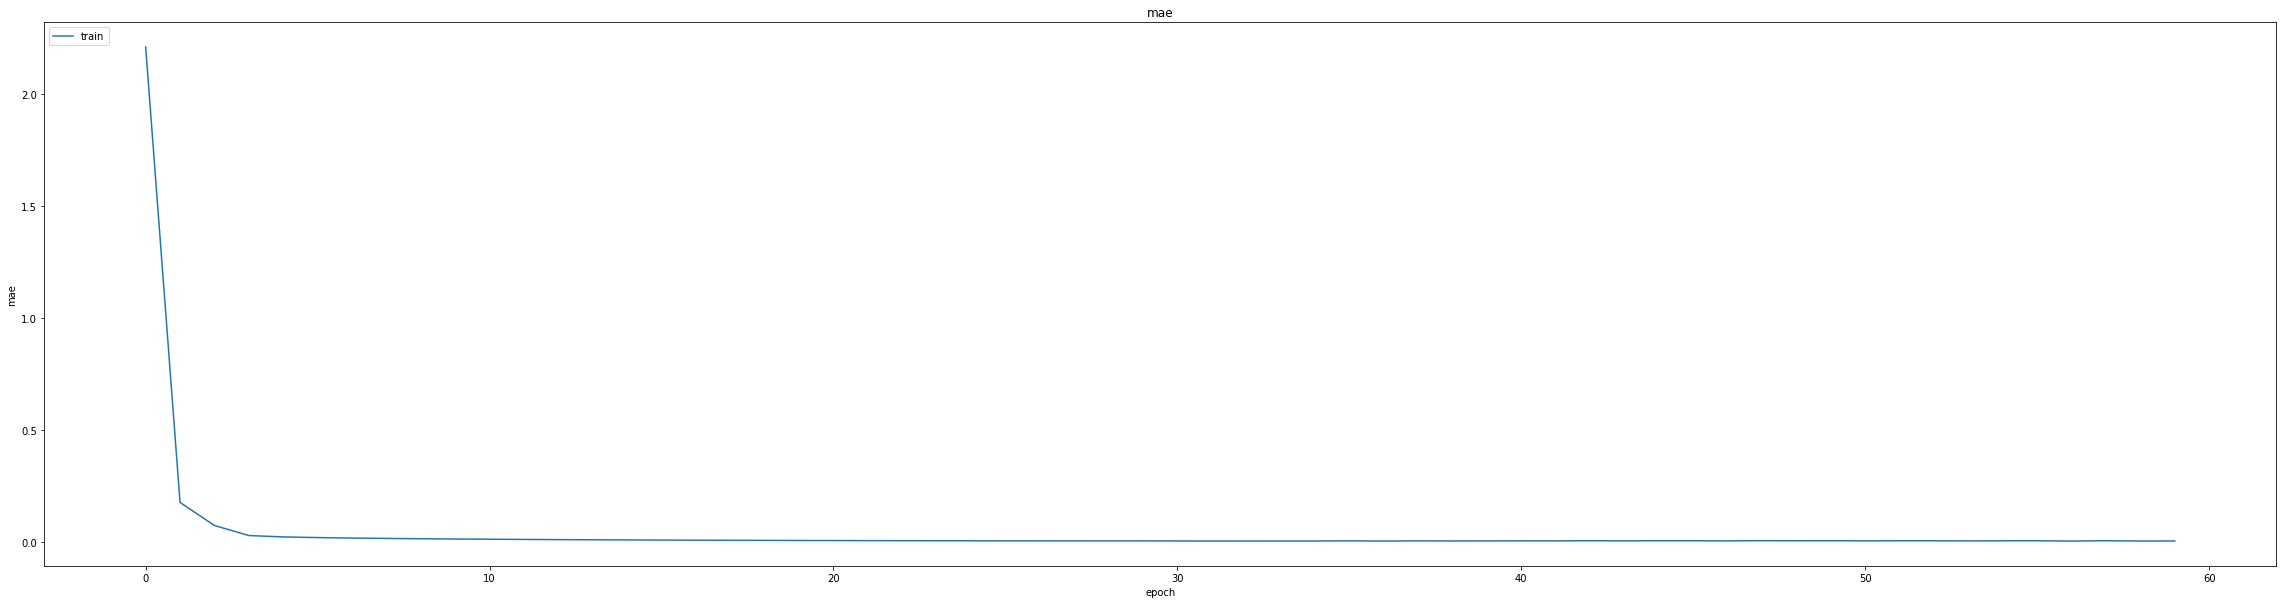

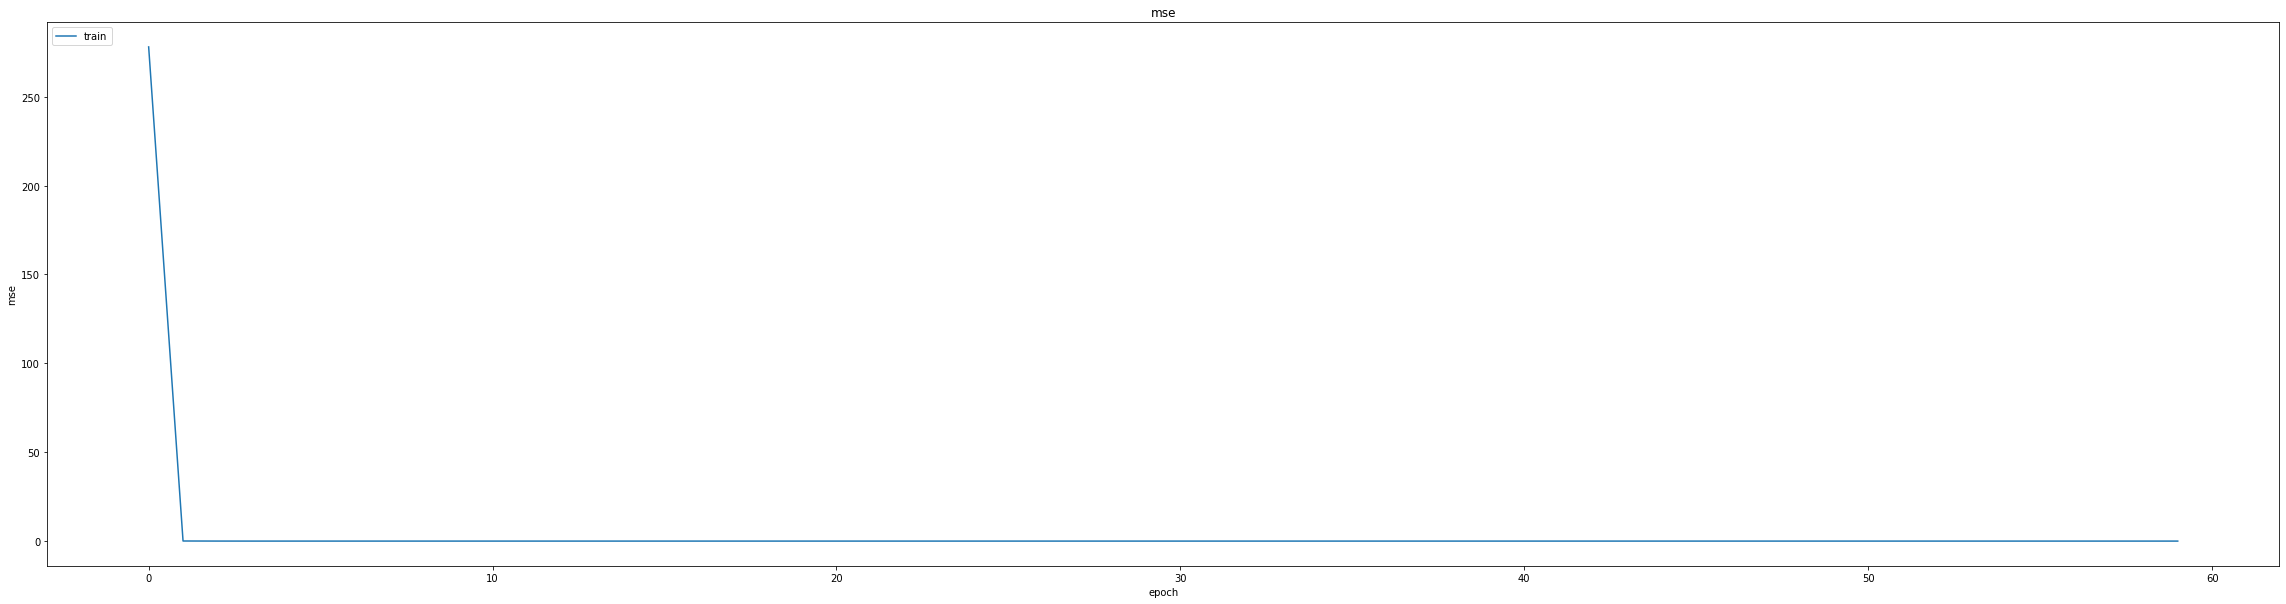

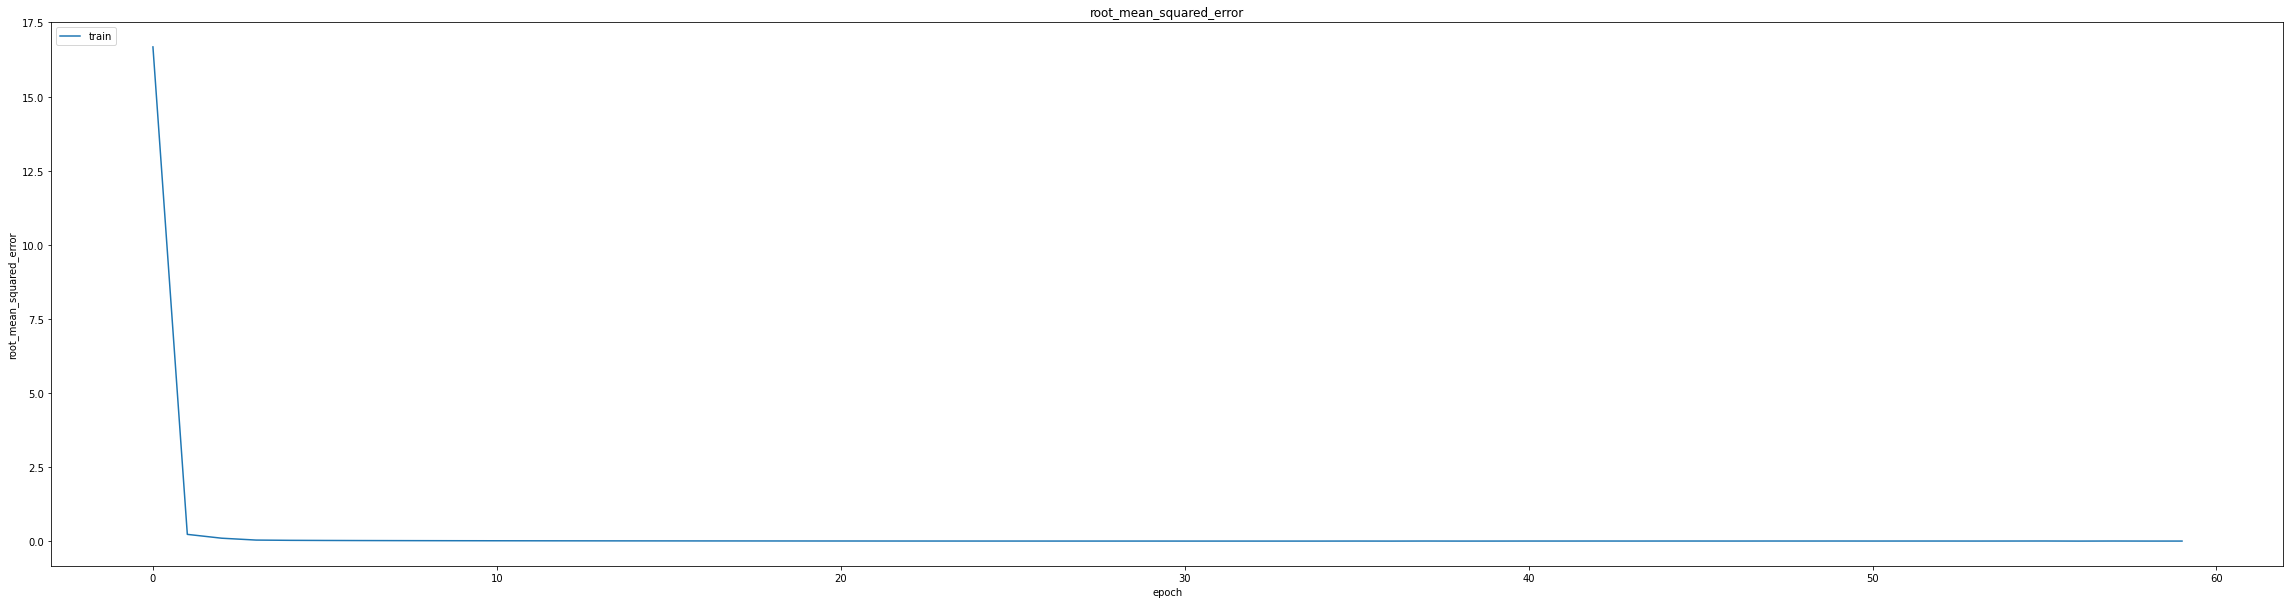

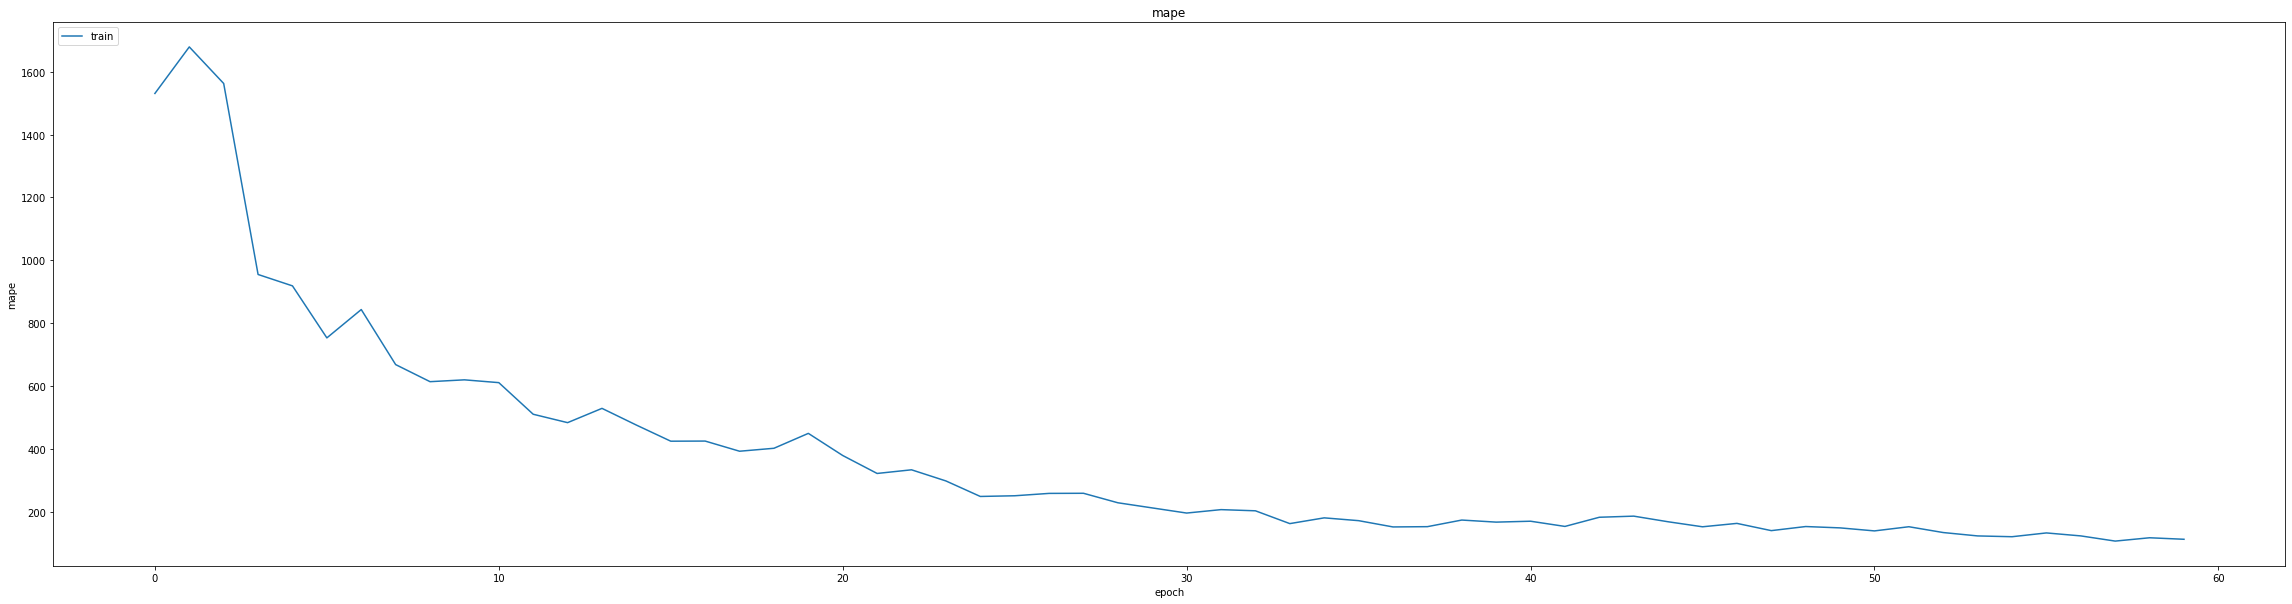

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014942463487386703
0.01820307970046997
687/687 [==============================] - 27s 37ms/step
0.9338065928306127


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 4.4877e-04 - mae: 0.0088 - mse: 4.4877e-04 - root_mean_squared_error: 0.0212 - mape: 156.1671
Epoch 1: val_mse did not improve from 0.00033
463/463 [==============================] - 324s 683ms/step - loss: 4.4877e-04 - mae: 0.0088 - mse: 4.4877e-04 - root_mean_squared_error: 0.0212 - mape: 156.1671 - val_loss: 0.0021 - val_mae: 0.0440 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0453 - val_mape: 2241.4041 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 2.0308e-05 - mae: 0.0034 - mse: 2.0308e-05 - root_mean_squared_error: 0.0045 - mape: 154.0243
Epoch 2: val_mse did not improve from 0.00033
463/463 [==============================] - 319s 689ms/step - loss: 2.0308e-05 - mae: 0.0034 - mse: 2.0308e-05 - root_mean_squared_error: 0.0045 - mape: 154.0243 - val_loss: 0.0019 - val_mae: 0.0425 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 2191.7737 - lr: 0.0010
lr

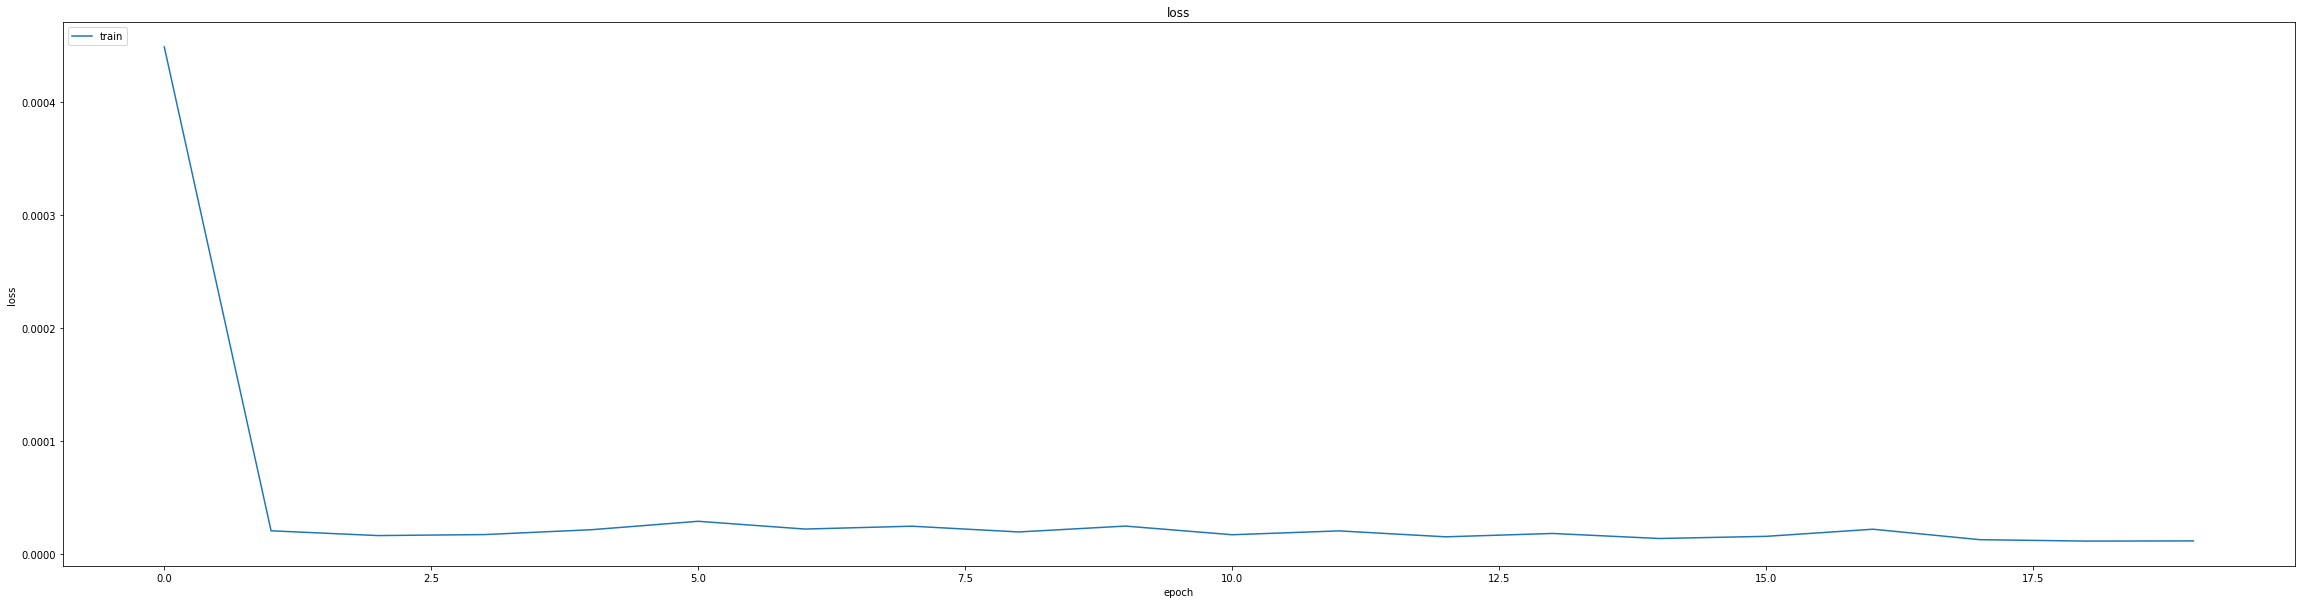

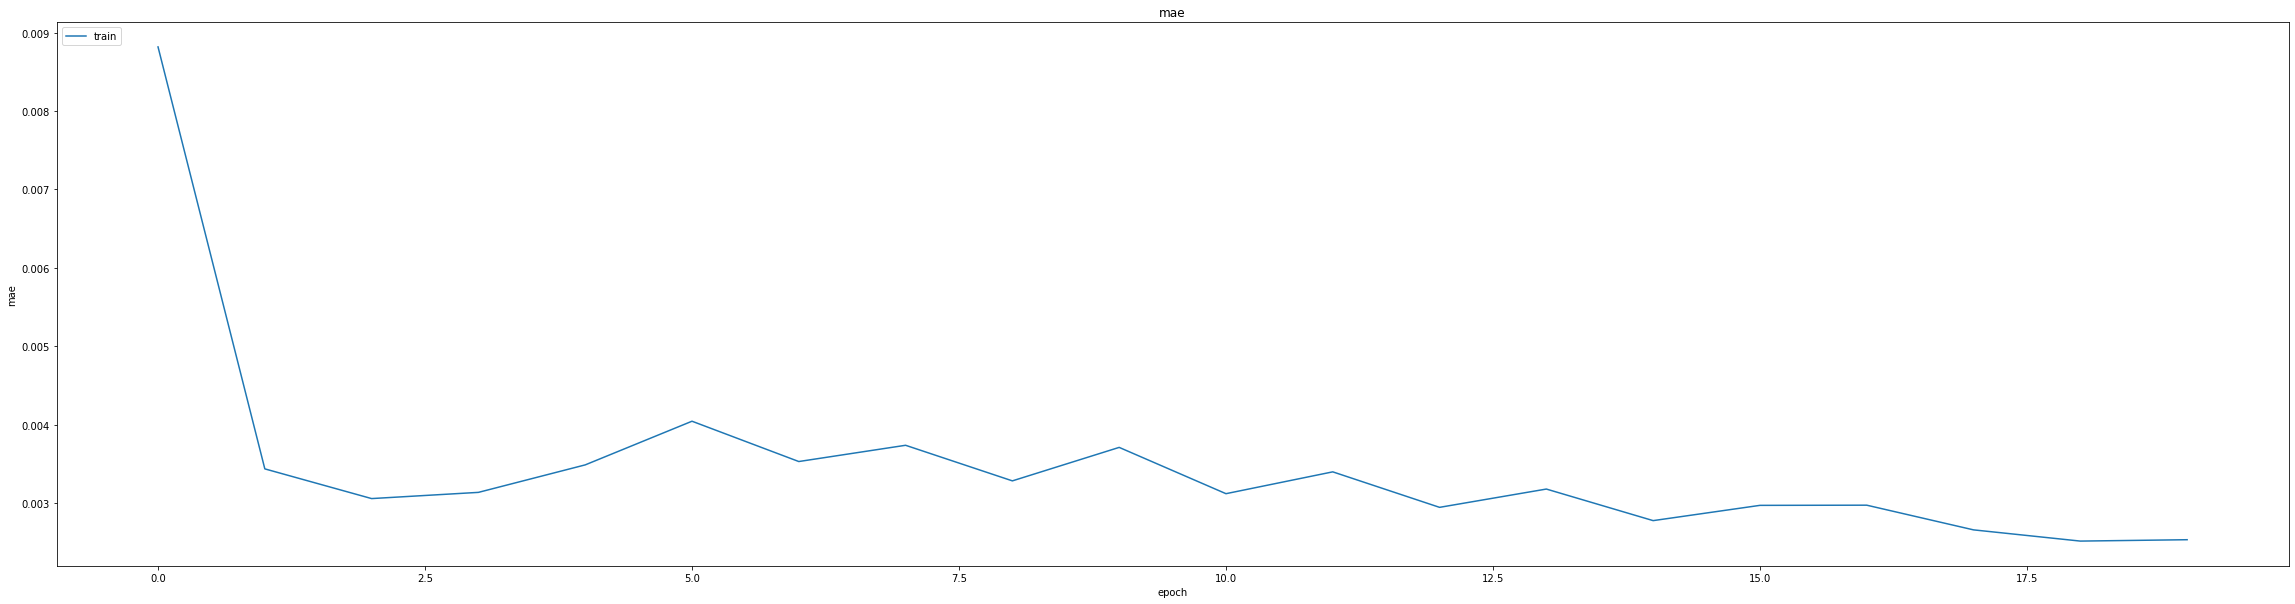

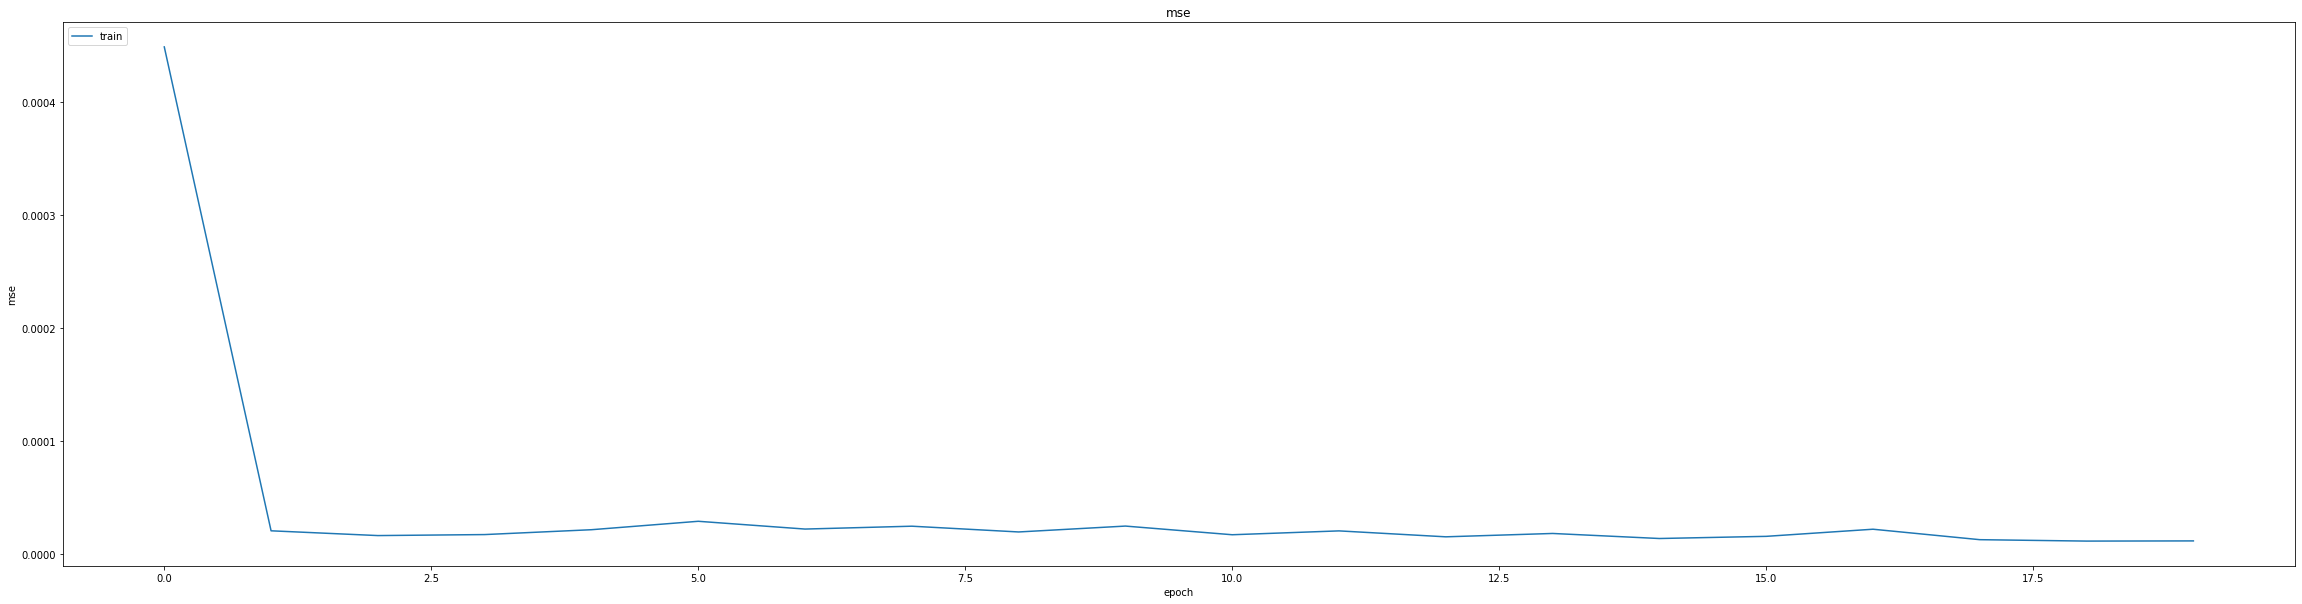

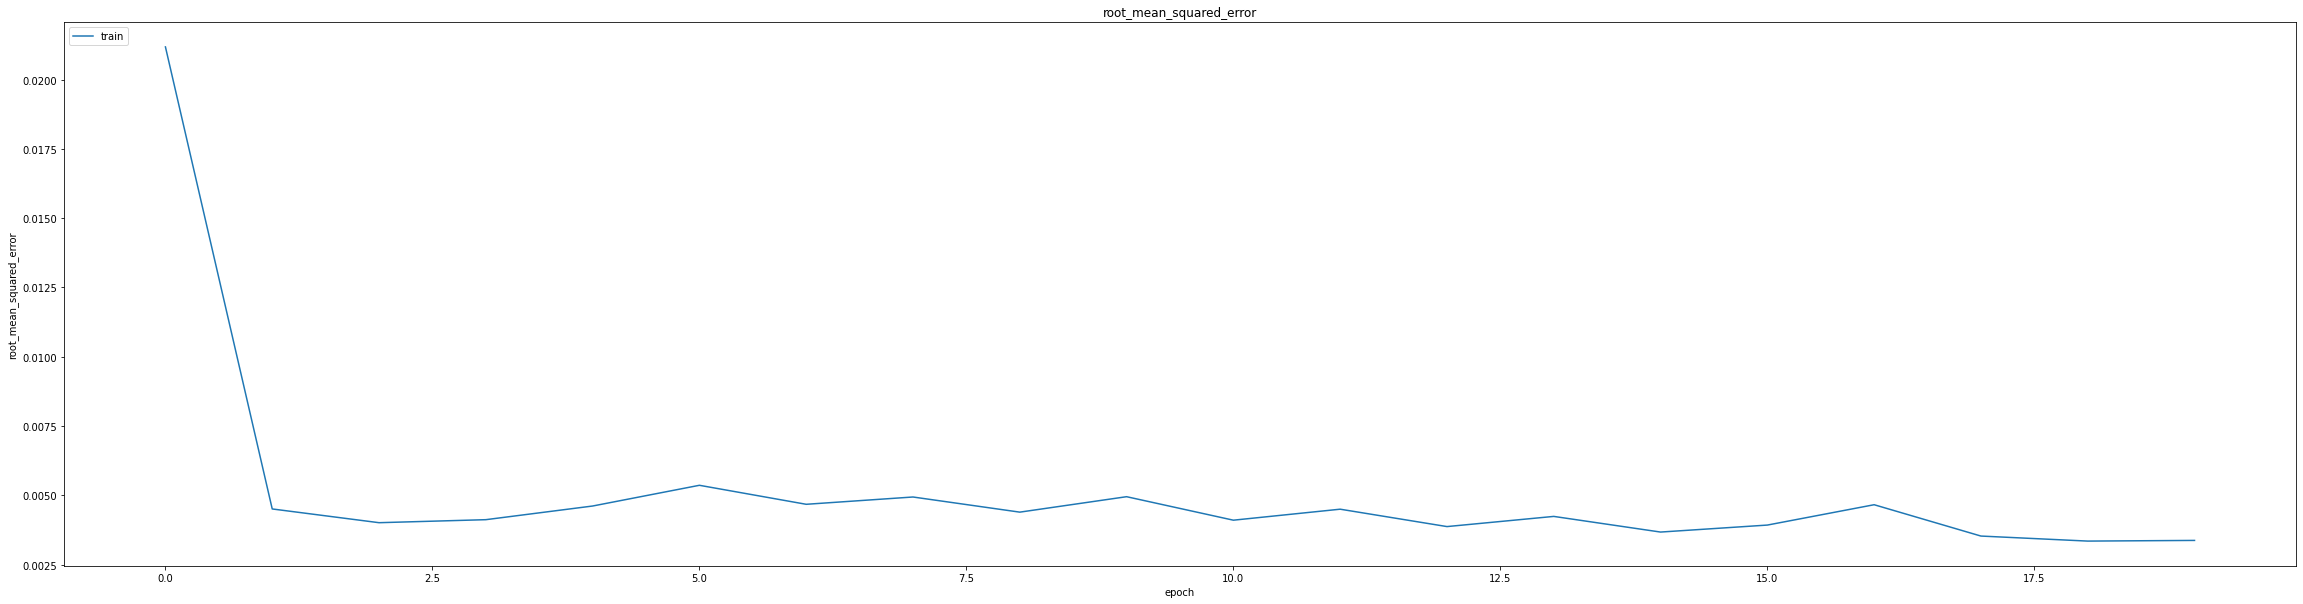

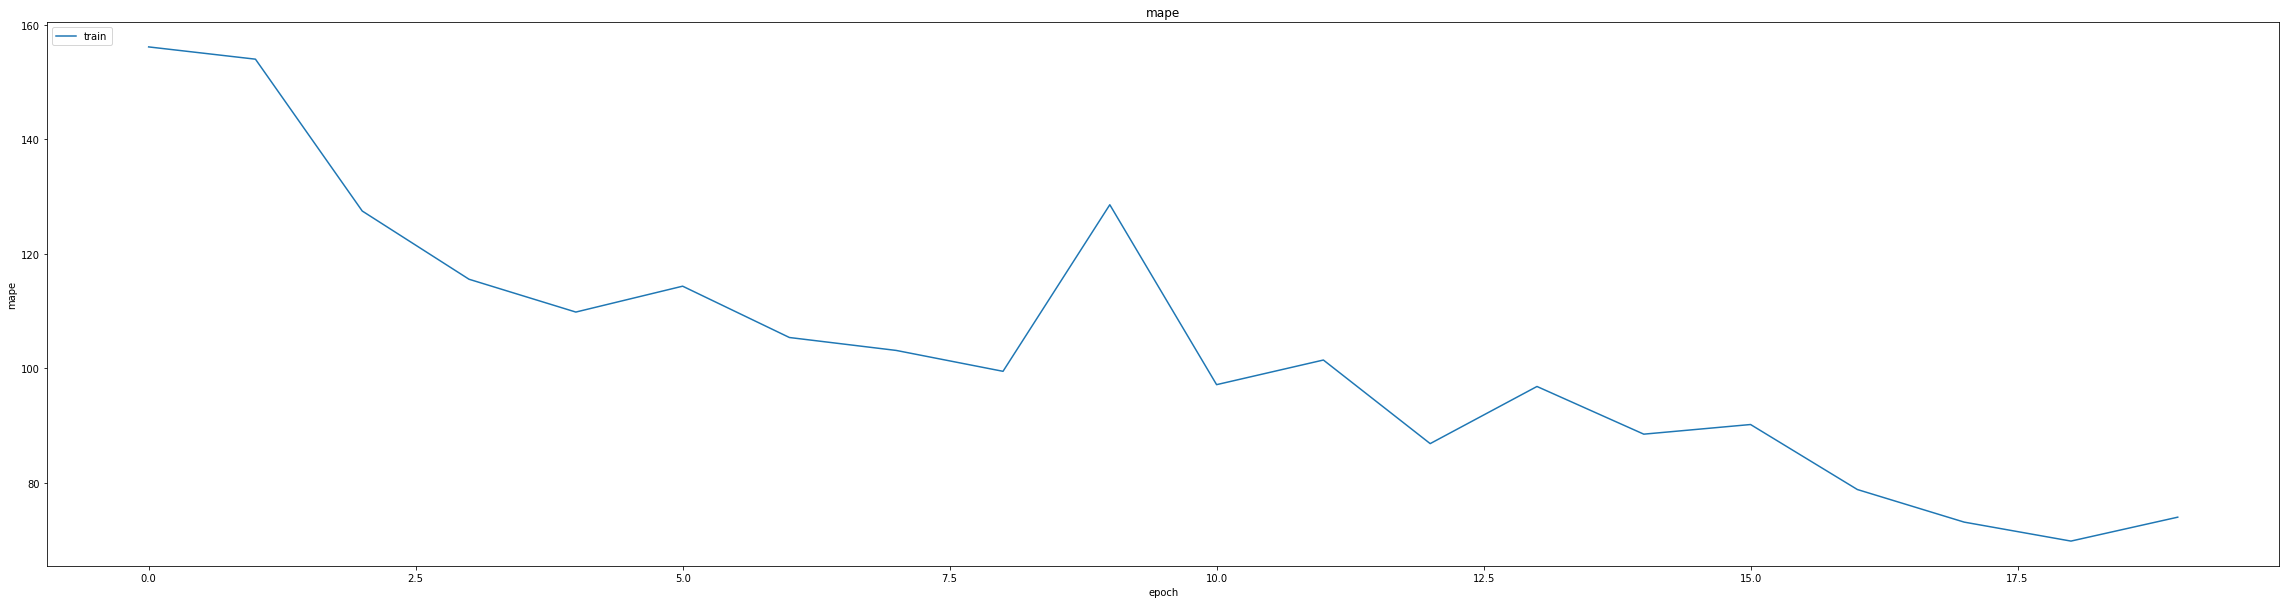

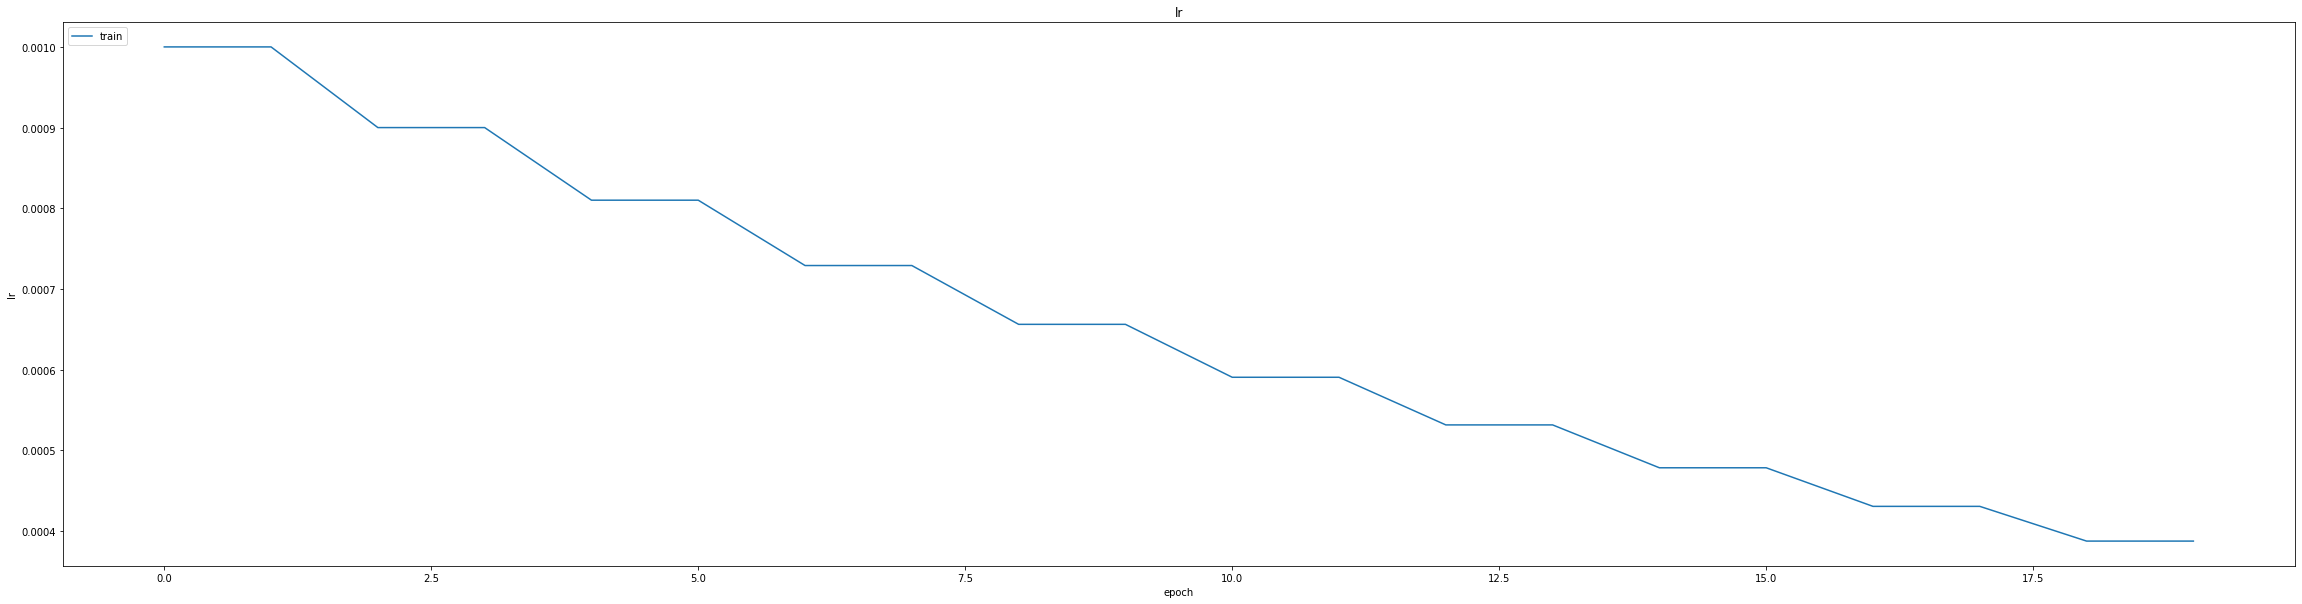

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03631014749407768
0.037568576633930206
687/687 [==============================] - 26s 36ms/step
0.9059253505665827


687/687 [==============================] - 25s 37ms/step


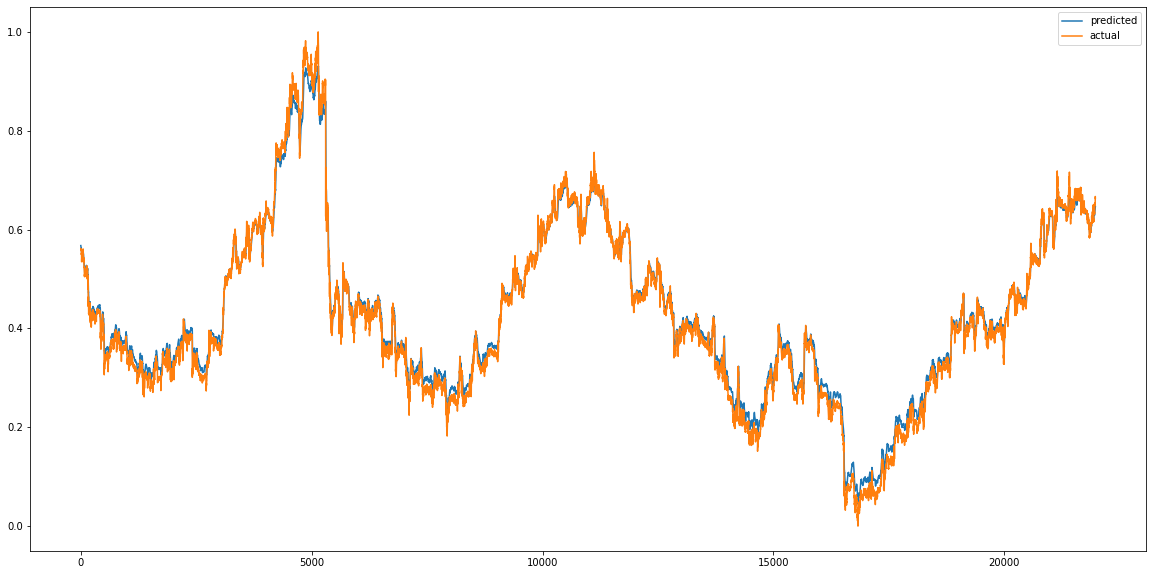

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


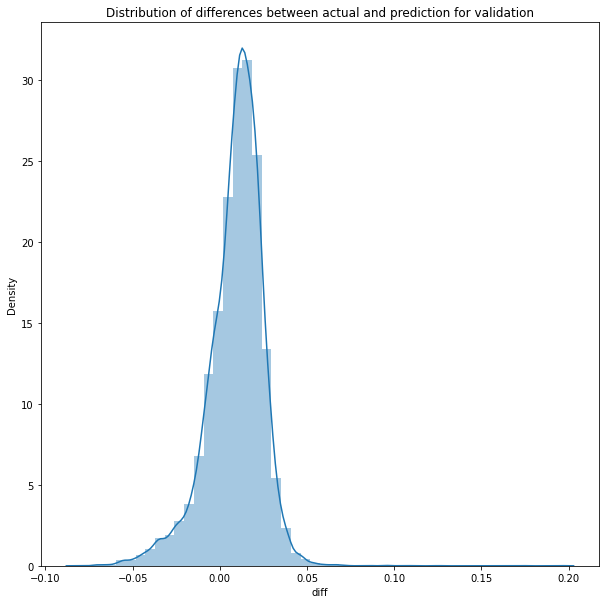

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

702/702 [==============================] - 26s 37ms/step


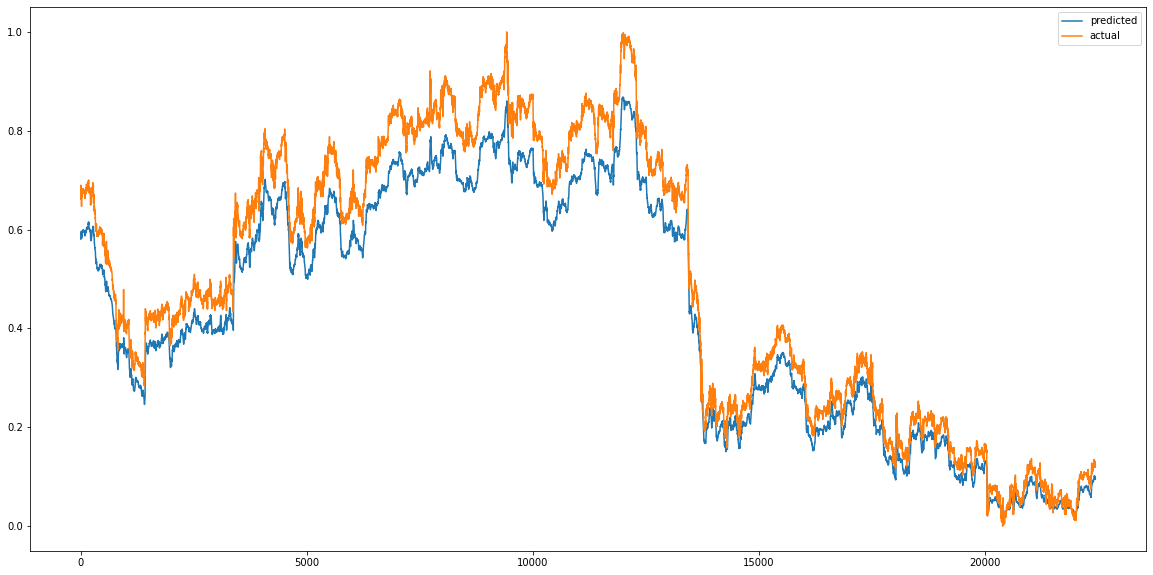

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


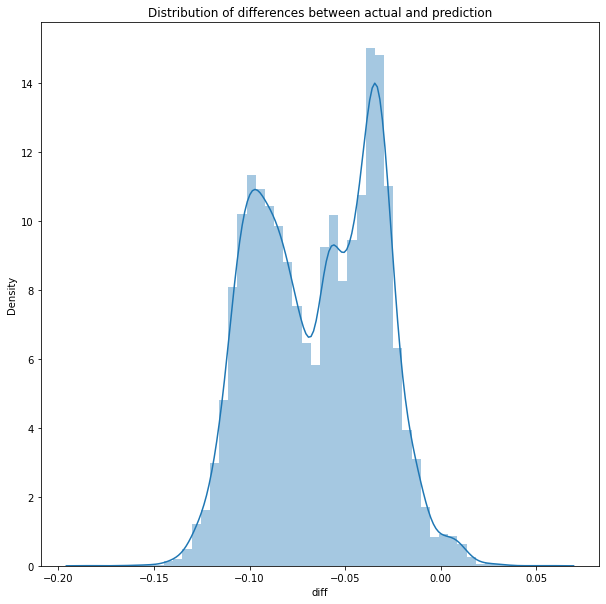

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.005112401165528416
MAE :  0.06430379999229084
RMSE  : 0.071501057093783
702/702 [==============================] - 26s 37ms/step
R2_Score  : 0.9344665824857918


count    22452.000000
mean        -0.064075
std          0.031731
min         -0.183023
25%         -0.091927
50%         -0.061349
75%         -0.036710
max          0.056660
Name: diff, dtype: float64

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 444.5855 - mae: 3.7876 - mse: 444.5855 - root_mean_squared_error: 21.0852 - mape: 4374.4702
Epoch 1: val_mse improved from inf to 0.03118, saving model to weights.best.hdf5
463/463 [==============================] - 239s 507ms/step - loss: 444.5855 - mae: 3.7876 - mse: 444.5855 - root_mean_squared_error: 21.0852 - mape: 4374.4702 - val_loss: 0.0312 - val_mae: 0.1360 - val_mse: 0.0312 - val_root_mean_squared_error: 0.1766 - val_mape: 17913.8438
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0174 - mae: 0.0997 - mse: 0.0174 - root_mean_squared_error: 0.1318 - mape: 1900.4430
Epoch 2: val_mse improved from 0.03118 to 0.00864, saving model to weights.best.hdf5
463/463 [==============================] - 237s 512ms/step - loss: 0.0174 - mae: 0.0997 - mse: 0.0174 - root_mean_squared_error: 0.1318 - mape: 1900.4430 - val_loss: 0.0086 - val_mae: 0.0783 - val_mse: 0.0086 - val_root_mean_squared_error: 

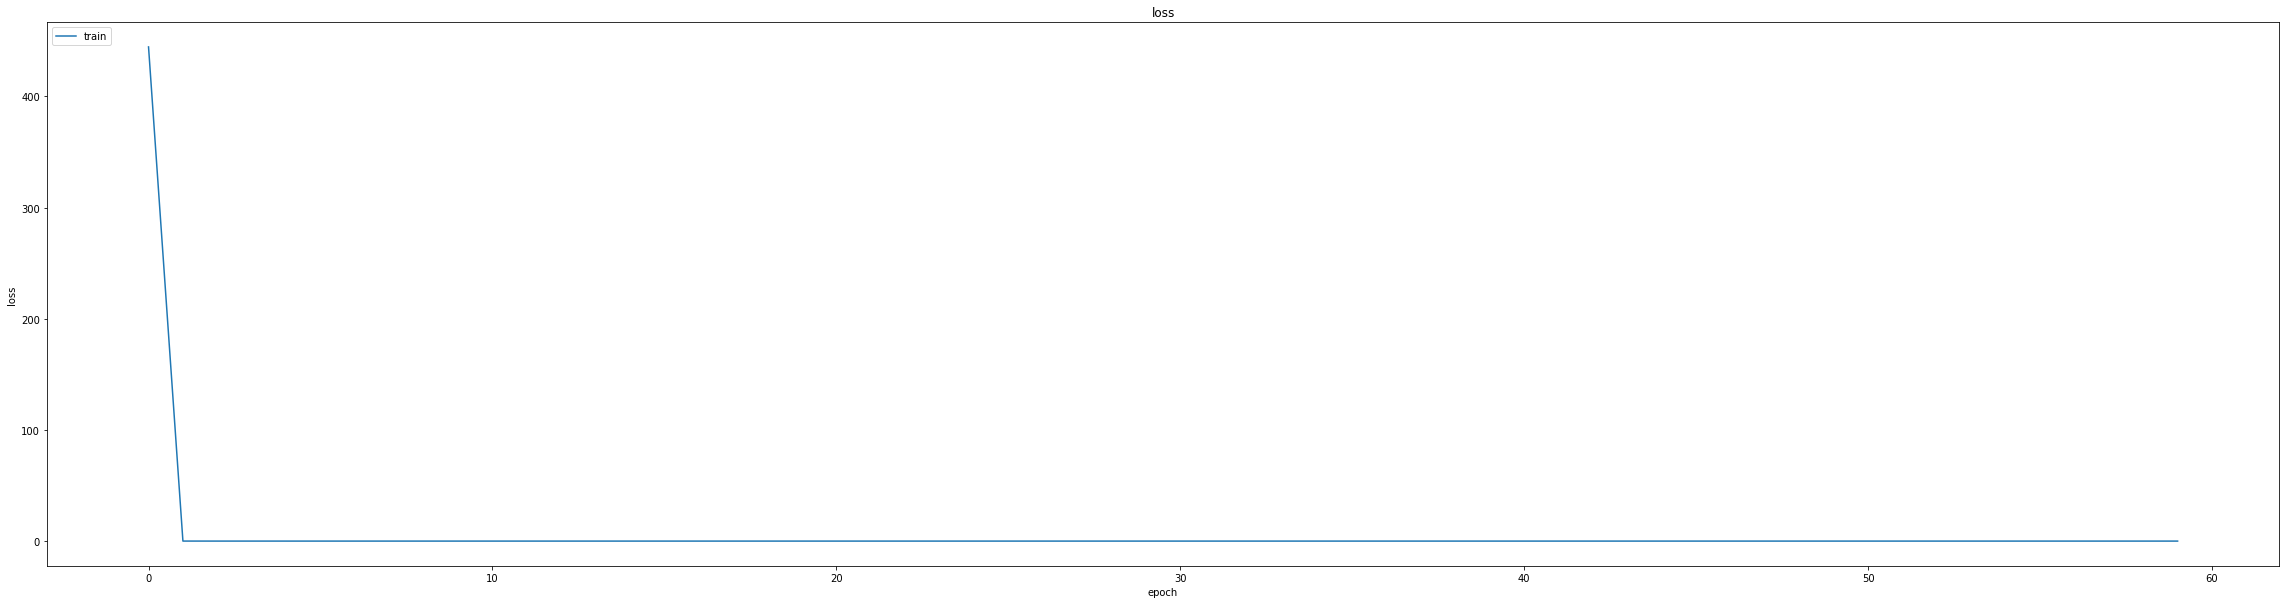

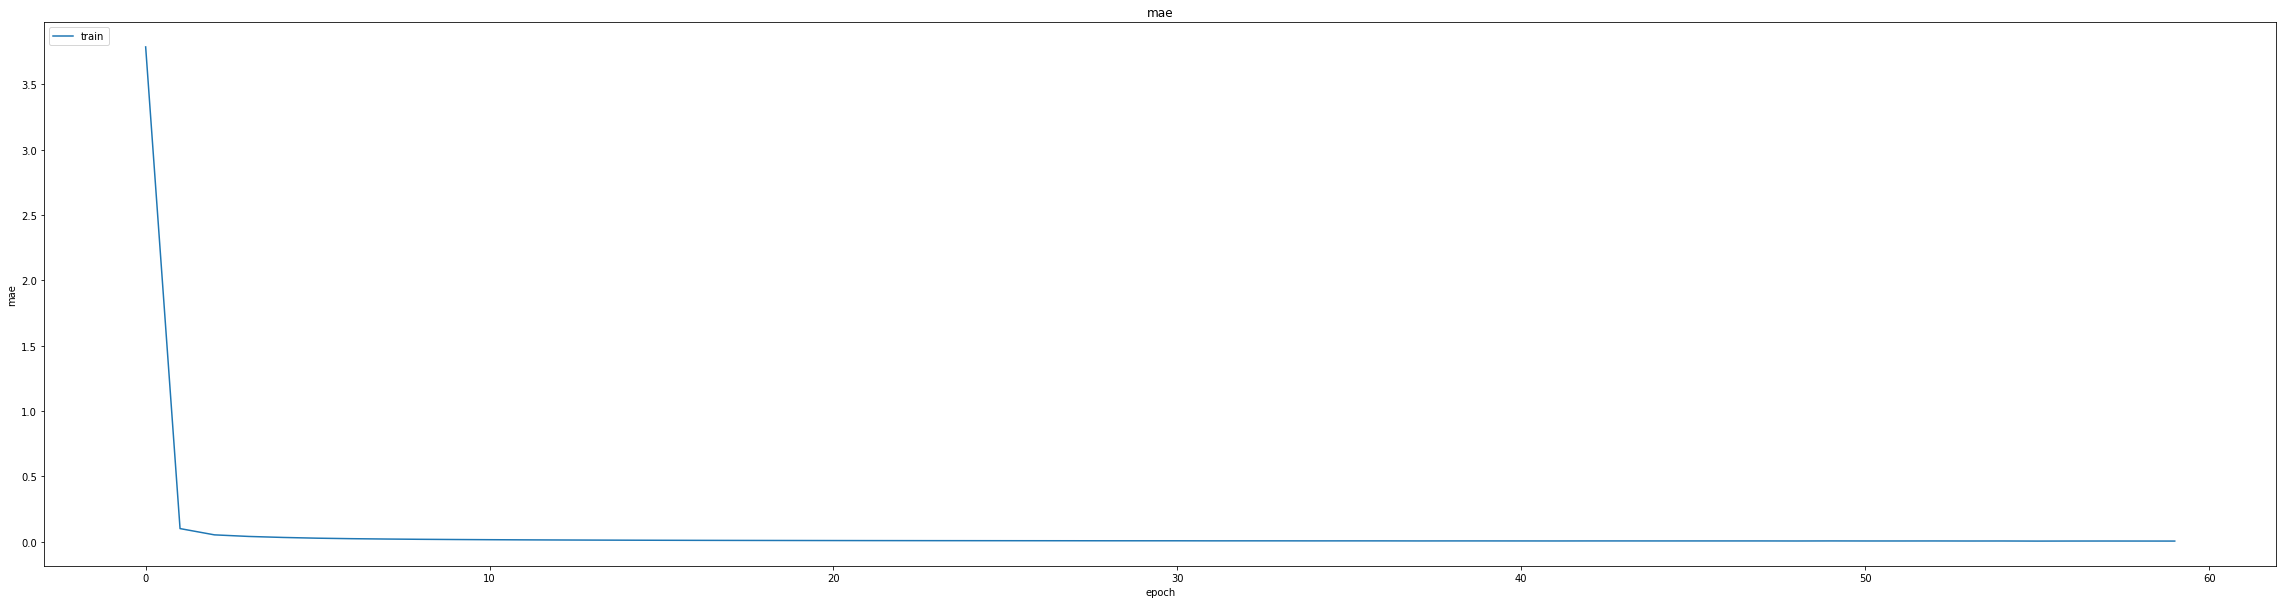

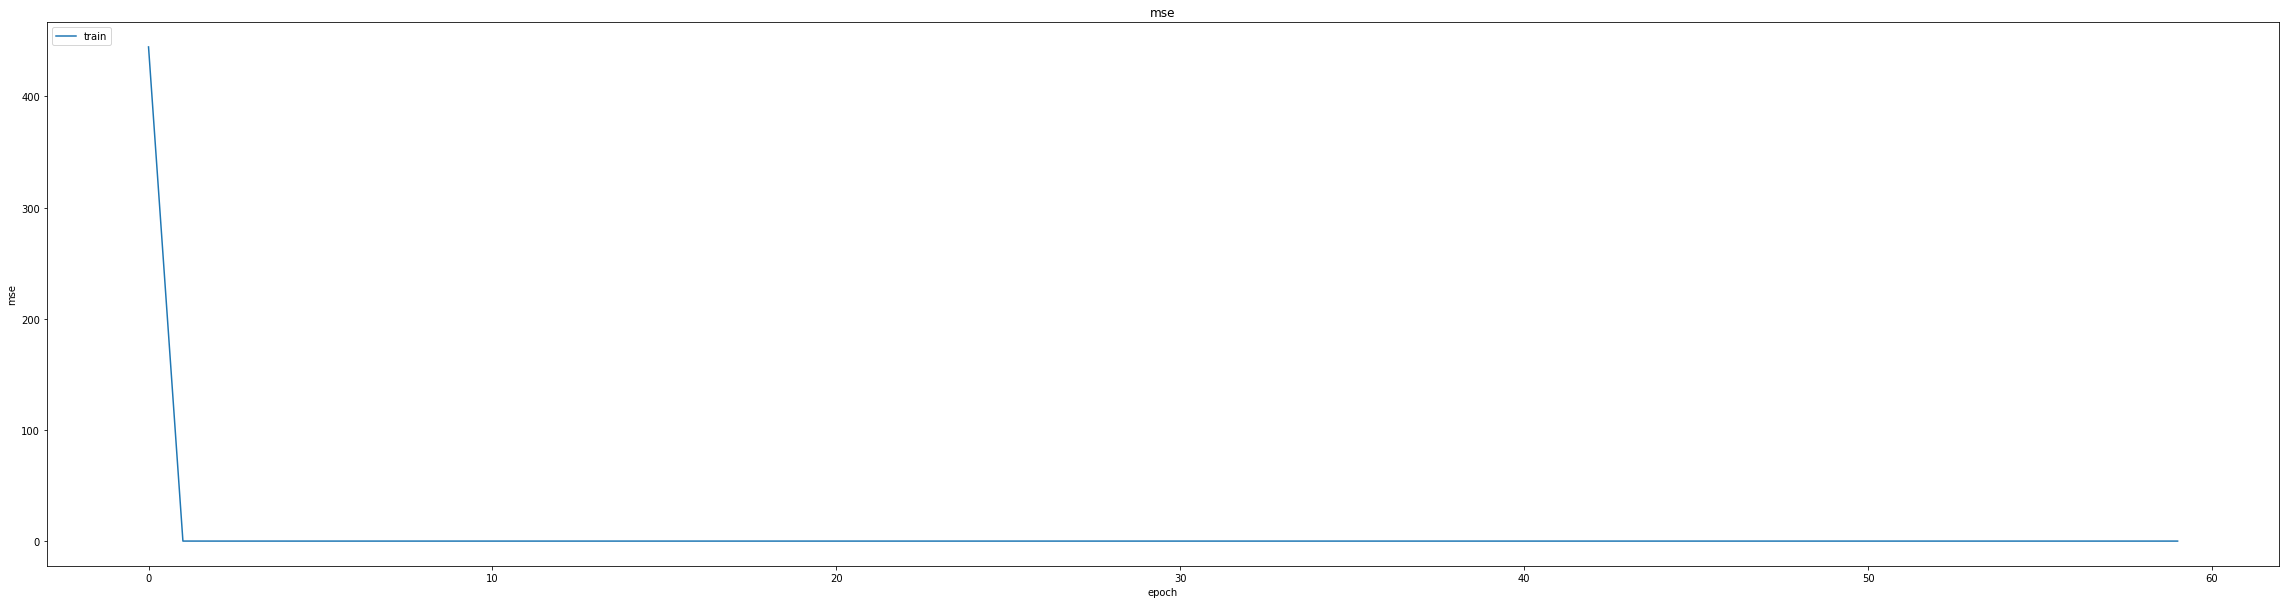

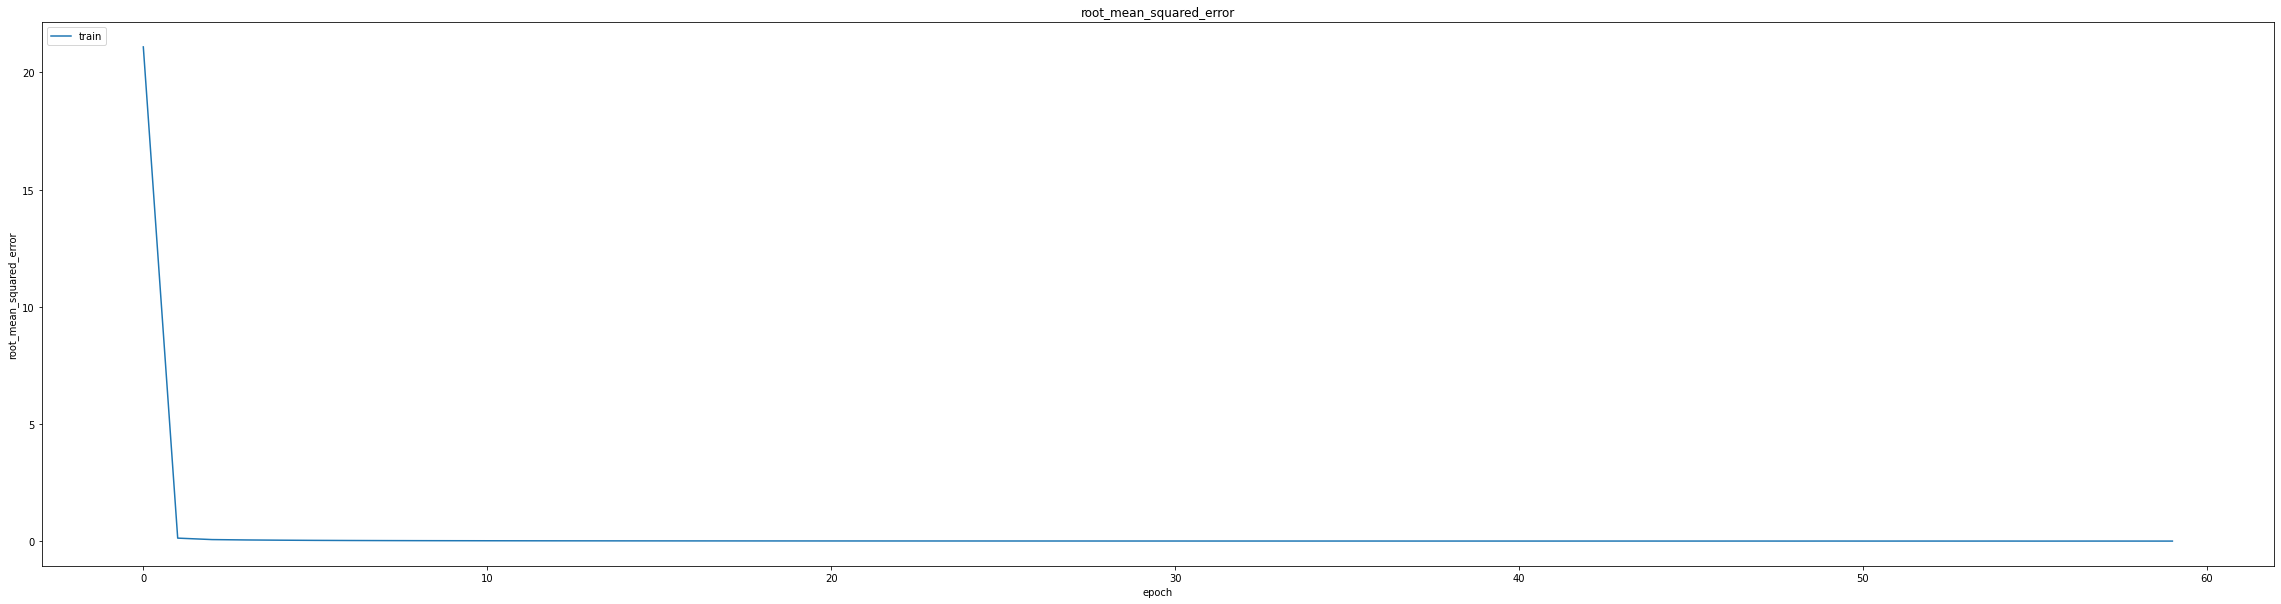

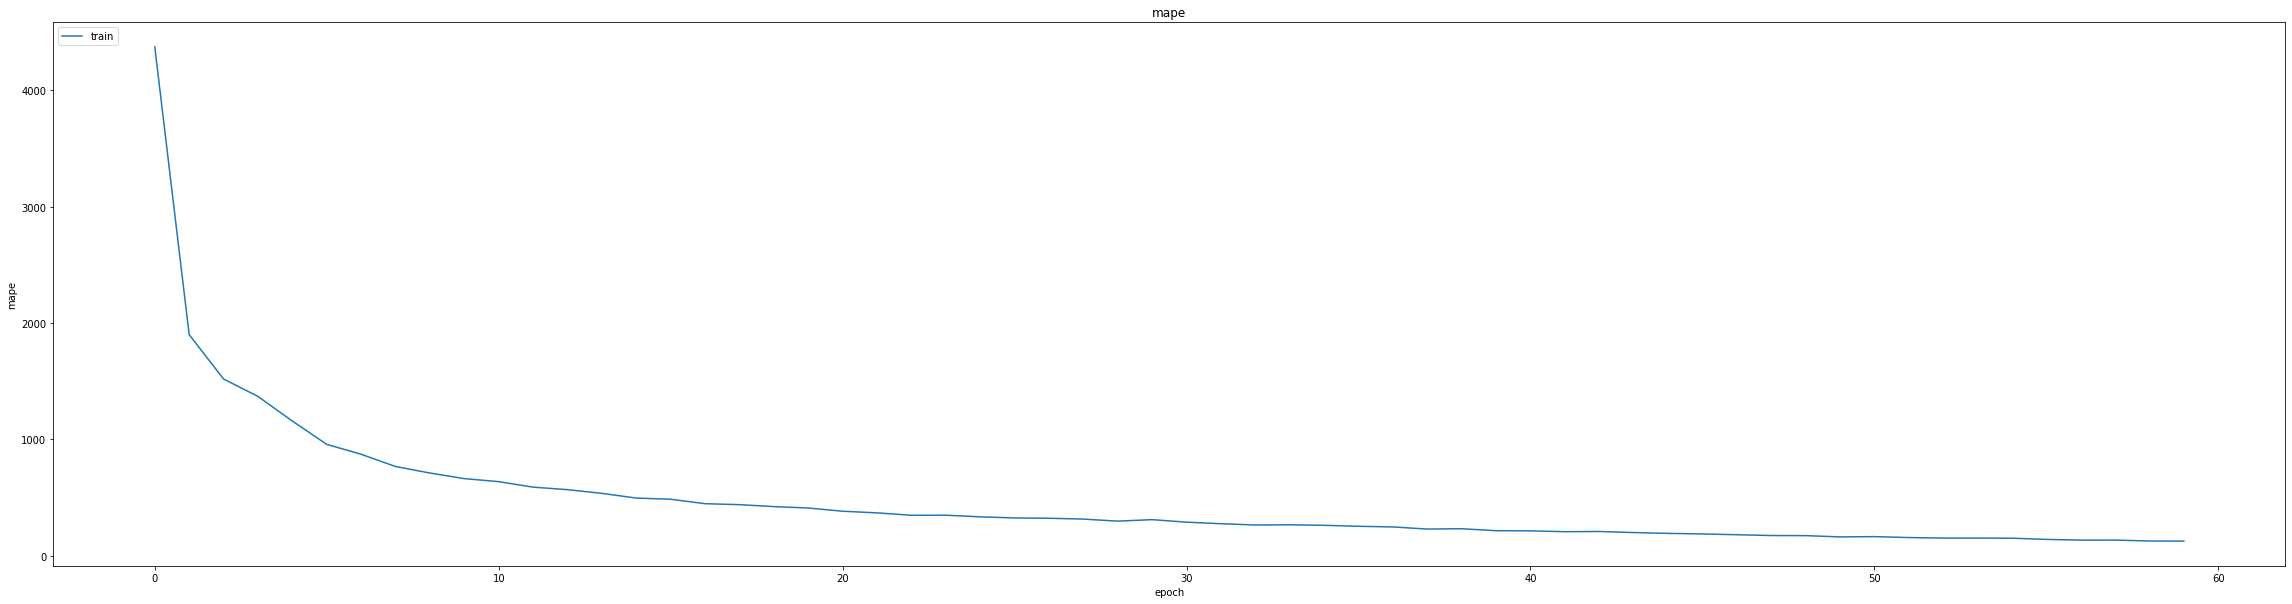

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007954076863825321
0.011641045100986958
687/687 [==============================] - 19s 26ms/step
0.9765307104472232


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
1390/1390 [==============================] - ETA: 0s - loss: 1.4959e-04 - mae: 0.0054 - mse: 1.4959e-04 - root_mean_squared_error: 0.0122 - mape: 127.4691
Epoch 1: val_mse did not improve from 0.00014
1390/1390 [==============================] - 295s 209ms/step - loss: 1.4959e-04 - mae: 0.0054 - mse: 1.4959e-04 - root_mean_squared_error: 0.0122 - mape: 127.4691 - val_loss: 4.2996e-04 - val_mae: 0.0180 - val_mse: 4.2996e-04 - val_root_mean_squared_error: 0.0207 - val_mape: 1249.0199 - lr: 0.0010
Epoch 2/20
1390/1390 [==============================] - ETA: 0s - loss: 3.7199e-05 - mae: 0.0046 - mse: 3.7199e-05 - root_mean_squared_error: 0.0061 - mape: 124.8263
Epoch 2: val_mse did not improve from 0.00014
1390/1390 [==============================] - 289s 208ms/step - loss: 3.7199e-05 - mae: 0.0046 - mse: 3.7199e-05 - root_mean_squared_error: 0.0061 - mape: 124.8263 - val_loss: 2.9332e-04 - val_mae: 0.0145 - val_mse: 2.9332e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 1

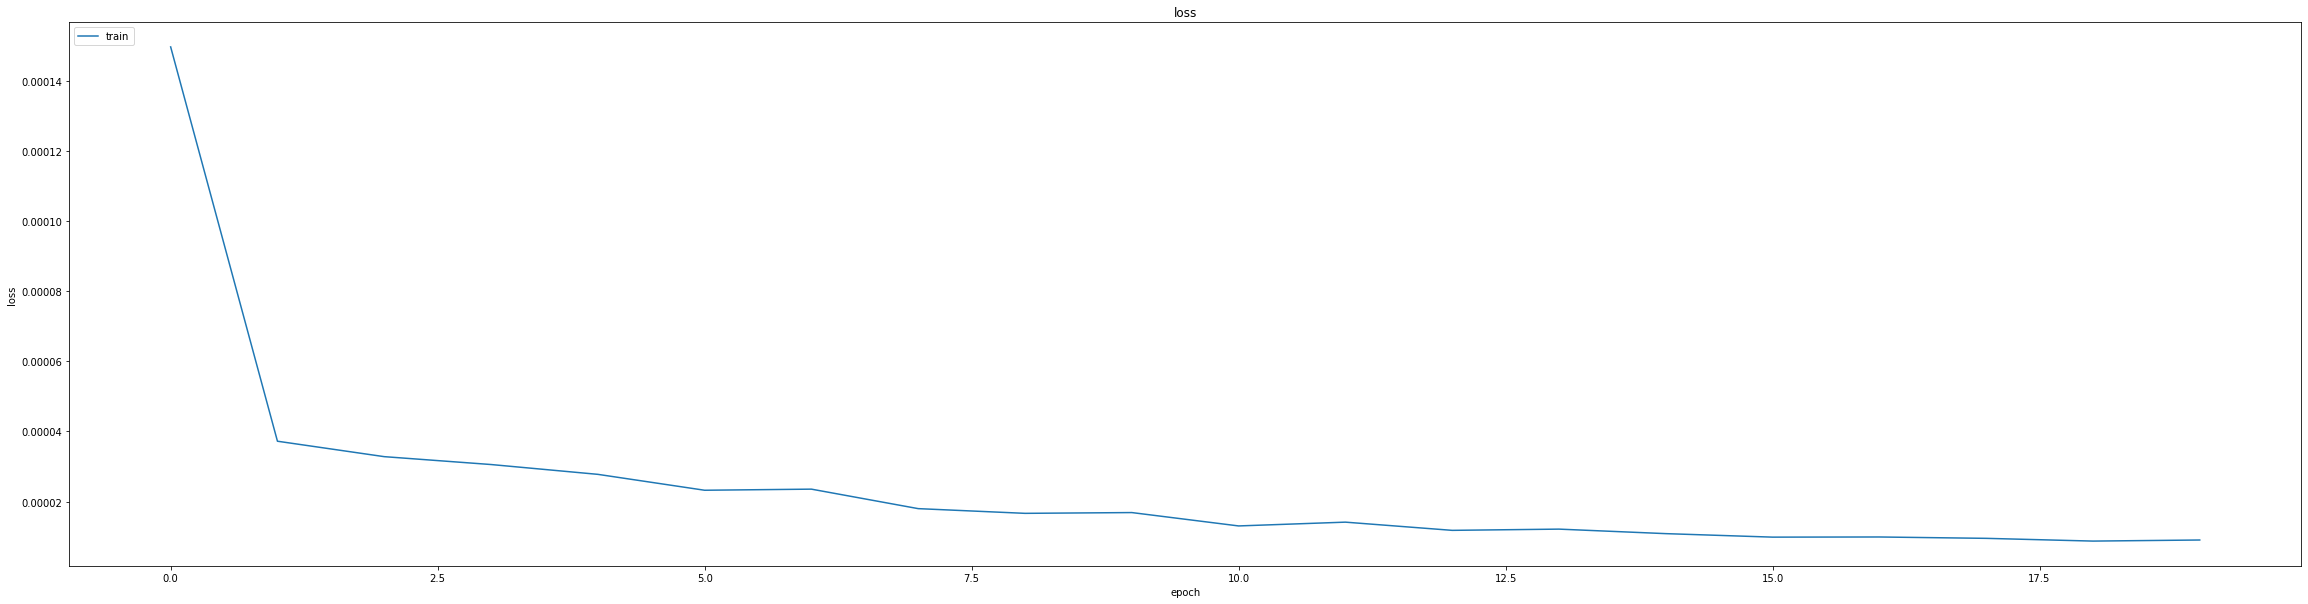

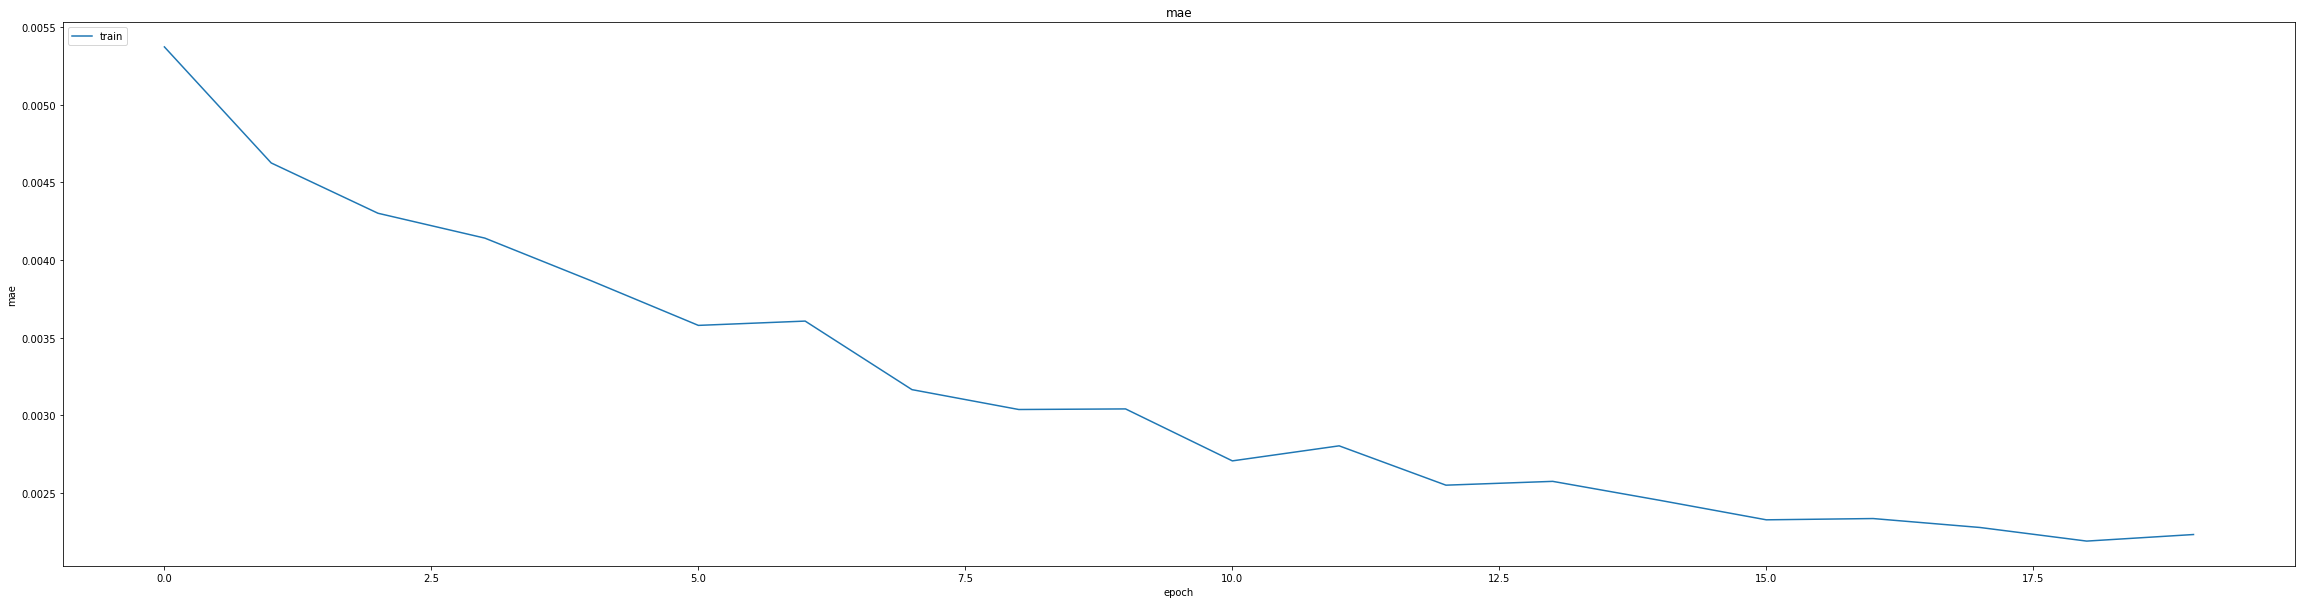

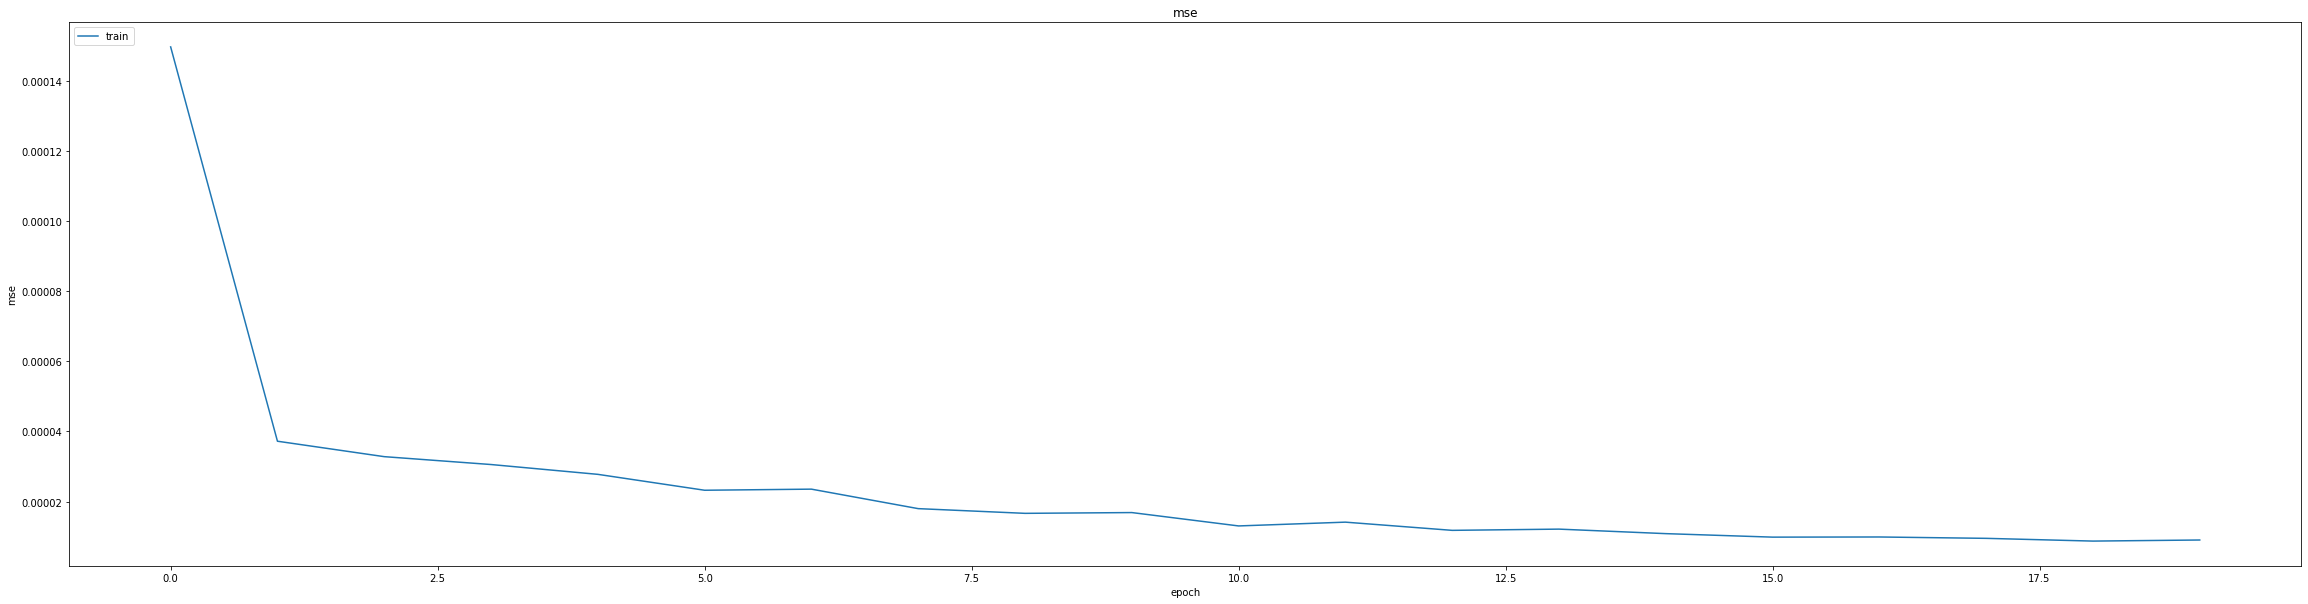

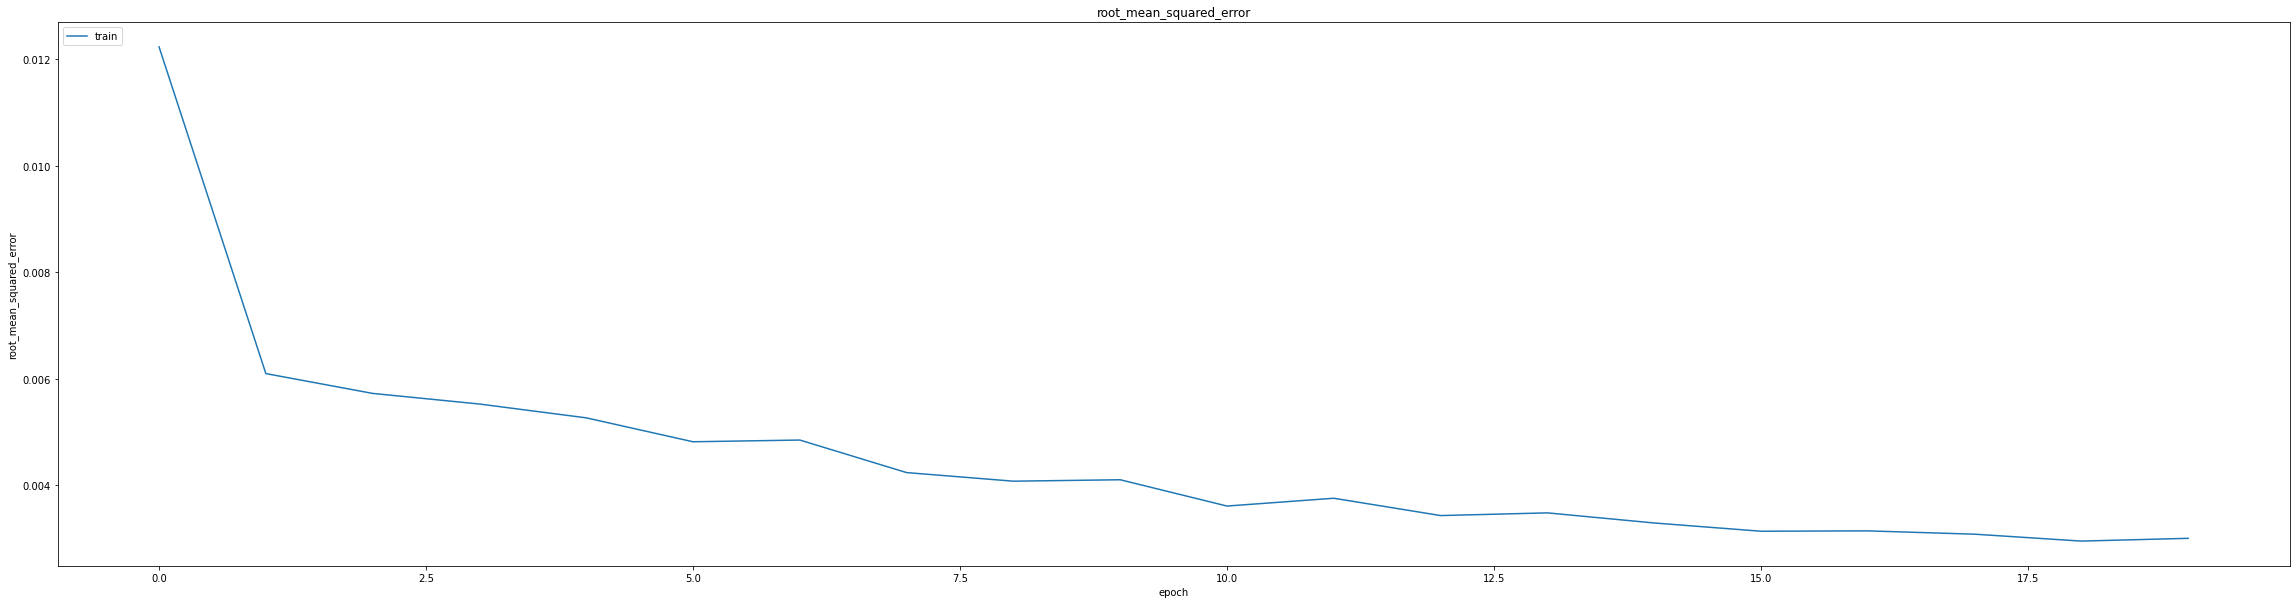

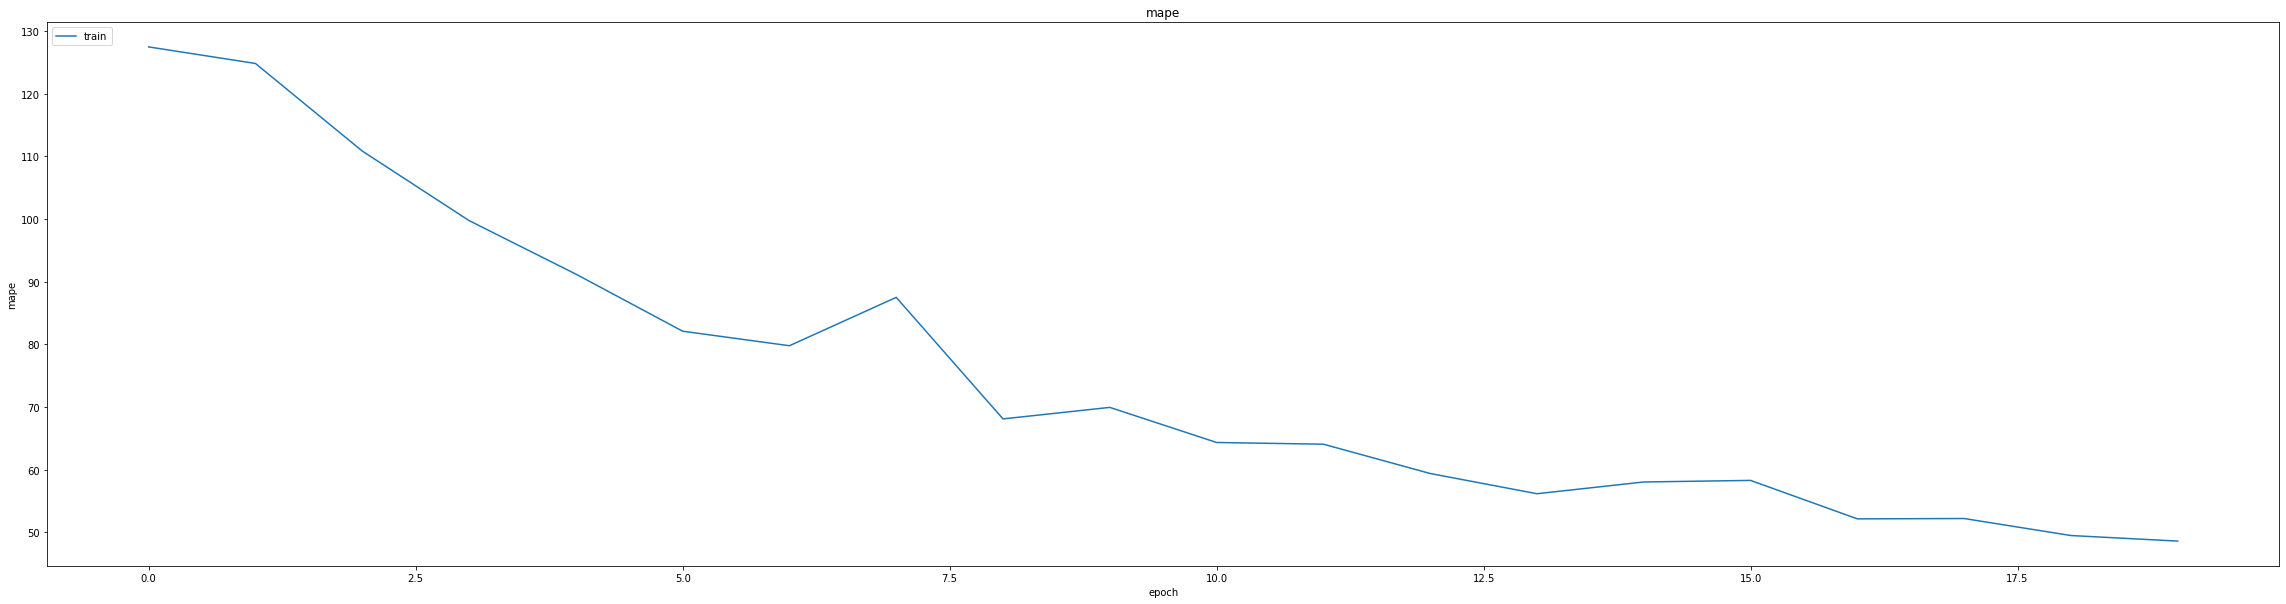

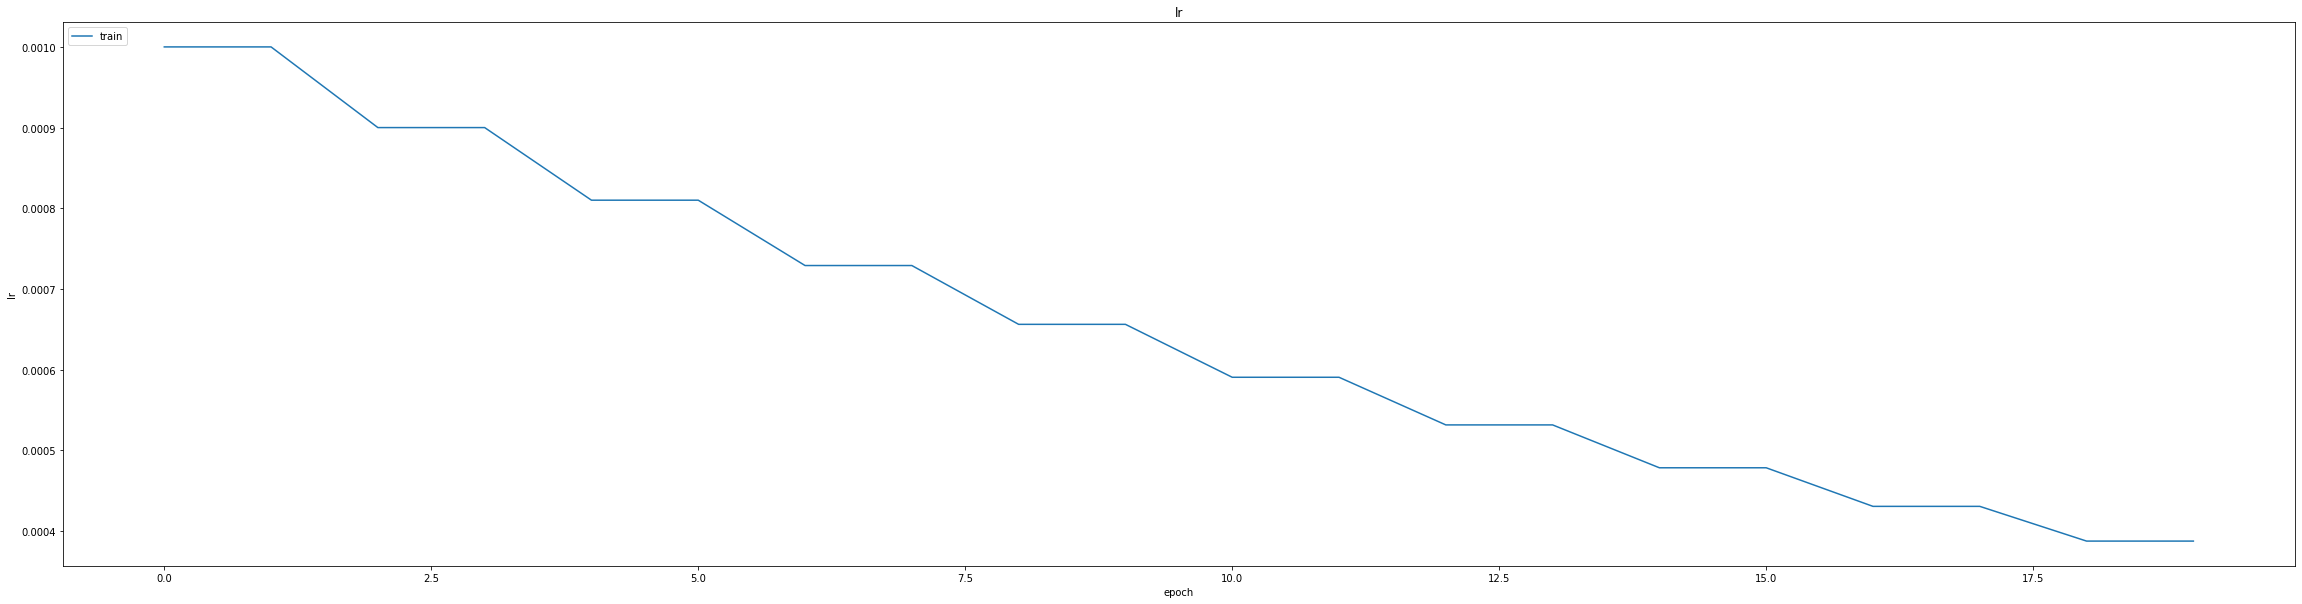

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014526926912367344
0.017010675743222237
687/687 [==============================] - 20s 27ms/step
0.9875523252691685


687/687 [==============================] - 18s 27ms/step


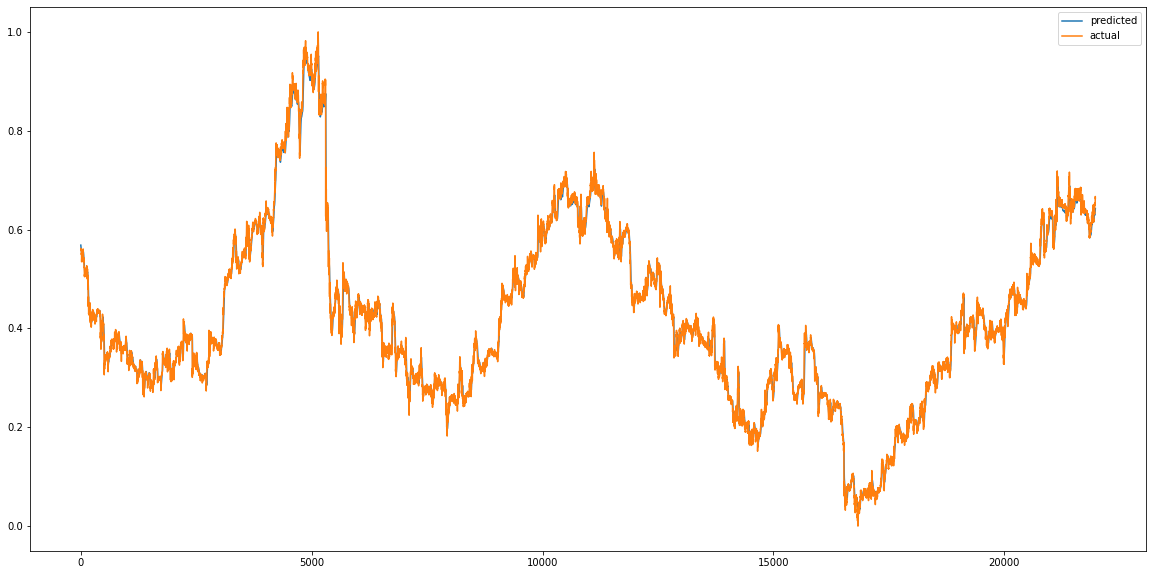

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


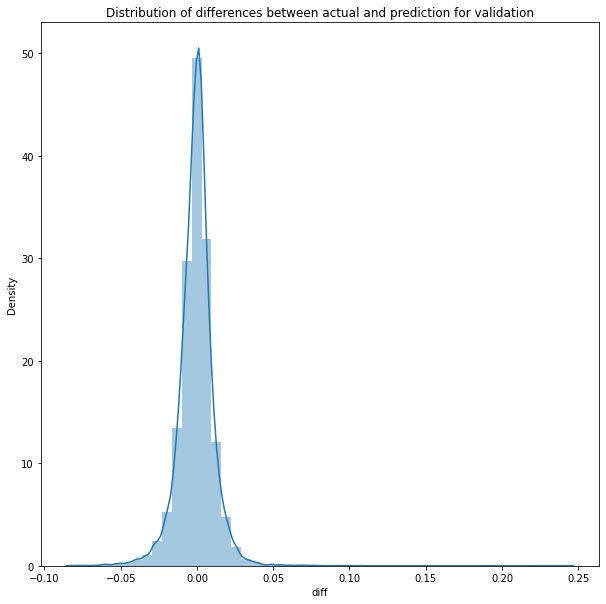

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

702/702 [==============================] - 21s 30ms/step


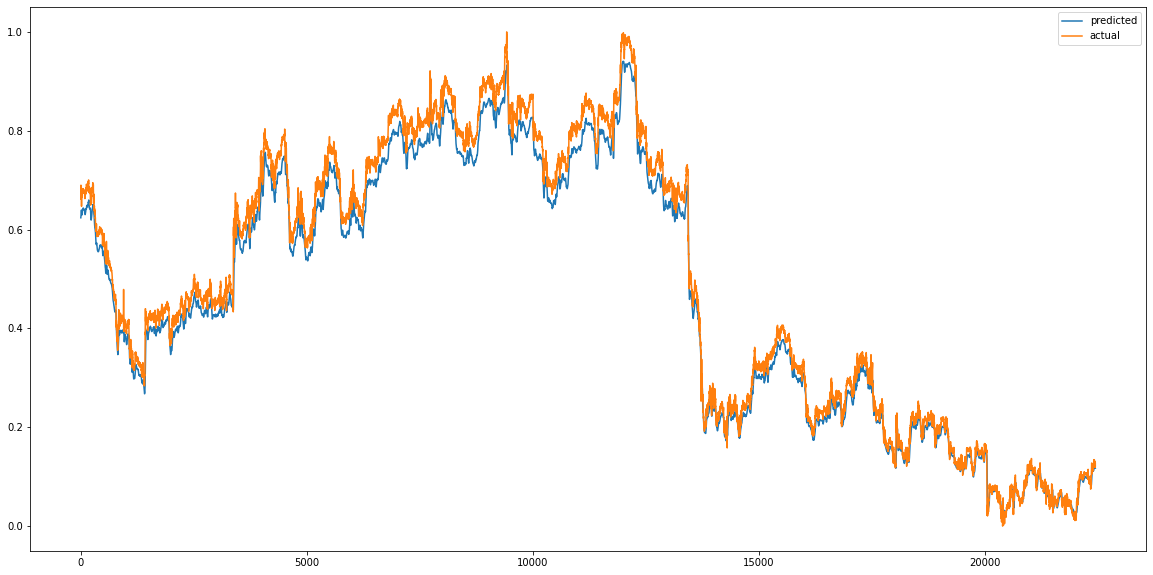

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


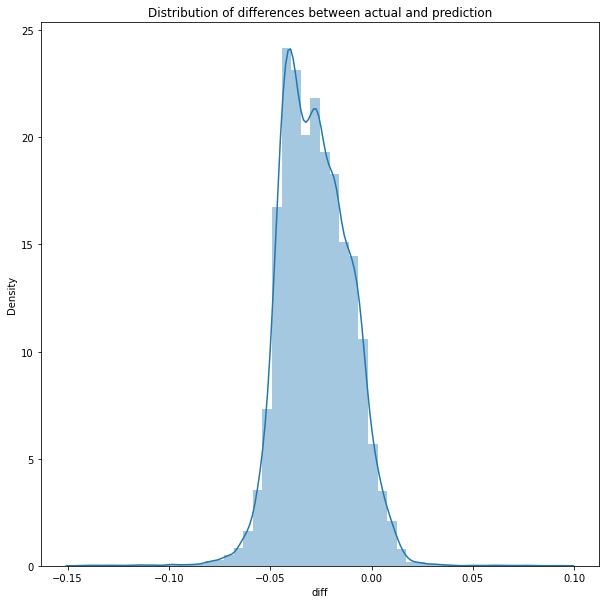

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0010510259551884103
MAE :  0.02842819295950007
RMSE  : 0.03241953045909842
702/702 [==============================] - 19s 27ms/step
R2_Score  : 0.9865274025734182


count    22452.000000
mean        -0.027711
std          0.016827
min         -0.143793
25%         -0.040165
50%         -0.028669
75%         -0.015955
max          0.092904
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 246.9413 - mae: 1.9414 - mse: 246.9413 - root_mean_squared_error: 15.7144 - mape: 2619.4995
Epoch 1: val_mse improved from inf to 0.02891, saving model to weights.best.hdf5
463/463 [==============================] - 280s 595ms/step - loss: 246.9413 - mae: 1.9414 - mse: 246.9413 - root_mean_squared_error: 15.7144 - mape: 2619.4995 - val_loss: 0.0289 - val_mae: 0.1268 - val_mse: 0.0289 - val_root_mean_squared_error: 0.1700 - val_mape: 13473.7354
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 1.0054 - mae: 0.1320 - mse: 1.0054 - root_mean_squared_error: 1.0027 - mape: 1997.2700
Epoch 2: val_mse improved from 0.02891 to 0.02082, saving model to weights.best.hdf5
463/463 [==============================] - 276s 596ms/step - loss: 1.0054 - mae: 0.1320 - mse: 1.0054 - root_mean_squared_error: 1.0027 - mape: 1997.2700 - val_loss: 0.0208 - val_mae: 0.1131 - val_mse: 0.0208 - val_root_mean_squared_error: 

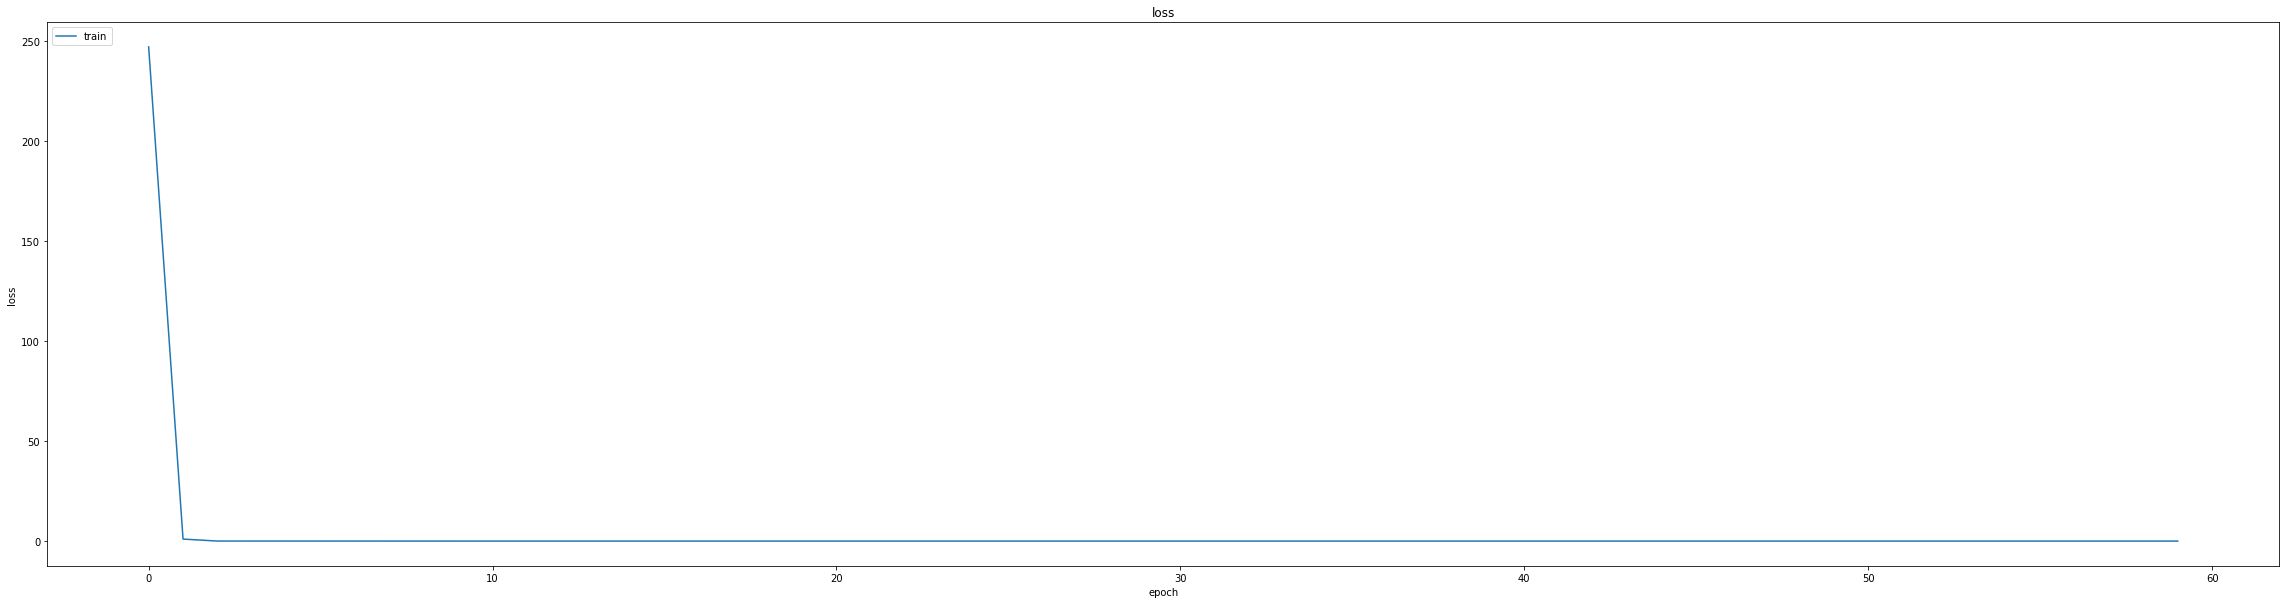

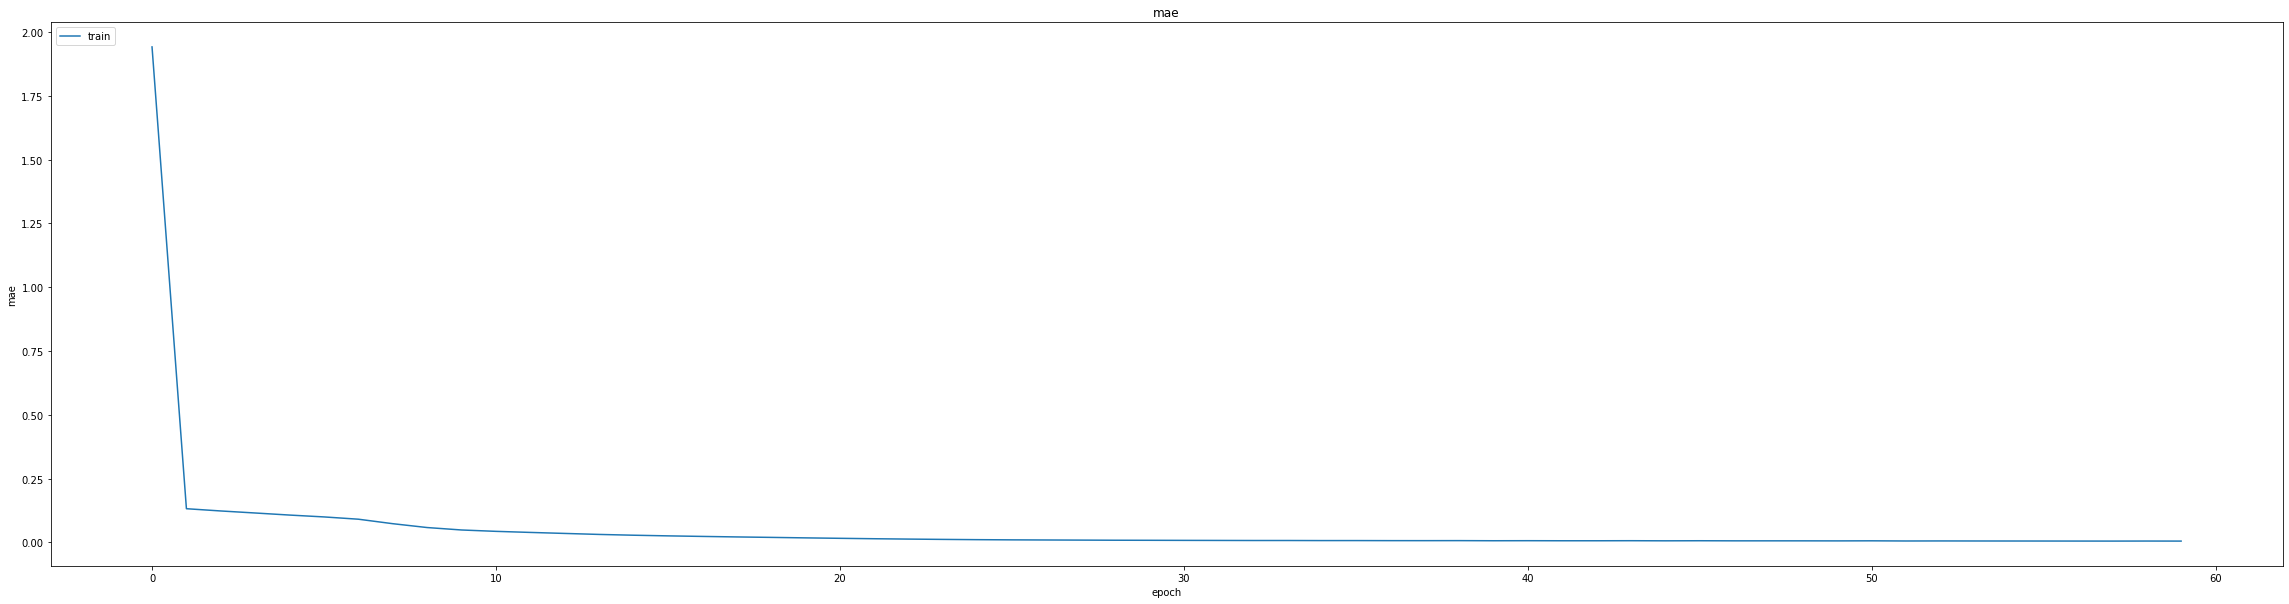

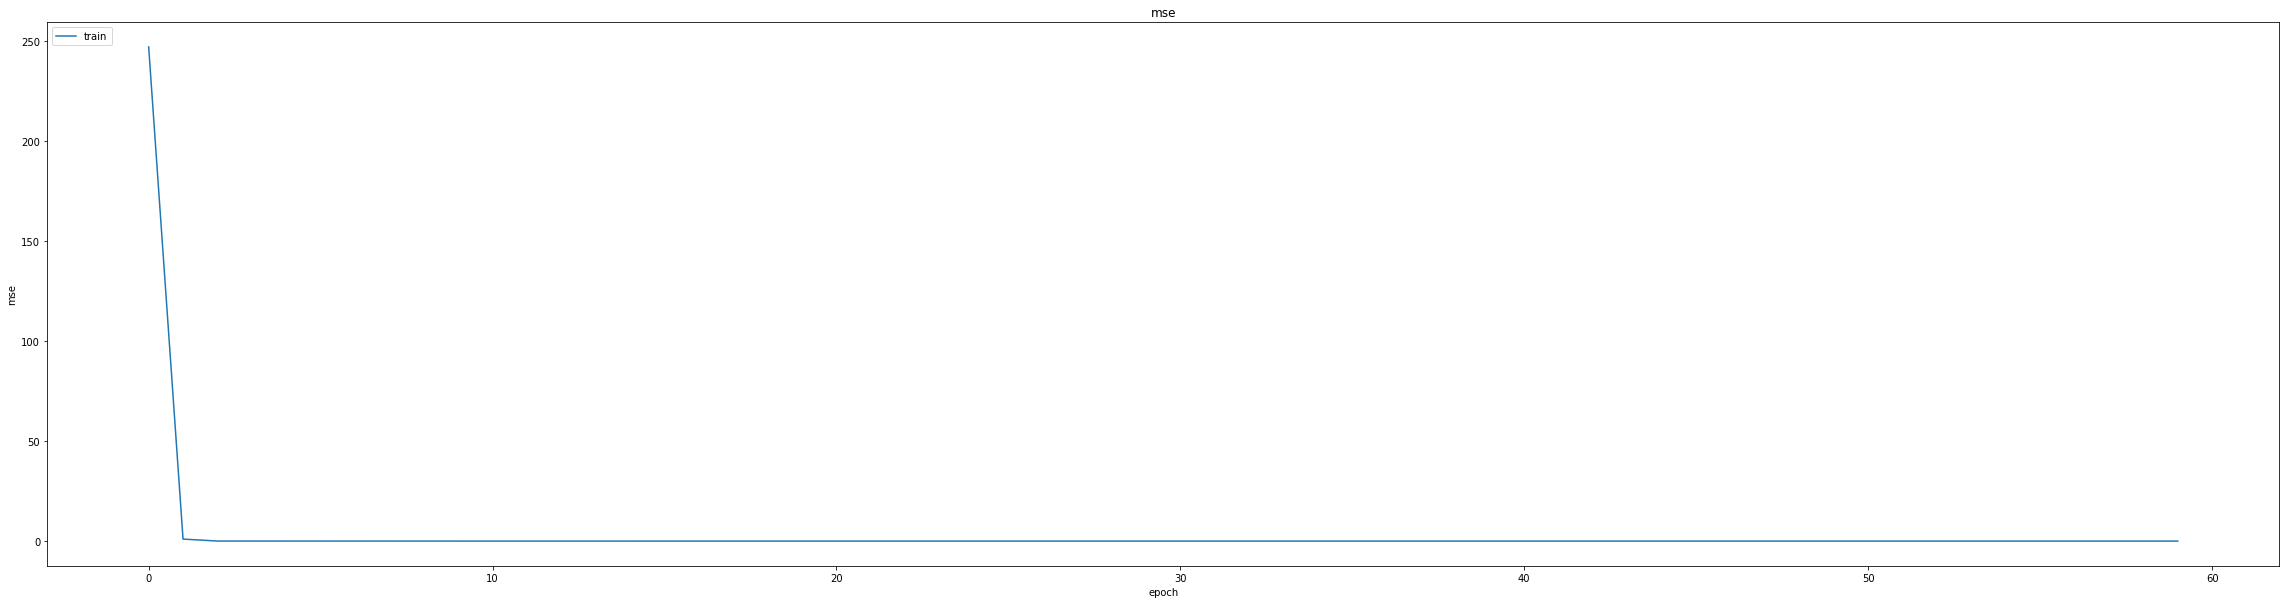

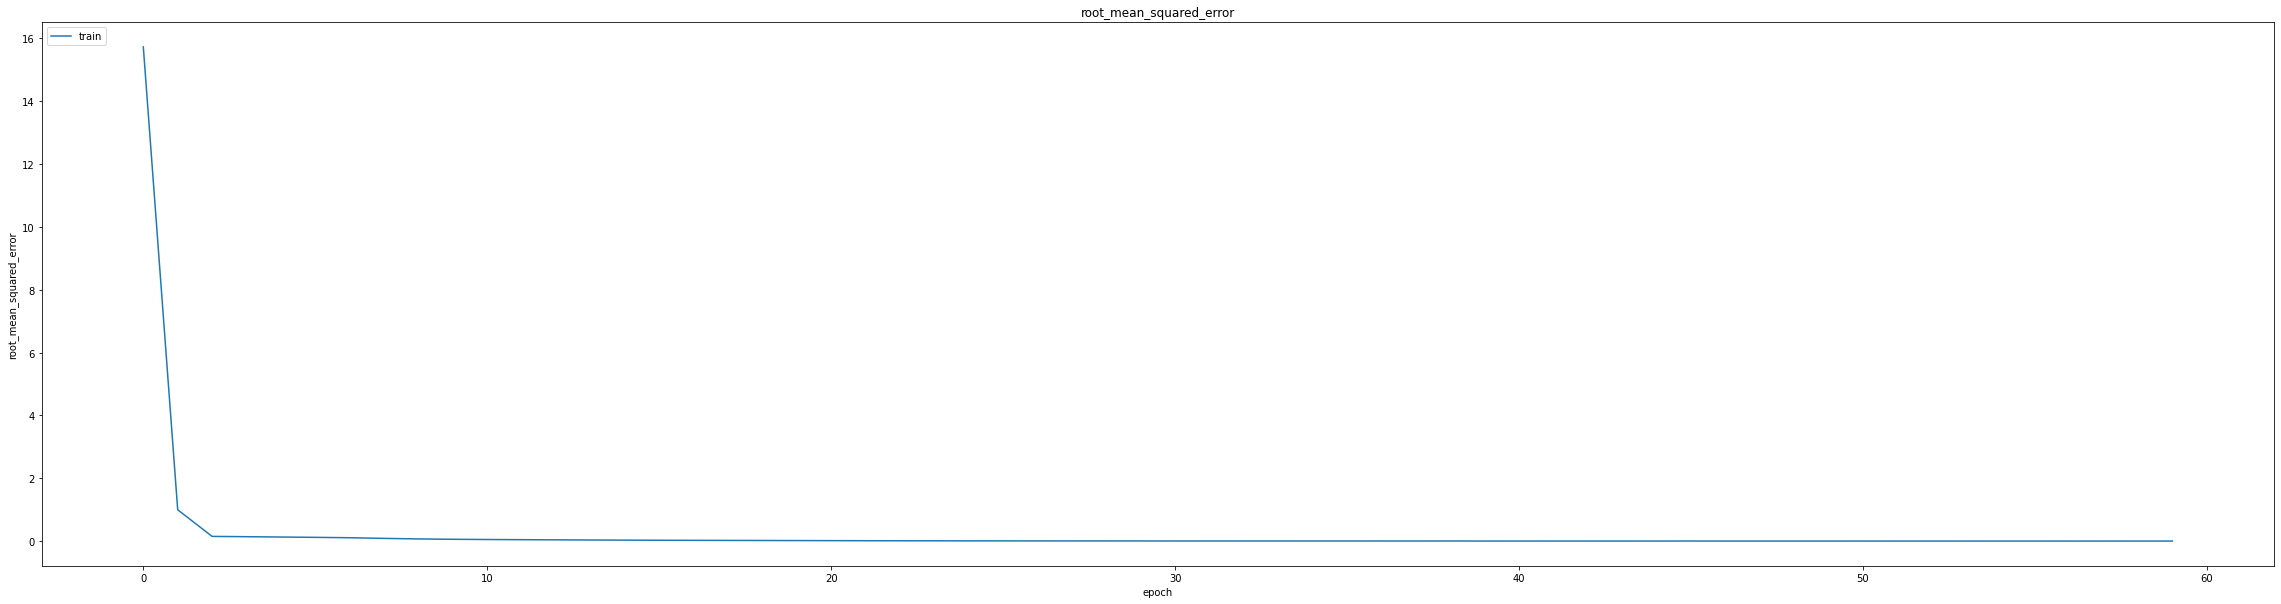

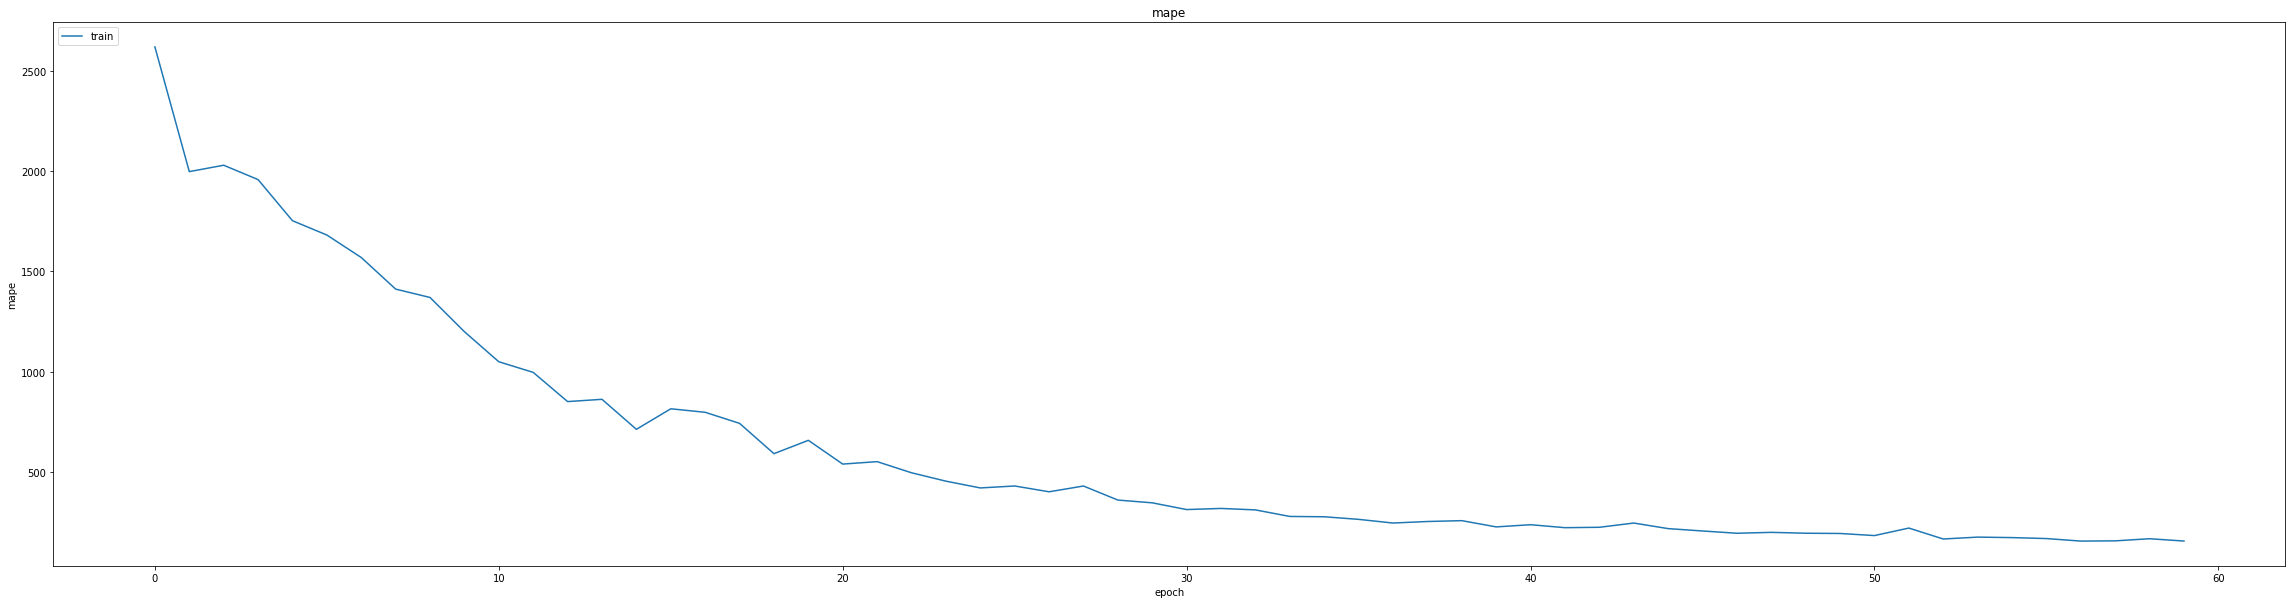

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.00855281762778759
0.00855281762778759
0.012213384732604027
687/687 [==============================] - 29s 35ms/step
0.9935716656502238


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 8.3450e-04 - mae: 0.0114 - mse: 8.3450e-04 - root_mean_squared_error: 0.0289 - mape: 414.2672
Epoch 1: val_mse did not improve from 0.00015
463/463 [==============================] - 285s 608ms/step - loss: 8.3450e-04 - mae: 0.0114 - mse: 8.3450e-04 - root_mean_squared_error: 0.0289 - mape: 414.2672 - val_loss: 2.5429e-04 - val_mae: 0.0128 - val_mse: 2.5429e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 1569.4418 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 3.9161e-05 - mae: 0.0048 - mse: 3.9161e-05 - root_mean_squared_error: 0.0063 - mape: 176.3634
Epoch 2: val_mse did not improve from 0.00015
463/463 [==============================] - 276s 597ms/step - loss: 3.9161e-05 - mae: 0.0048 - mse: 3.9161e-05 - root_mean_squared_error: 0.0063 - mape: 176.3634 - val_loss: 3.0806e-04 - val_mae: 0.0146 - val_mse: 3.0806e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 2051.2585

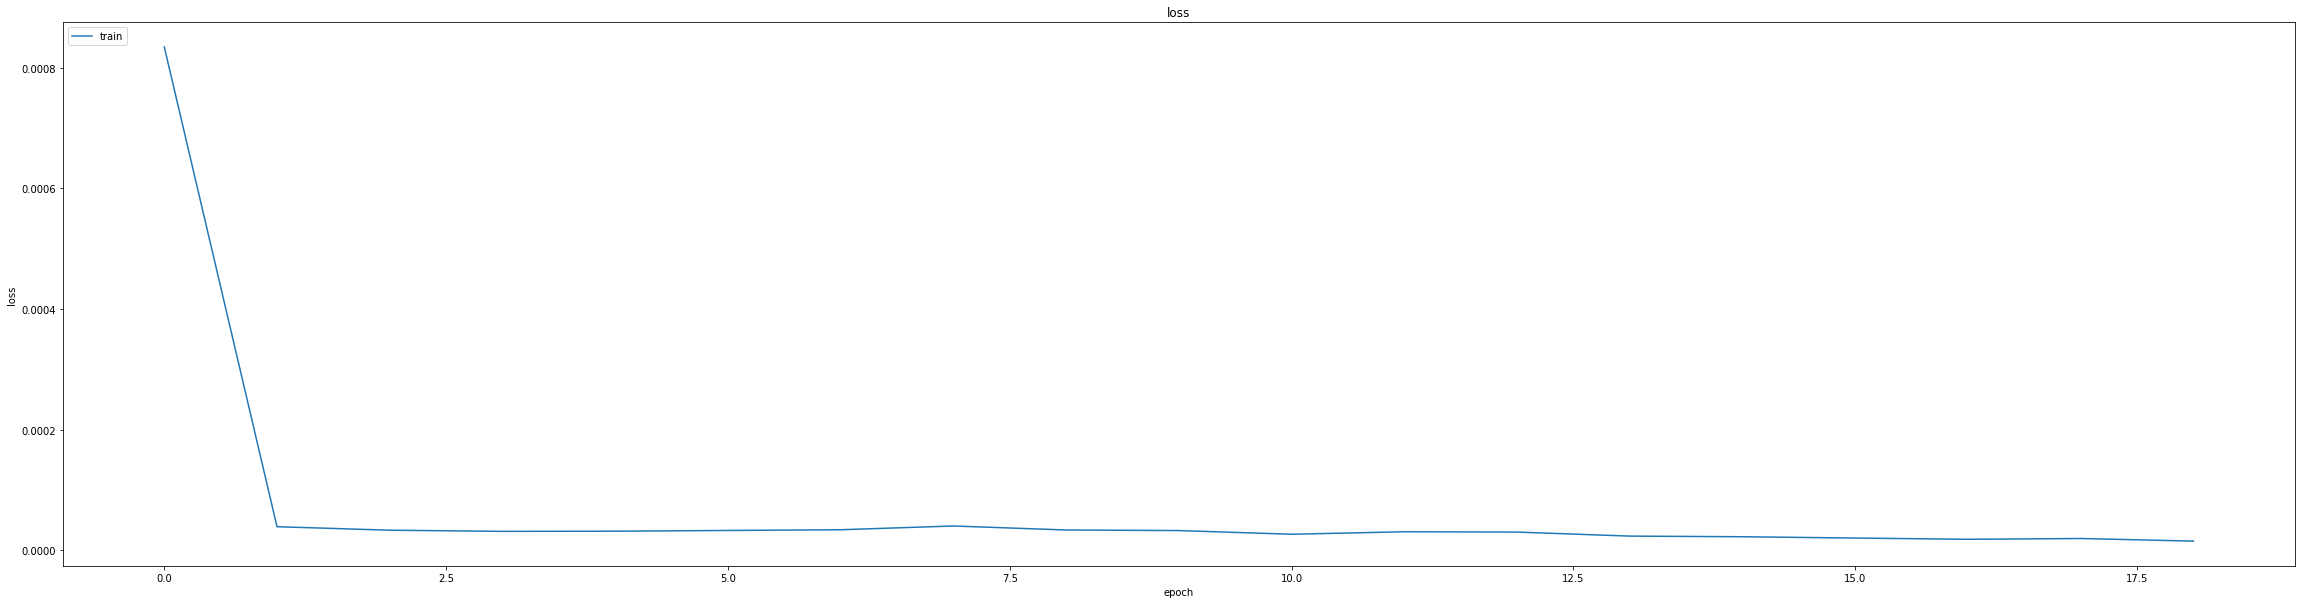

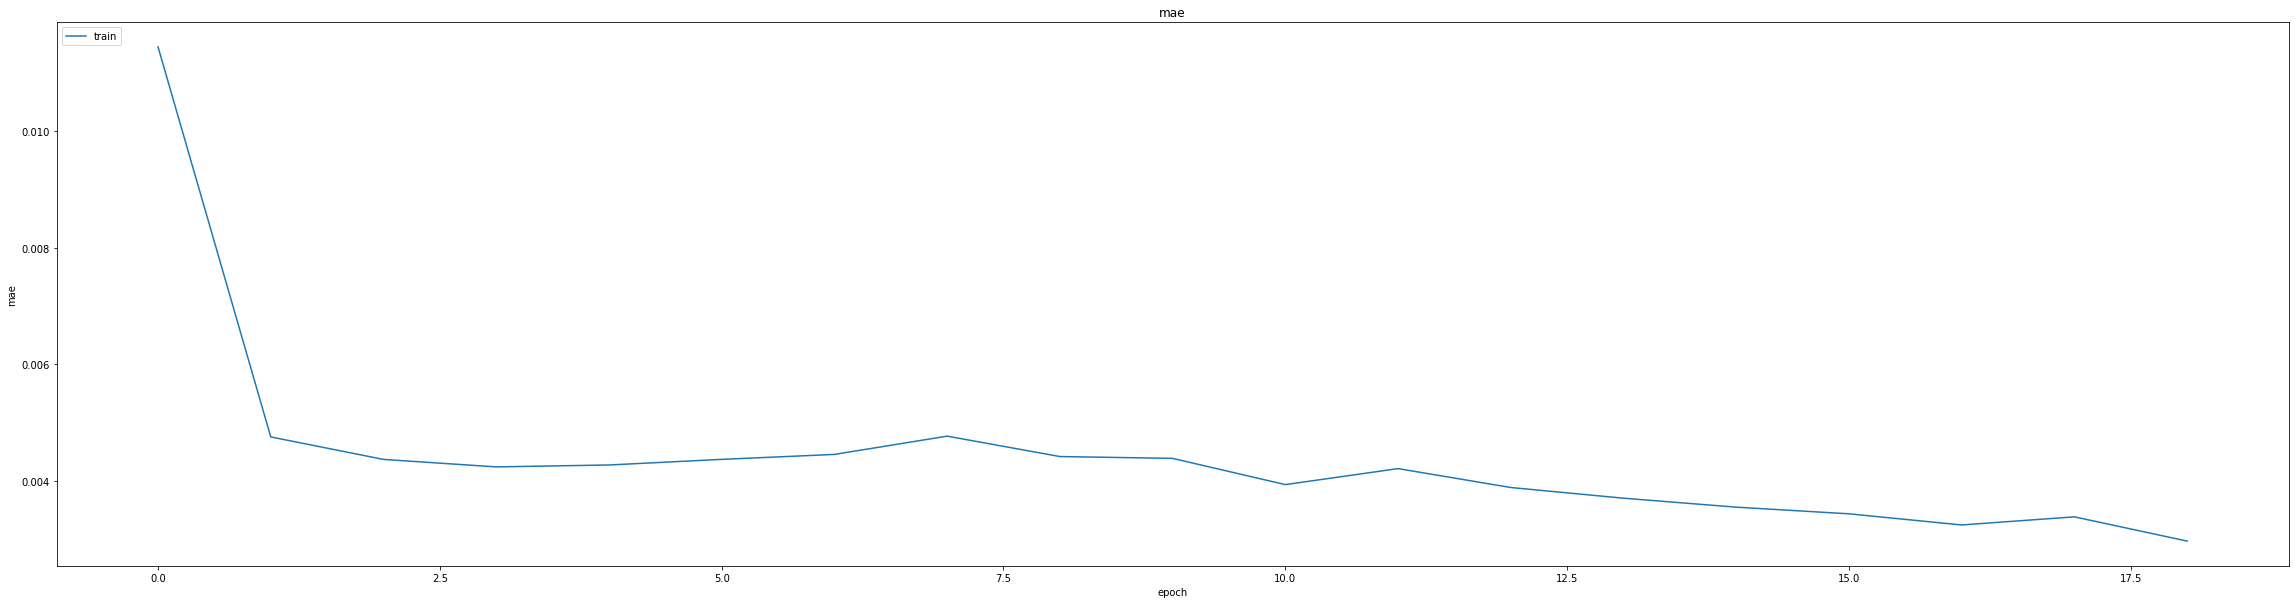

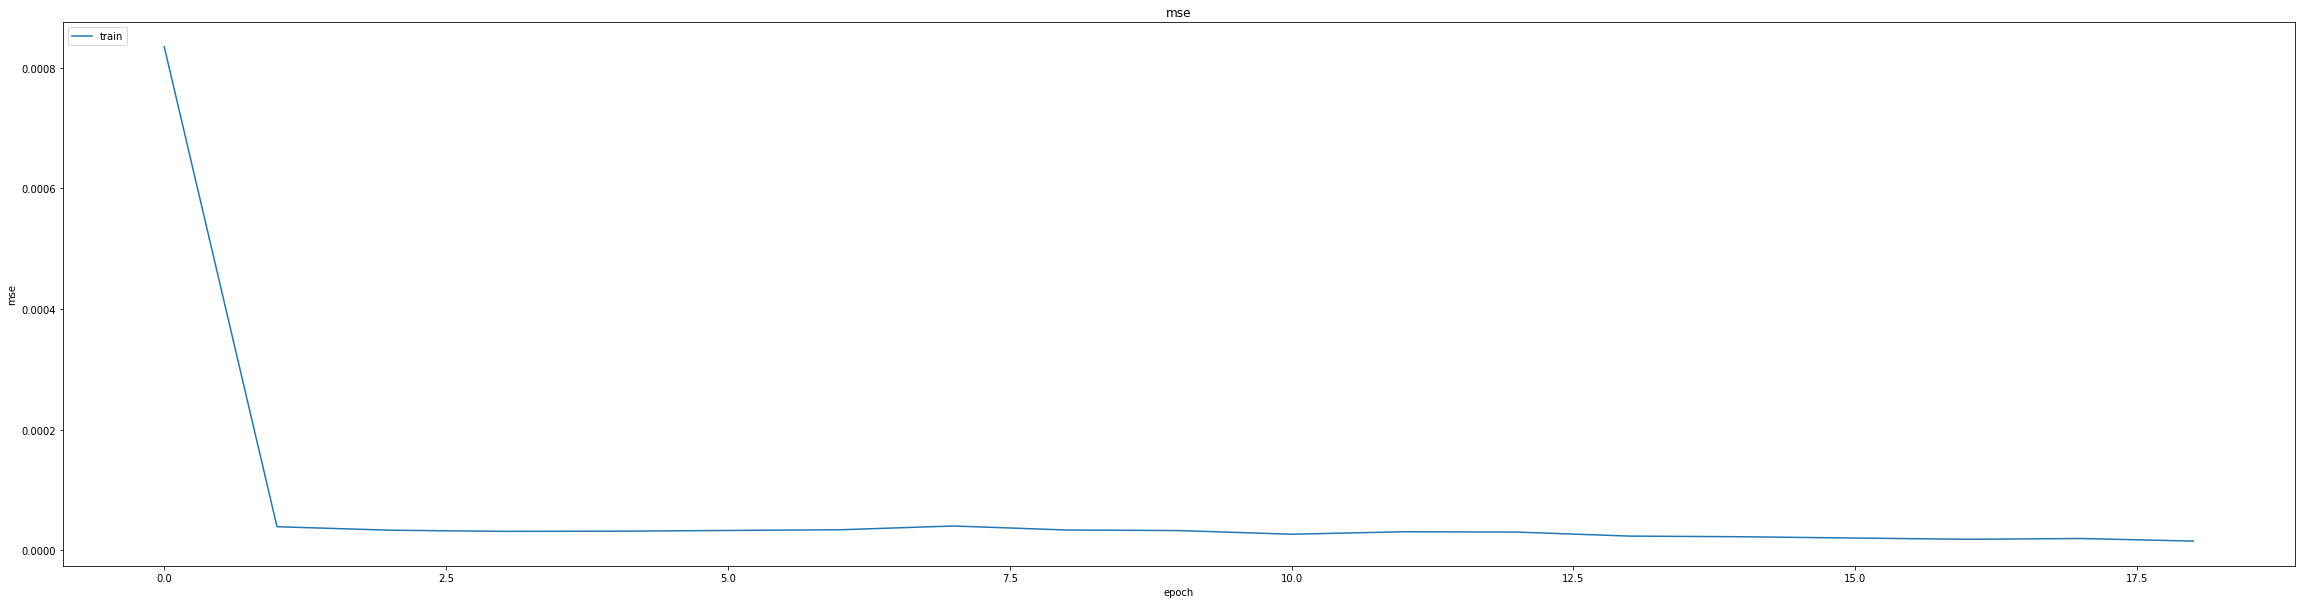

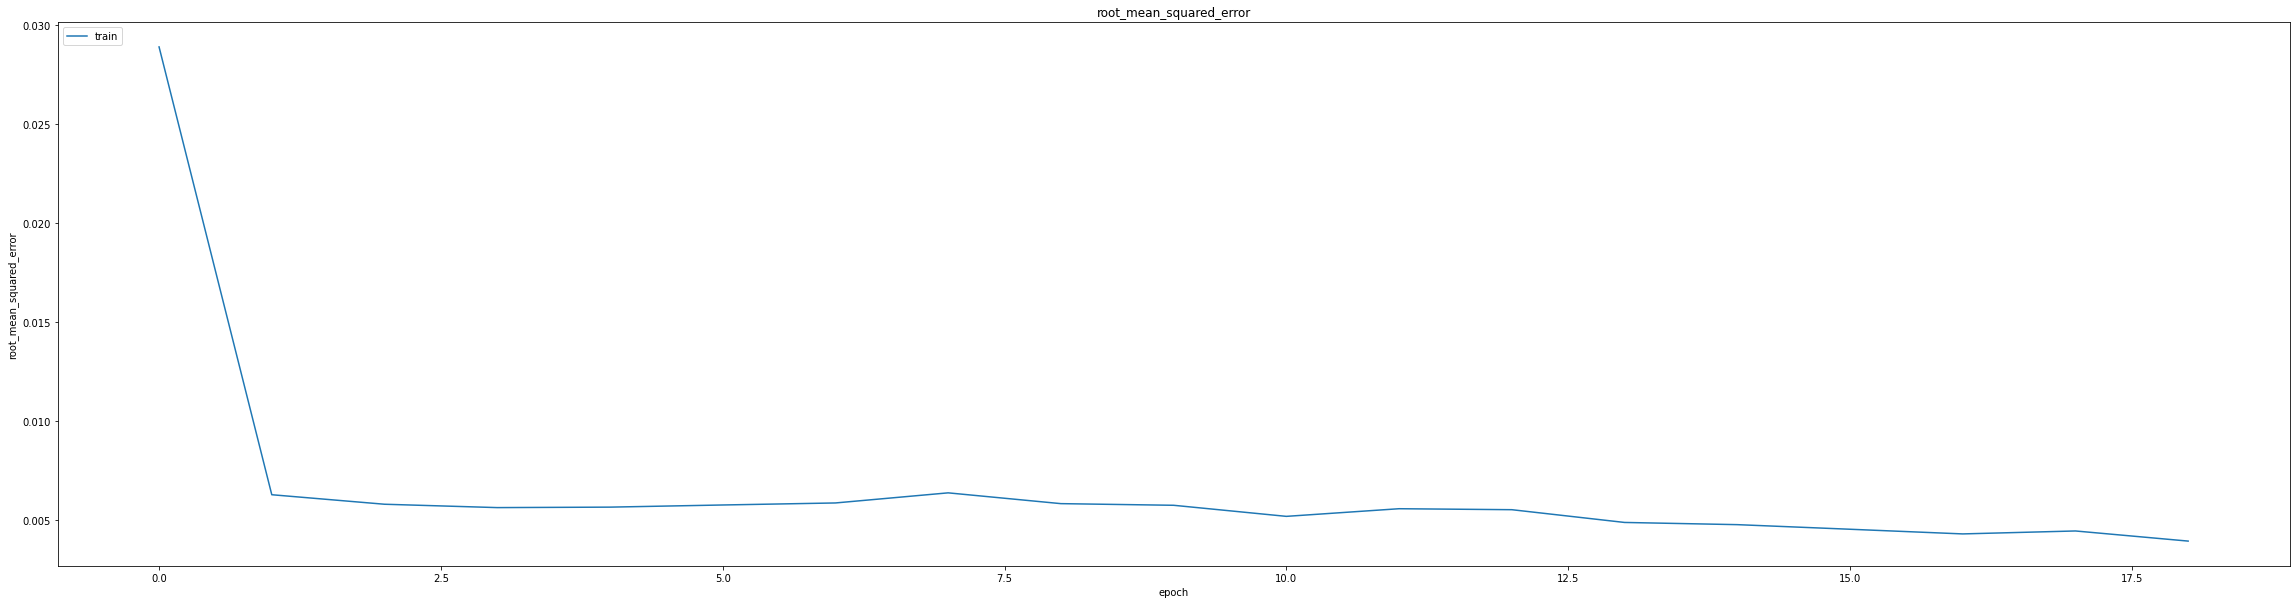

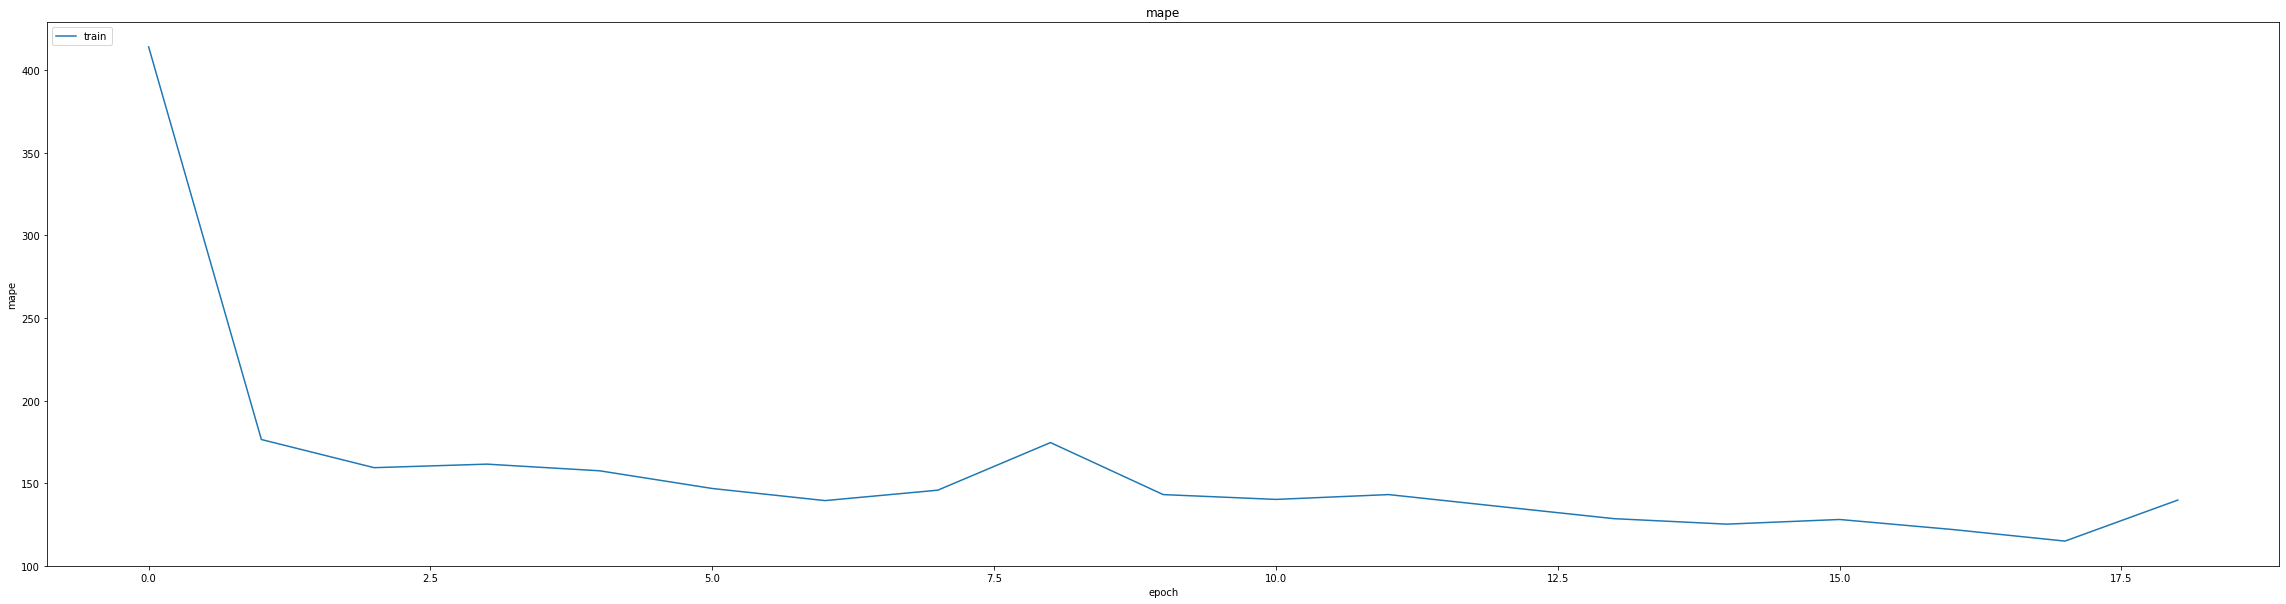

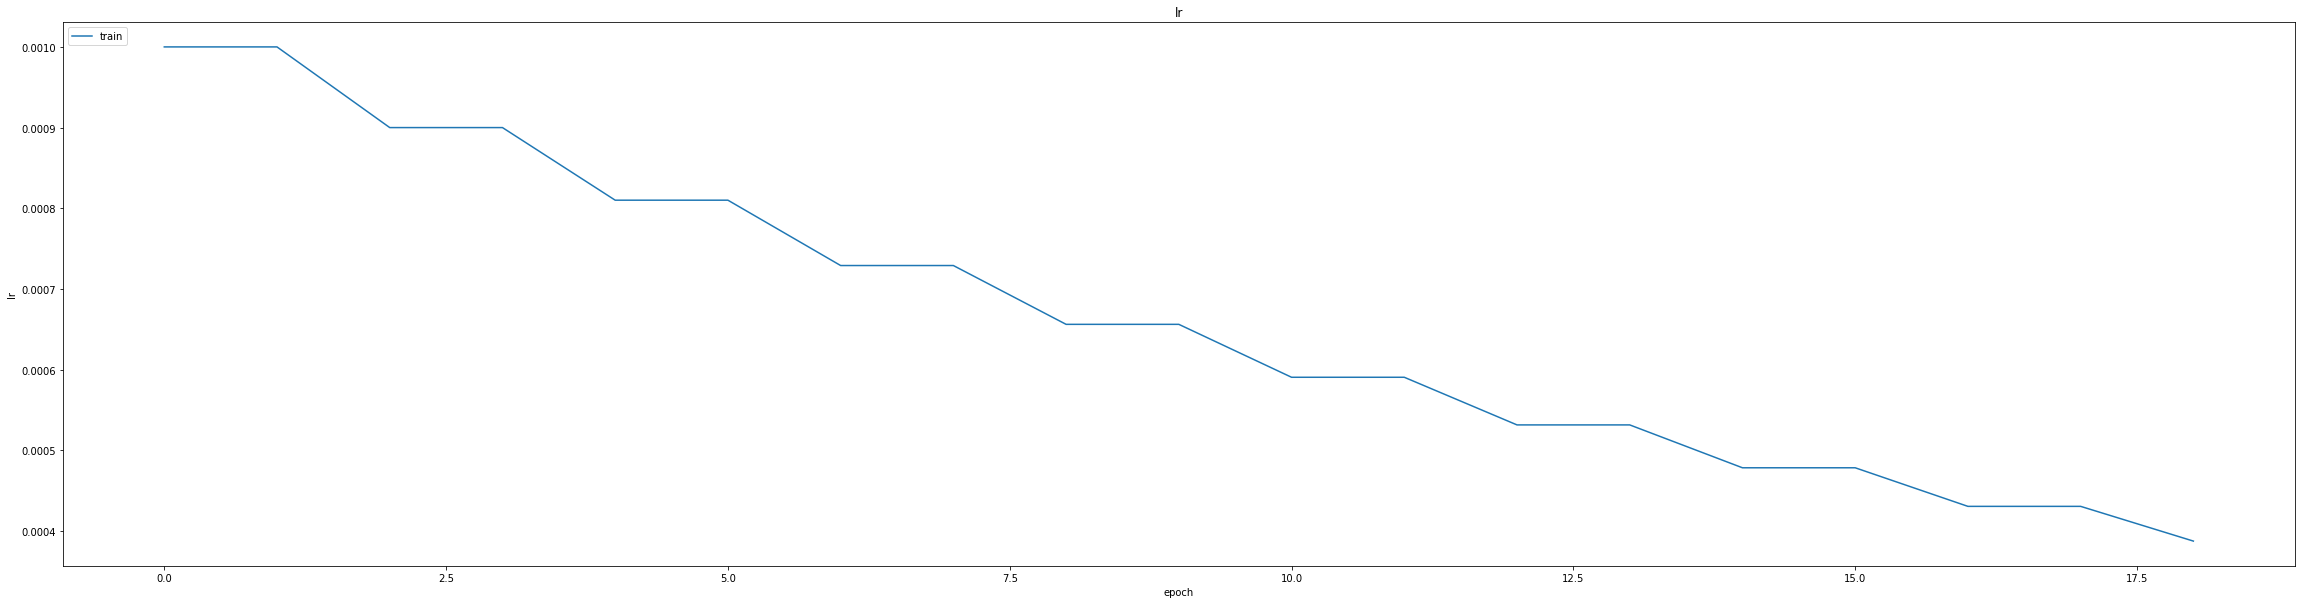

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.010623513720929623
0.01374178659170866
687/687 [==============================] - 32s 45ms/step
0.975258086129835


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 28s 41ms/step


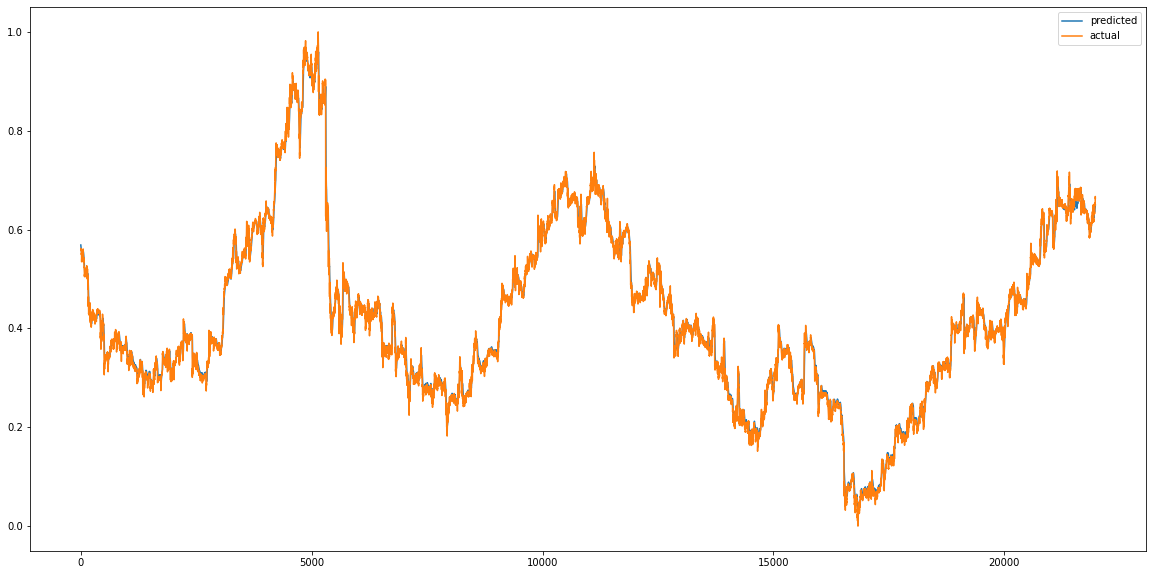

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


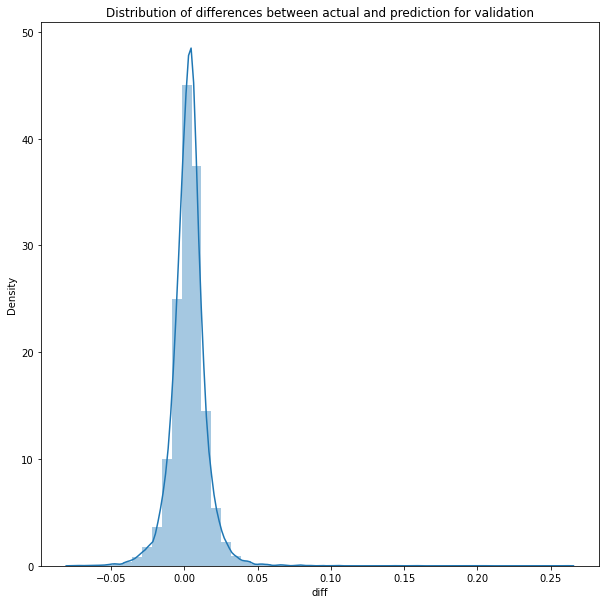

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

702/702 [==============================] - 24s 35ms/step


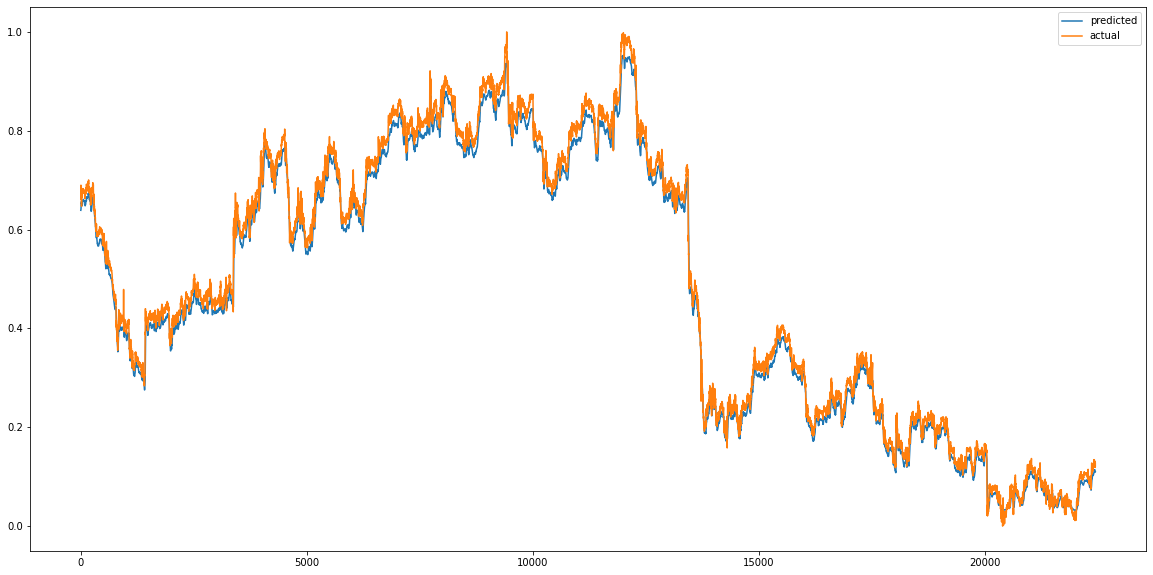

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


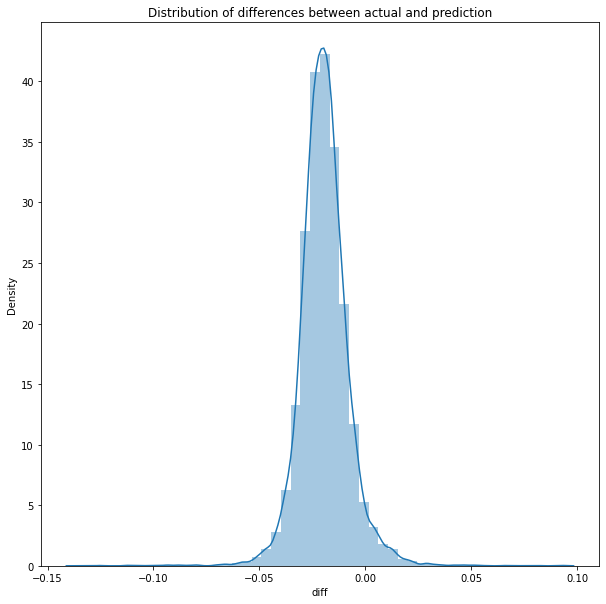

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.0005107243532432699
MAE :  0.020249691077702327
RMSE :  0.02259921134117892
702/702 [==============================] - 24s 35ms/step
R2_Score  : 0.975258086129835


count    22452.000000
mean        -0.019415
std          0.011567
min         -0.136478
25%         -0.025866
50%         -0.019828
75%         -0.013434
max          0.093623
Name: diff, dtype: float64